# Работа с заботой

# Описание проекта

HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. В этом HR-аналитикам пригодится машинное обучение, с помощью которого получится быстрее и точнее отвечать на вопросы бизнеса.

Компания предоставила данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён.

Заказчик предоставил данные для предсказания уровня удовлетворенности:
1) Тренировочная выборка: train_job_satisfaction_rate.csv;
2) Входные признаки тестовой выборки: test_features.csv;
3) Целевой признак тестовой выборки: test_target_job_satisfaction_rate.csv.

Заказчик предоставил данные для предсказания увольния сотрудника из компании:
1) Тренировочная выборка: train_quit.csv;
2) Входные признаки тестовой выборки: test_features.csv;
3) Целевой признак тестовой выборки: test_target_quit.csv.

Признаки:
- `id` - уникальный идентификатор сотрудника;
- `dept` - отдел, в котором работает сотрудник;
- `level` - уровень занимаемой должности;
- `workload` - уровень загруженности сотрудника;
- `employment_years ` - длительность работы в компании (в годах);
- `last_year_promo ` - показывает, было ли повышение за последний год;
- `last_year_violations ` - показывает, нарушал ли сотрудник трудовой договор за последний год;
- `supervisor_evaluation ` - оценка качества работы сотрудника, которую дал руководитель;
- `salary` - ежемесячная зарплата сотрудника;
- `job_satisfaction_rate ` - уровень удовлетворённости сотрудника работой в компании, целевой признак.

**Цель проекта:**

Дать рекомендации бизнесу для повышения удовлетворенности сотрудников и уменьшения их оттока из компании.

**Задачи проекта:**
1) Построить модель, которая сможет предсказать уровень удовлетворённости сотрудника.
2) Построить модель, которая сможет предсказать то, что сотрудник уволится из компании.

**План работы:**

Для выполнения 1 задачи:
1) Загрузка данных;
2) Предобработка данных;
3) Исследовательский анализ данных;
4) Подготовка данных;
5) Обучение моделей;
6) Вывод

Для выполнения 2 задачи:
1) Загрузка данных;
2) Предобработка данных;
3) Исследовательский анализ данных;
4) Добавление нового входного признака;
5) Подготовка данных;
6) Обучение моделей;
7) Вывод

# Первая задача

## Загрузка данных

In [6]:
# для использования линейной алгебры
import numpy as np
import math

# для работы с таблицами
import pandas as pd

# для визуализации
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

# для разделение данных на выборки
from sklearn.model_selection import train_test_split

# загружаем класс pipeline
from sklearn.pipeline import Pipeline

# загружаем классы для подготовки данных
from sklearn.preprocessing import (
        OneHotEncoder, 
        OrdinalEncoder, 
        StandardScaler, 
        MinMaxScaler,
        LabelEncoder
)

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# загружаем класс для работы с пропусками
from sklearn.impute import SimpleImputer

# загружаем функцию для работы с метриками
from sklearn.metrics import (
        accuracy_score, 
        f1_score, 
        roc_curve, 
        roc_auc_score, 
        ConfusionMatrixDisplay,
        make_scorer,
        mean_absolute_error,
        r2_score,
        mean_squared_error,
        confusion_matrix
        
)

# импортируем класс RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV


# загружаем нужные модели
from sklearn.linear_model import LinearRegression
from sklearn.tree import (
            DecisionTreeClassifier, 
            DecisionTreeRegressor, 
            plot_tree,
            export_text
)
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# кросс-валидация
from sklearn.model_selection import cross_val_score


# для оценки важности признаков 
from sklearn.inspection import permutation_importance

# для корреляции
from phik import phik_matrix
from phik.report import plot_correlation_matrix

# время загрузки
import time

# модели для сравнения
from sklearn.dummy import DummyClassifier, DummyRegressor

#статистика 
import scipy.stats as st

#дисбаланс классоа
from imblearn.over_sampling import RandomOverSampler

from imblearn.pipeline import Pipeline as ImbPipeline

from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif


In [7]:
# константы
RANDOM_STATE = 30

In [8]:
# загрузим данные и сохрним в переменные
try:
    train_job = pd.read_csv('train_job_satisfaction_rate.csv')
    test_features = pd.read_csv('test_features.csv')
    test_job_satisfaction = pd.read_csv('test_target_job_satisfaction_rate.csv')
except:
    train_job = pd.read_csv('/datasets/train_job_satisfaction_rate.csv')
    test_features = pd.read_csv('/datasets/test_features.csv')
    test_job_satisfaction = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')

In [9]:
# наглядно оценим данные
display(train_job.head())
display(test_features.head())
display(test_job_satisfaction.head())

id        dept   level workload  employment_years last_year_promo  \
0  155278       sales  junior   medium                 2              no   
1  653870          hr  junior     high                 2              no   
2  184592       sales  junior      low                 1              no   
3  171431  technology  junior      low                 4              no   
4  693419          hr  junior   medium                 1              no   

  last_year_violations  supervisor_evaluation  salary  job_satisfaction_rate  
0                   no                      1   24000                   0.58  
1                   no                      5   38400                   0.76  
2                   no                      2   12000                   0.11  
3                   no                      2   18000                   0.37  
4                   no                      3   22800                   0.20

id       dept   level workload  employment_years last_year_promo  \
0  485046  marketing  junior   medium                 2              no   
1  686555         hr  junior   medium                 1              no   
2  467458      sales  middle      low                 5              no   
3  418655      sales  middle      low                 6              no   
4  789145         hr  middle   medium                 5              no   

  last_year_violations  supervisor_evaluation  salary  
0                   no                      5   28800  
1                   no                      4   30000  
2                   no                      4   19200  
3                   no                      4   19200  
4                   no                      5   40800

id  job_satisfaction_rate
0  130604                   0.74
1  825977                   0.75
2  418490                   0.60
3  555320                   0.72
4  826430                   0.08

In [10]:
# посмотрим на характеристики данных
train_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


In [11]:
train_job.describe(include = 'all')

id   dept   level workload  employment_years  \
count     4000.000000   3994    3996     4000       4000.000000   
unique            NaN      5       3        3               NaN   
top               NaN  sales  junior   medium               NaN   
freq              NaN   1512    1894     2066               NaN   
mean    544957.621000    NaN     NaN      NaN          3.718500   
std     257883.104622    NaN     NaN      NaN          2.542513   
min     100954.000000    NaN     NaN      NaN          1.000000   
25%     322836.750000    NaN     NaN      NaN          2.000000   
50%     534082.500000    NaN     NaN      NaN          3.000000   
75%     771446.000000    NaN     NaN      NaN          6.000000   
max     999521.000000    NaN     NaN      NaN         10.000000   

       last_year_promo last_year_violations  supervisor_evaluation  \
count             4000                 4000            4000.000000   
unique               2                    2                    NaN   
top                 no                   no                    NaN   
freq              3880                 3441                    NaN   
mean               NaN                  NaN               3.476500   
std                NaN                  NaN               1.008812   
min                NaN                  NaN               1.000000   
25%                NaN                  NaN               3.000000   
50%                NaN                  NaN               4.000000   
75%                NaN                  NaN               4.000000   
max                NaN                  NaN               5.000000   

              salary  job_satisfaction_rate  
count    4000.000000            4000.000000  
unique           NaN                    NaN  
top              NaN                    NaN  
freq             NaN                    NaN  
mean    33926.700000               0.533995  
std     14900.703838               0.225327  
min     12000.000000               0.030000  
25%     22800.000000               0.360000  
50%     30000.000000               0.560000  
75%     43200.000000               0.710000  
max     98400.000000               1.000000

In [12]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


In [13]:
test_features.describe(include = 'all')

id   dept   level workload  employment_years  \
count     2000.000000   1998    1999     2000       2000.000000   
unique            NaN      6       3        4               NaN   
top               NaN  sales  junior   medium               NaN   
freq              NaN    763     974     1043               NaN   
mean    552765.213500    NaN     NaN      NaN          3.666500   
std     253851.326129    NaN     NaN      NaN          2.537222   
min     100298.000000    NaN     NaN      NaN          1.000000   
25%     339052.000000    NaN     NaN      NaN          1.000000   
50%     550793.000000    NaN     NaN      NaN          3.000000   
75%     765763.750000    NaN     NaN      NaN          6.000000   
max     999029.000000    NaN     NaN      NaN         10.000000   

       last_year_promo last_year_violations  supervisor_evaluation  \
count             2000                 2000            2000.000000   
unique               2                    2                    NaN   
top                 no                   no                    NaN   
freq              1937                 1738                    NaN   
mean               NaN                  NaN               3.526500   
std                NaN                  NaN               0.996892   
min                NaN                  NaN               1.000000   
25%                NaN                  NaN               3.000000   
50%                NaN                  NaN               4.000000   
75%                NaN                  NaN               4.000000   
max                NaN                  NaN               5.000000   

              salary  
count    2000.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean    34066.800000  
std     15398.436729  
min     12000.000000  
25%     22800.000000  
50%     30000.000000  
75%     43200.000000  
max     96000.000000

In [14]:
test_job_satisfaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [15]:
test_job_satisfaction.describe(include = 'all')

id  job_satisfaction_rate
count    2000.000000             2000.00000
mean   552765.213500                0.54878
std    253851.326129                0.22011
min    100298.000000                0.03000
25%    339052.000000                0.38000
50%    550793.000000                0.58000
75%    765763.750000                0.72000
max    999029.000000                1.00000

- Название столбцов написаны корректно.
- Аномальных значений не замечено.
- Пропуски в столбцах `dept` и `level`.
- Тип данных соотвествует значениям.

## Предобработка данных

In [18]:
# проверим кол-во пропусков
train_job.isna().sum()

id                       0
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64

In [19]:
test_features.isna().sum()

id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64

In [20]:
test_job_satisfaction.isna().sum()

id                       0
job_satisfaction_rate    0
dtype: int64

Обработаем пропуски в пайплайне.

In [22]:
# проверим кол-во явных и неявных дубликатов
train_job.duplicated().sum()

0

In [23]:
train_job['id'].duplicated().sum()

0

In [24]:
test_features.duplicated().sum()

0

In [25]:
test_features['id'].duplicated().sum()

0

In [26]:
test_job_satisfaction.duplicated().sum()

0

In [27]:
test_job_satisfaction['id'].duplicated().sum()

0

Явных и неявных дубликатов не обнаружено.

In [29]:
# посмотрим как записаны значения в категориальных столбцах
for i in train_job.select_dtypes(exclude = 'number').columns.to_list():
    print(train_job[i].unique())

['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]
['junior' 'middle' 'sinior' nan]
['medium' 'high' 'low']
['no' 'yes']
['no' 'yes']


In [30]:
for i in test_features.select_dtypes(exclude = 'number').columns.to_list():
    print(test_features[i].unique())

['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']
['junior' 'middle' 'sinior' nan]
['medium' 'low' 'high' ' ']
['no' 'yes']
['no' 'yes']


In [31]:
train_job['level'] = train_job['level'].replace('sinior', 'senior')
test_features['level'] = test_features['level'].replace('sinior', 'senior')

In [32]:
train_job['level'].unique()

array(['junior', 'middle', 'senior', nan], dtype=object)

In [33]:
test_features['level'].unique()

array(['junior', 'middle', 'senior', nan], dtype=object)

Попадаются пропуски, пустые значения. Обработаем их в пайплайне.

## Исследовательский анализ данных

Посмторим на распределение признаков, оценим диграмму размаха, определим корреляцию между признаками. Подведем итоги.

### По тренировочным данным

In [38]:
# создаим функцию для построения гистрораммы и диаграммы размаха
def hist_box(data, column):
    plt.figure(figsize=(8, 3))
    plt.subplot(1, 2, 1)
    plt.subplots_adjust(right=2)
    plt.xlabel(f'Значения столбца "{column}"')
    plt.ylabel('Частота')
    plt.title(f'Гистограмма для "{column}"')
    sns.histplot(data[column])
    plt.subplot(1, 2, 2)
    plt.xlabel(f'Значения столбца {column}')
    plt.title(f'Диаграмма размаха для {column}')
    sns.boxplot(x=data[column])

In [39]:
# создаим функцию для построения круговых диаграмм
def build_pie(dataset, column):
    plt.title(column)
    plt.pie(x = dataset[column].value_counts(), 
            labels = dataset[column].value_counts().index,
            autopct='%1.1f%%',
           )
    plt.show()

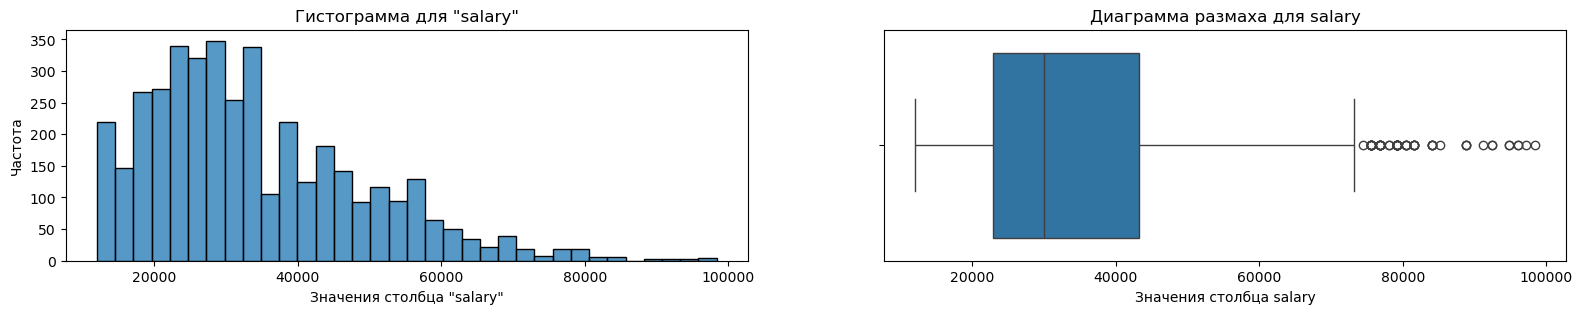

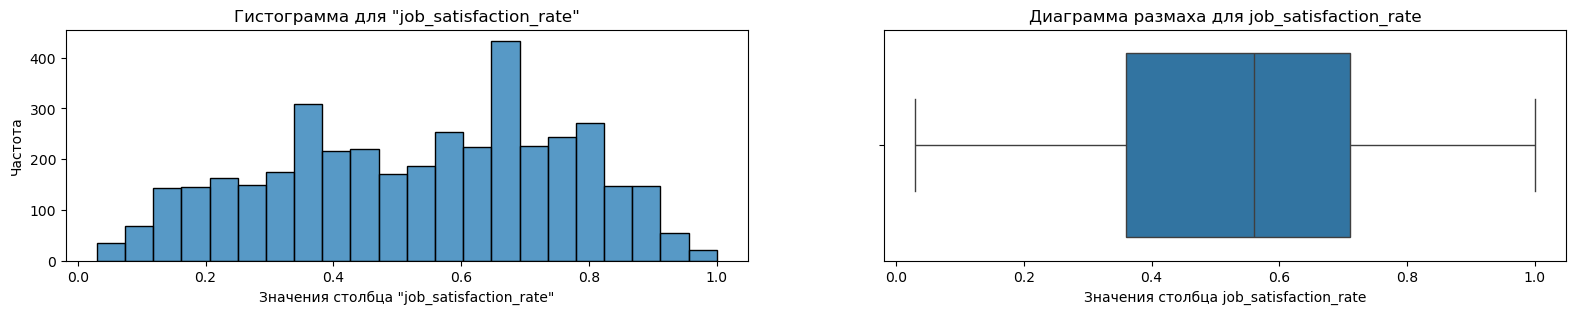

In [40]:
# вызовим функцию для построения гистрорамм и диаграмм размаха для количественных признаков
for name in ['salary','job_satisfaction_rate']:
    hist_box(train_job, name)
    plt.show()

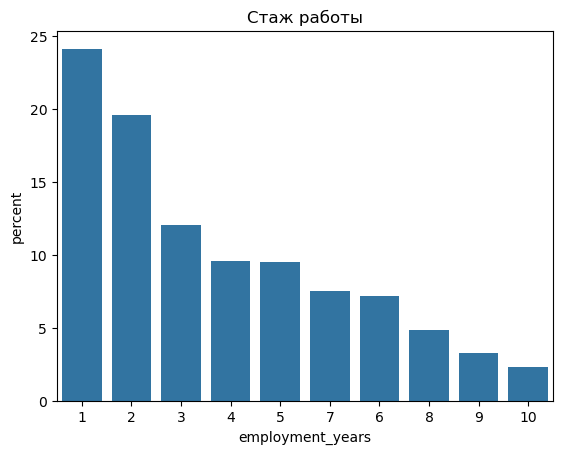

In [41]:
plt.title('Cтаж работы')
sns.countplot(train_job, x="employment_years",  stat="percent",  order=train_job['employment_years'].value_counts(ascending=False).index)
plt.show()

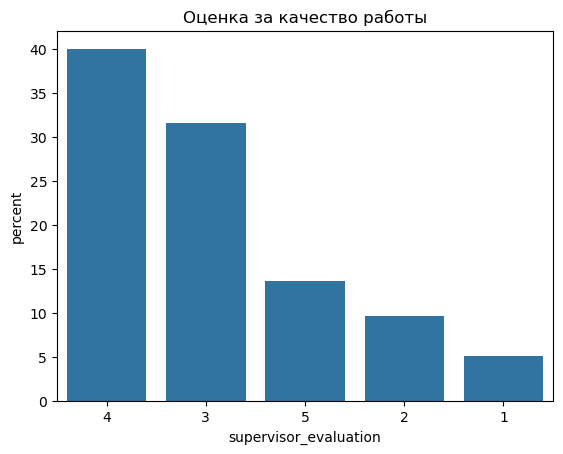

In [42]:
plt.title('Оценка за качество работы')
sns.countplot(train_job, x="supervisor_evaluation", stat="percent", order=train_job['supervisor_evaluation'].value_counts(ascending=False).index)
plt.show()

 - 75% сотрудников работают не больше 6 лет, половина из сотрудников работакют 1 - 3 года;
 - в основном руководитель ставит оценку за качество работы 3 или 4;
 - попадается выброс: оценка сотруднику = 1, вполне реальное значение, оставим как есть;
 - ежемесячная зарплата сотрудника в среднем на одного человека = 30000 рублей;
 - попадается много выбросов в ежемесячной зарплате, но значения не аномальны, скорей всего повышенная зарплата у более опытных сотрудников;
 - уровень удовлетворенности сотрудника в среднем на одного человка равен 0.56.

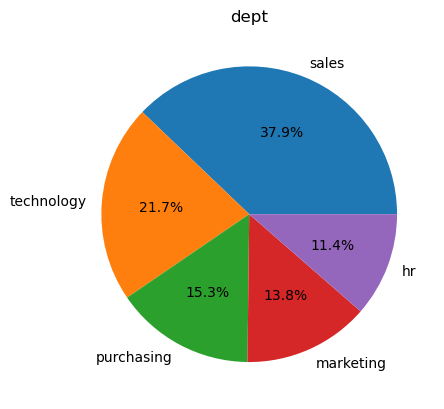

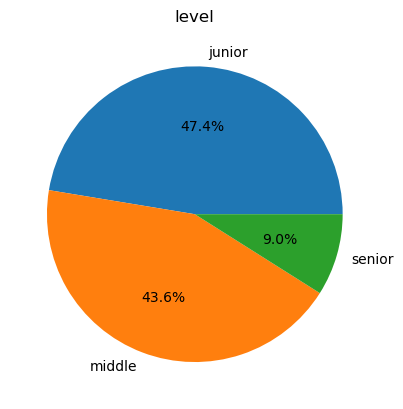

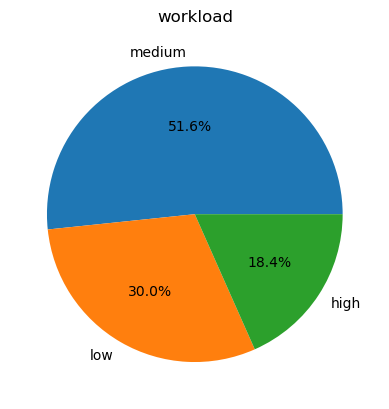

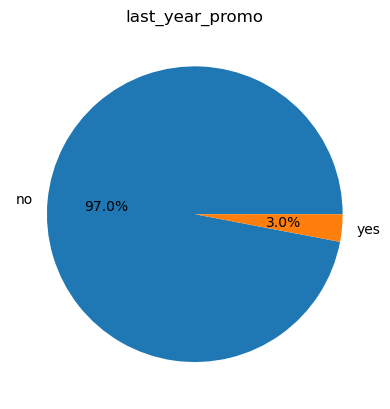

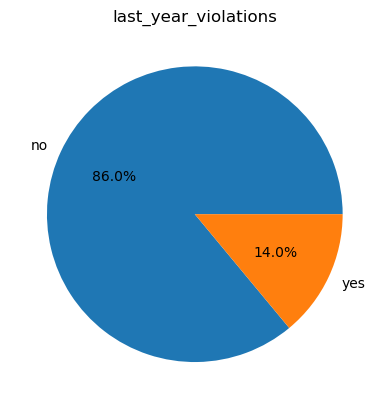

In [44]:
# вызовим функцию для построения круговых диграмм для категориальных признаков
for name in train_job.select_dtypes(exclude = 'number').columns.to_list():
    build_pie(train_job, name)
    plt.show()

По категорильным признакам общий вывод:
- 60% сотрудников приходится на отдел продаж и технологический. Больше всех сотрудников в отделе продаж(37.9%).
- Практически поровну должностей  junior и middle. Остальная часть(9%) приходится на sinior.
- Половина сотрудников имеет среднюю загруженность, 30% низкую и 18% высокую.
- 3% сотрудников получили повышение за последний год.
- В основном сотрудники не нарушали трудовой договор за последний год, но есть исключения.

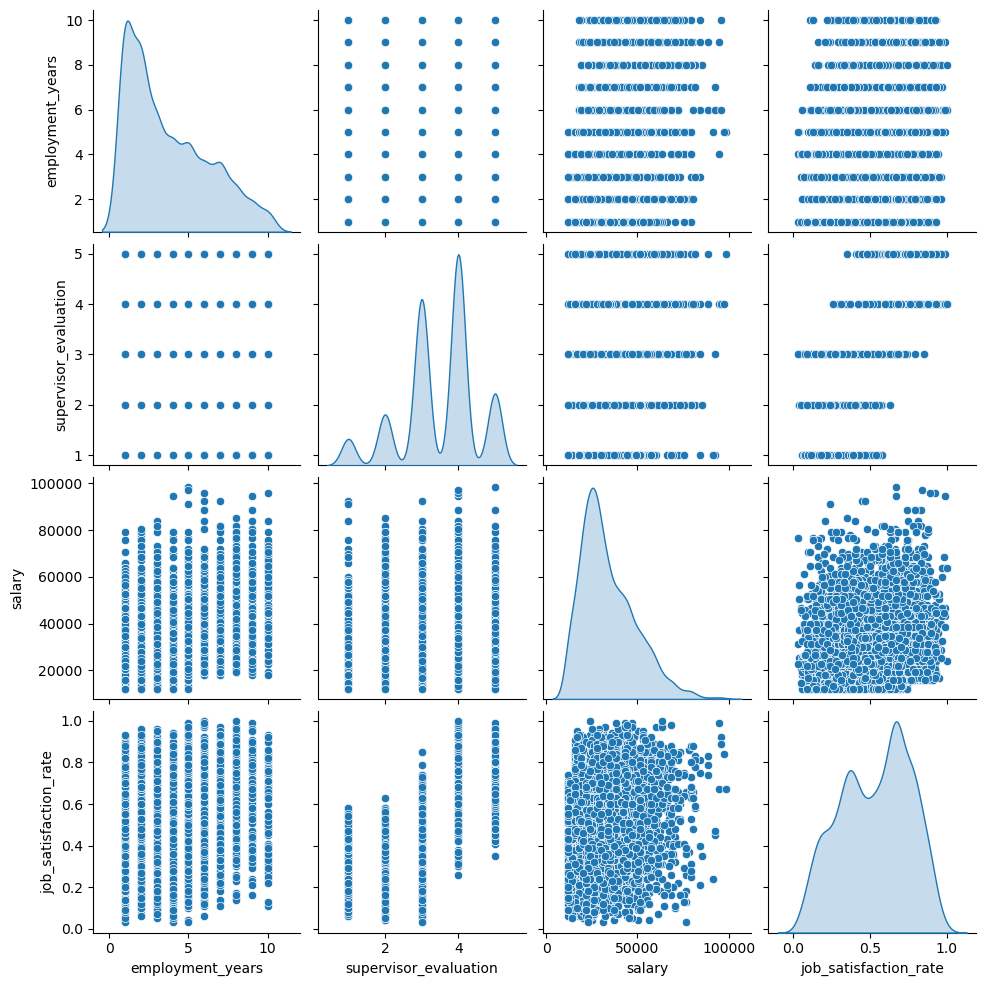

In [46]:
# построим матрицу диаграмм рассиения и оценим связь между признаками
sns.pairplot(train_job[['employment_years', 'supervisor_evaluation', 'salary','job_satisfaction_rate']],diag_kind = 'kde')
plt.show()

In [47]:
# воспользуемся методом phik_matrix для определения корреляции количественных и категориальных признаков
phik_overview = phik_matrix(train_job.drop(columns = 'id'), 
                            interval_cols= ['salary', 'job_satisfaction_rate']
                           )

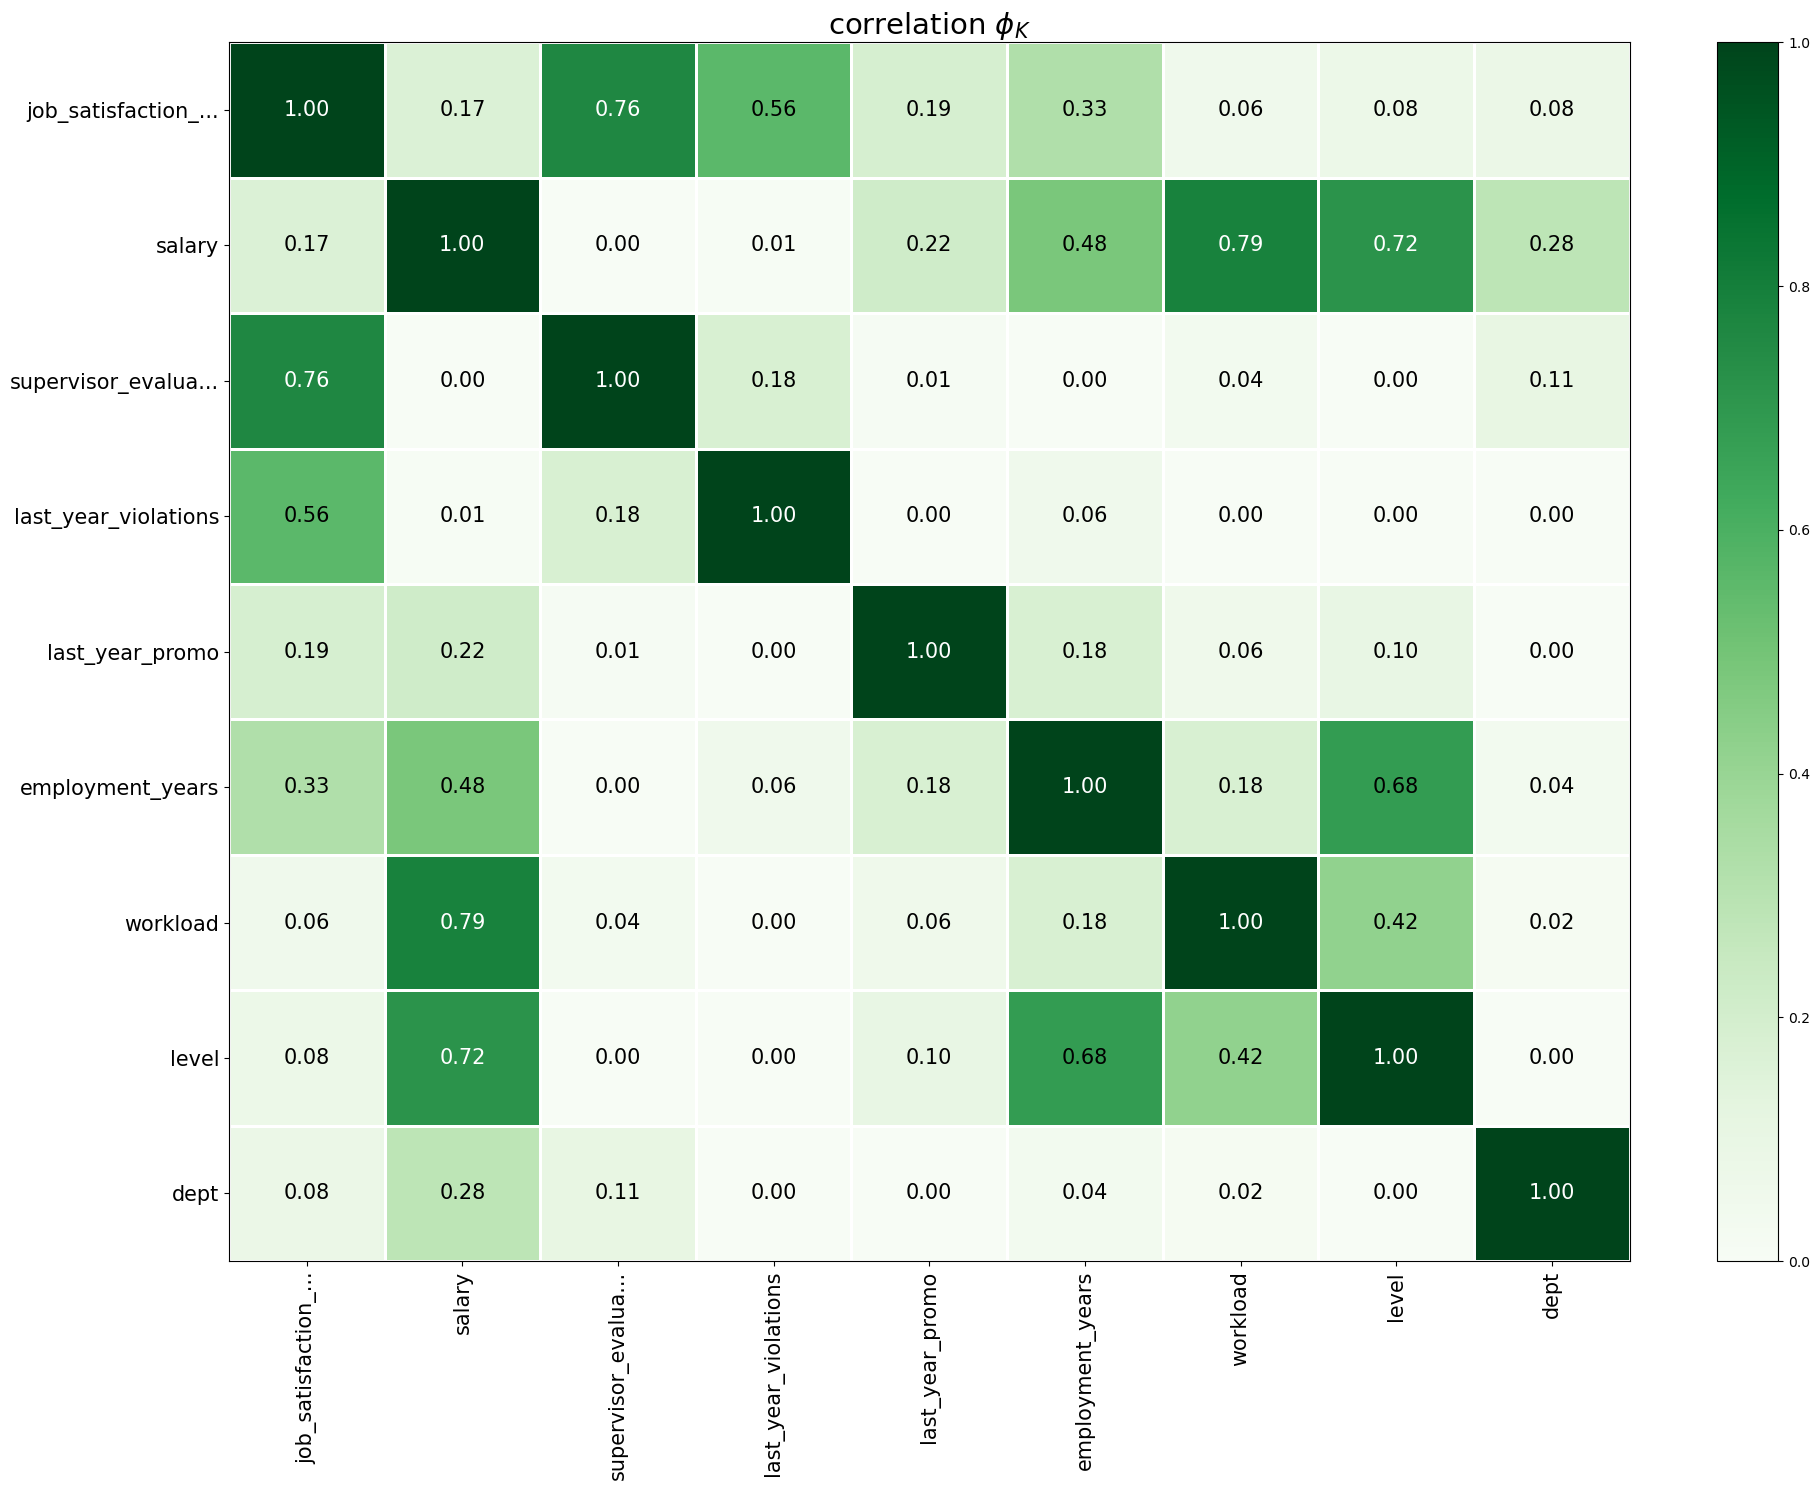

In [48]:
# построим матрицу корреляци между всеми признаками
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

По графикам корреляции:
- четкой линейной связи между признаками не наблюдается;
- примерно при ежемясчной зарпалате выше 75000 рублей сотрудники больше удовлетворены работой;
- уровень удовлетворенности выше у сотрудников с высокой оценкой за качество работы

Мультиколлинерность не наблюадается.


### Сравнение двух групп: удовлетворен и неудовлетворен

In [51]:
# сохраним в новую переменную датасет для добавления нового признака
df_satisfaction_binary = train_job.copy()

In [52]:
# добвим новый признак 'satisfaction_binary' 
# при 'job_satisfaction_rate' > 0.5 будем считать удовлеворенного сотрудника
df_satisfaction_binary['satisfaction_binary'] = df_satisfaction_binary['job_satisfaction_rate'].apply(lambda x: 'удовлетворен' if x > 0.5 else 'не удовлетворен')

In [53]:
df_satisfaction_binary.head()

id        dept   level workload  employment_years last_year_promo  \
0  155278       sales  junior   medium                 2              no   
1  653870          hr  junior     high                 2              no   
2  184592       sales  junior      low                 1              no   
3  171431  technology  junior      low                 4              no   
4  693419          hr  junior   medium                 1              no   

  last_year_violations  supervisor_evaluation  salary  job_satisfaction_rate  \
0                   no                      1   24000                   0.58   
1                   no                      5   38400                   0.76   
2                   no                      2   12000                   0.11   
3                   no                      2   18000                   0.37   
4                   no                      3   22800                   0.20   

  satisfaction_binary  
0        удовлетворен  
1        удовлетворен  
2     не удовлетворен  
3     не удовлетворен  
4     не удовлетворен

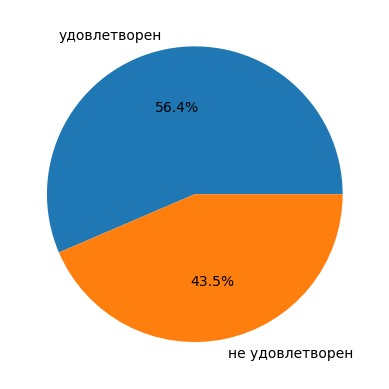

In [54]:
# оценим долю удовлетворенных и не удовлетворенных сотрудников
plt.pie(df_satisfaction_binary['satisfaction_binary'].value_counts(),
        labels = df_satisfaction_binary['satisfaction_binary'].value_counts().index,
        autopct='%1.1f%%'
       )
plt.show()

Больше сотрудников довольны работой, но доля не довольных не маленькая.

In [56]:
# воспользуемся готовой функций для построения гистрограмм и диаграмм размаха для разных групп 
def build_histogram_boxplot_2(dataset, column):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    plt.title(f'Гистограмма для "{column}"')
    sns.histplot(data=dataset, x=column, hue='satisfaction_binary')
    plt.xlabel(f'Значение параметра "{column}"')
    plt.ylabel('Частота')
    
    plt.subplot(1, 2, 2)
    plt.title(f'Диаграмма размаха для "{column}"')
    sns.boxplot(x='satisfaction_binary', y=column, data=dataset);
    plt.ylabel(f'Значение параметра "{column}"')

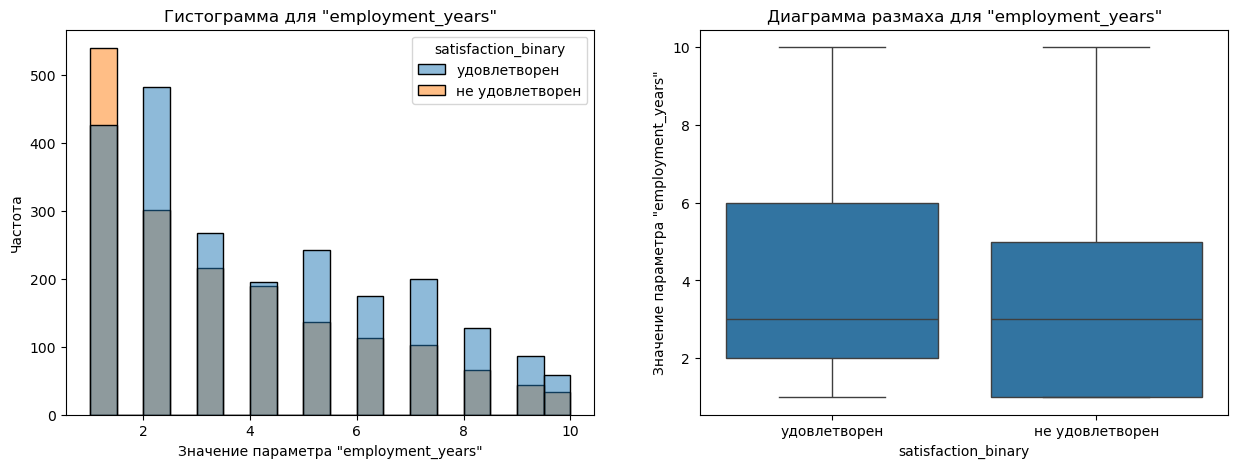

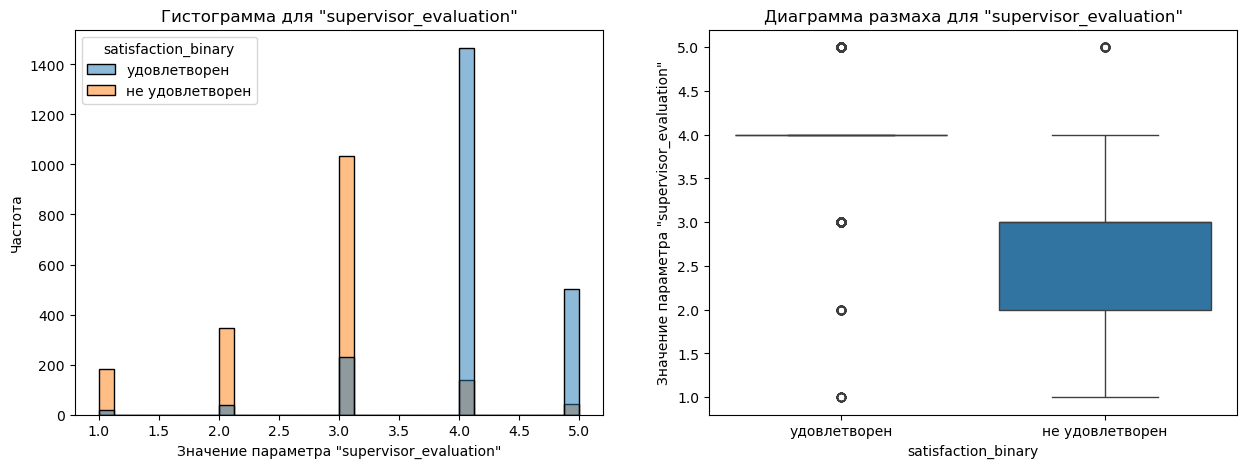

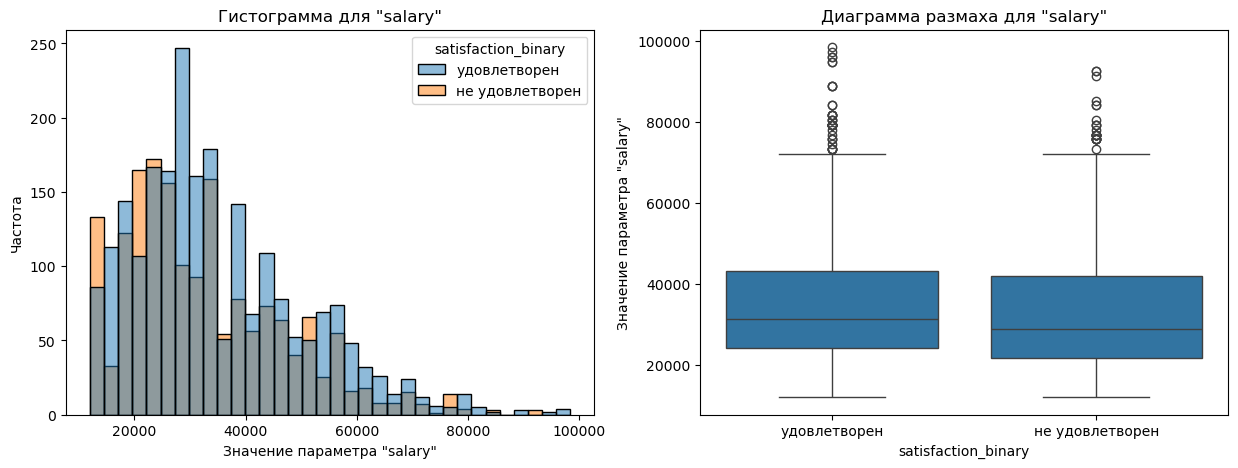

In [57]:
# вывозовим функции для построения графиков с количественными признаками 
for name in ['employment_years', 'supervisor_evaluation', 'salary']:
    build_histogram_boxplot_2(df_satisfaction_binary, name)
    plt.show()

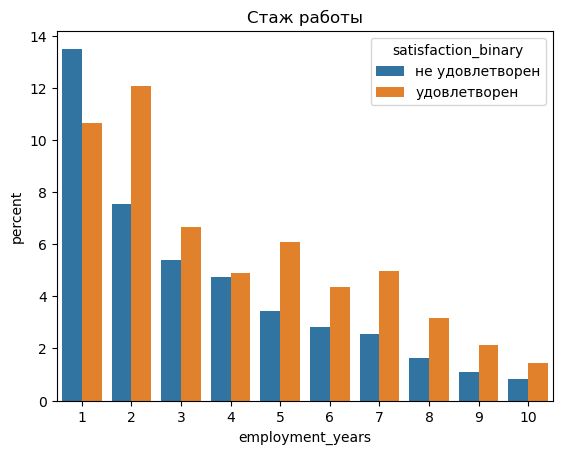

In [58]:
plt.title('Cтаж работы')
sns.countplot(df_satisfaction_binary, 
              x="employment_years",  
              stat="percent", 
              hue = "satisfaction_binary",  
              order=df_satisfaction_binary['employment_years'].sort_values(ascending=True))
plt.show()

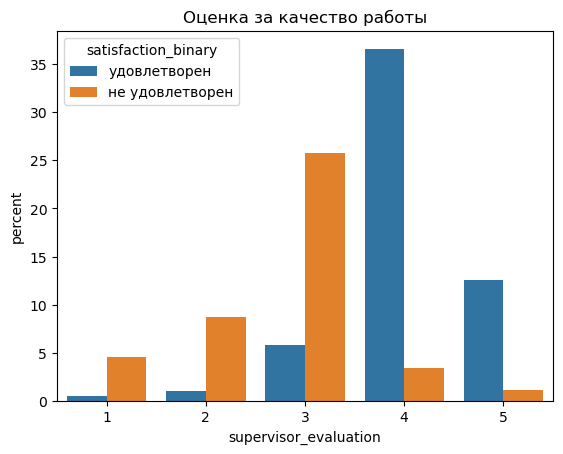

In [59]:
plt.title('Оценка за качество работы')
sns.countplot(df_satisfaction_binary, 
              x="supervisor_evaluation", 
              stat="percent", 
              hue = "satisfaction_binary",
             )
plt.show()

In [60]:
# создадим функцию для построения круговой диаграммы с учётом 2 групп
def build_pie_2(data, name_column):
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(f'Признак {name_column}', y=0.98, x = 1)
    plt.subplots_adjust(wspace=0.5, hspace=0.5, right = 2)
    
    ax1.set_title('удовлетворен')
    ax1.pie(data.query('satisfaction_binary == "удовлетворен"')[name_column].value_counts(), 
            labels = data[name_column].value_counts().index,
            autopct='%1.1f%%'
           )
    
    
    ax2.set_title('неудовлетворен')
    ax2.pie(data.query('satisfaction_binary == "не удовлетворен"')[name_column].value_counts(), 
            labels = data[name_column].value_counts().index,
            autopct='%1.1f%%'
           )
    
    
    plt.show()

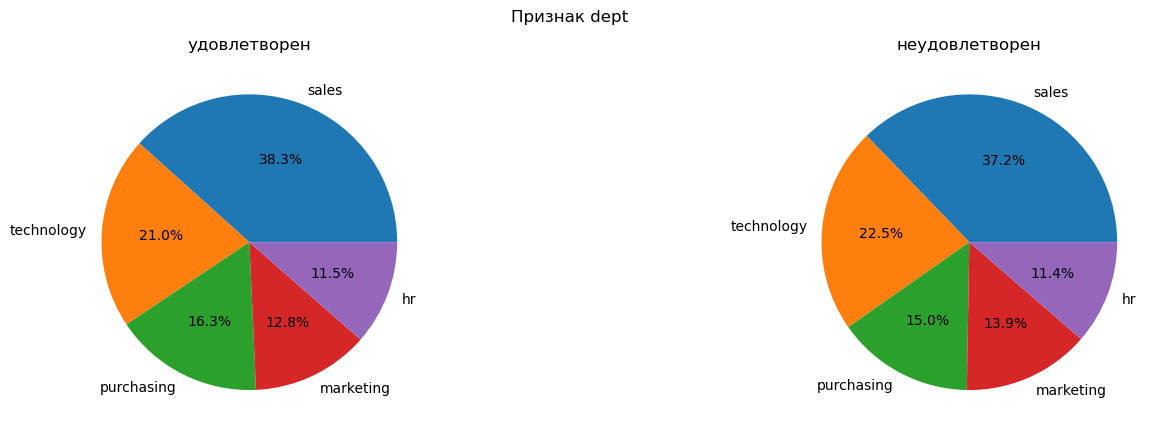

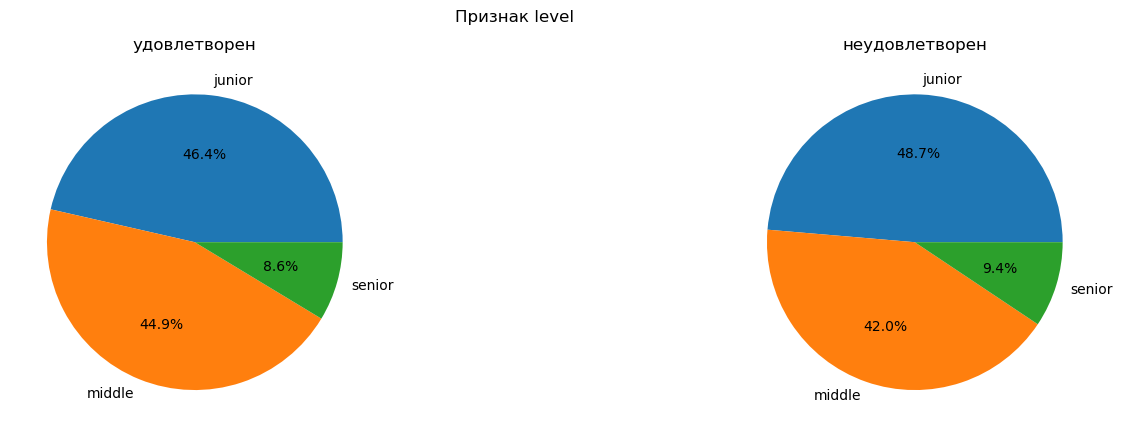

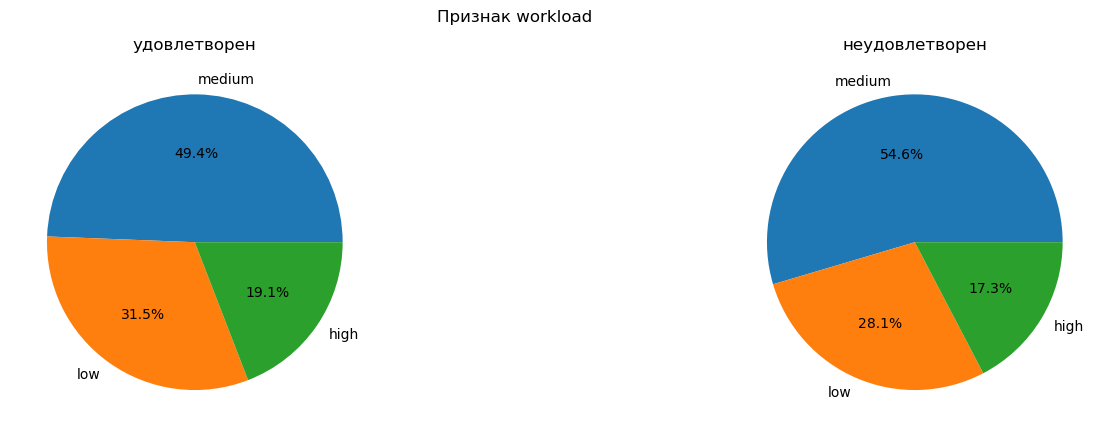

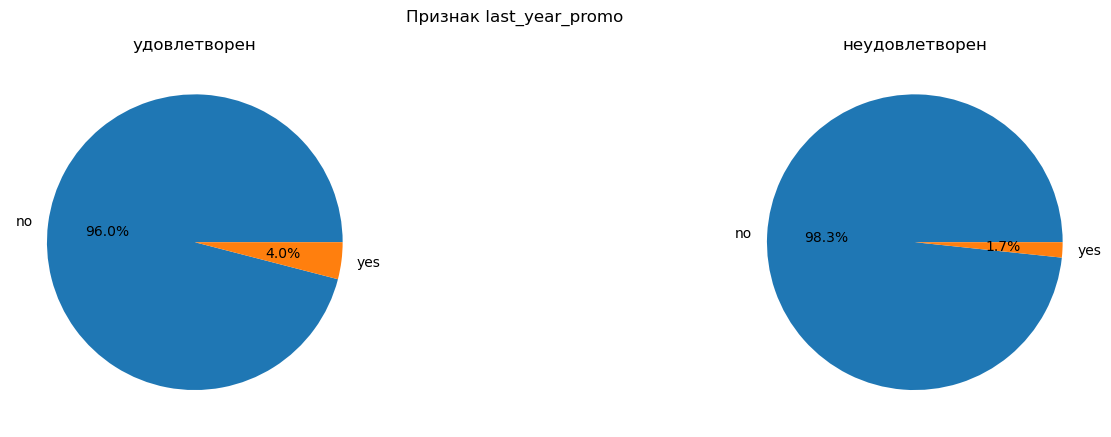

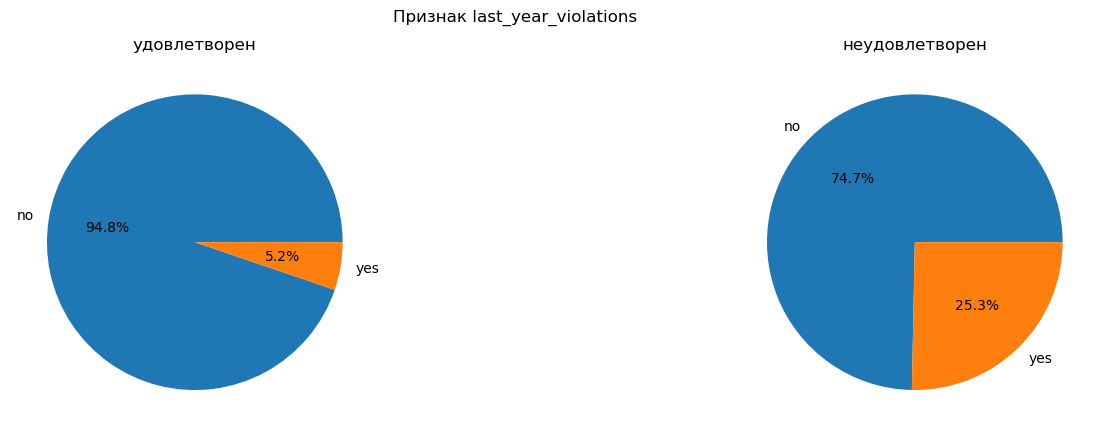

In [61]:
# вызовем функцию для построение круговых диаграм категориальных признаков 2 групп
for name in ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations']:
    build_pie_2(df_satisfaction_binary, name)

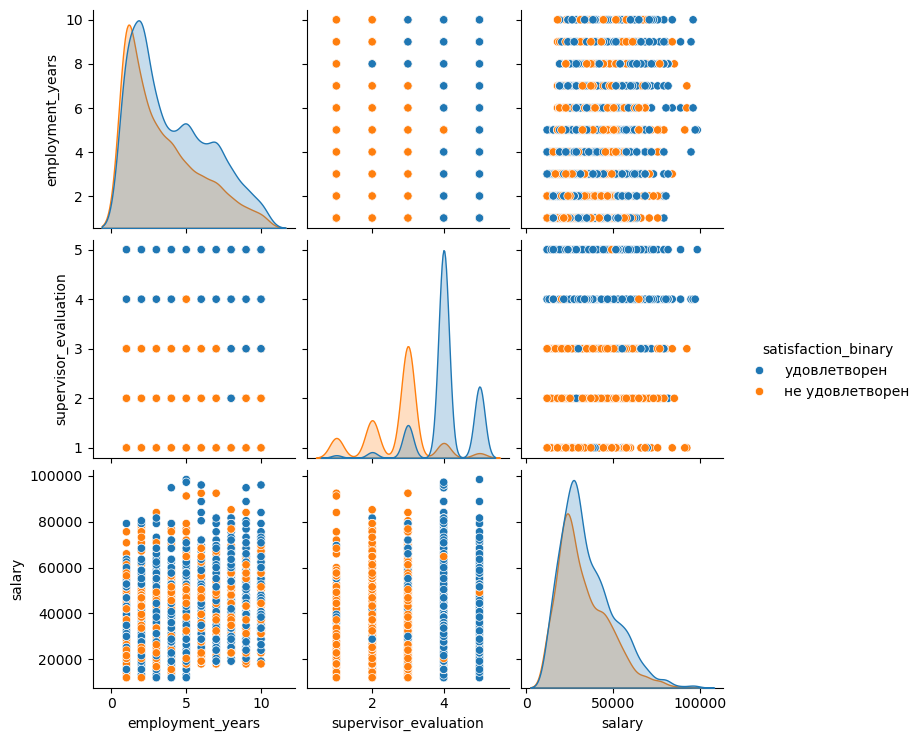

In [62]:
# построим матрицу диаграмм рассиения и оценим связь между признаками для двух групп
sns.pairplot(df_satisfaction_binary[['employment_years', 'supervisor_evaluation', 'salary',  'satisfaction_binary']], hue='satisfaction_binary')
plt.show()

В целом значительных отличий не наблюдается за исключением двух случаев.

1) В среднем на одного работника группа 'не удовлетворен' получает оценку за качество работы = 3, а группа 'удовлетворен' 4
2) В группе 'не удовлетворен' доля нарушителей трудового договора больше(25.3%).
3) У неудовлетворенных сотрудников ежесячная зарплата по мединному значению меньше на 2400 рублей.

### По тестовым данным

In [65]:
# объединим тестовый таблицы в одну для удобства анализа
test_df = test_features.merge(test_job_satisfaction, on = 'id', how = 'left')

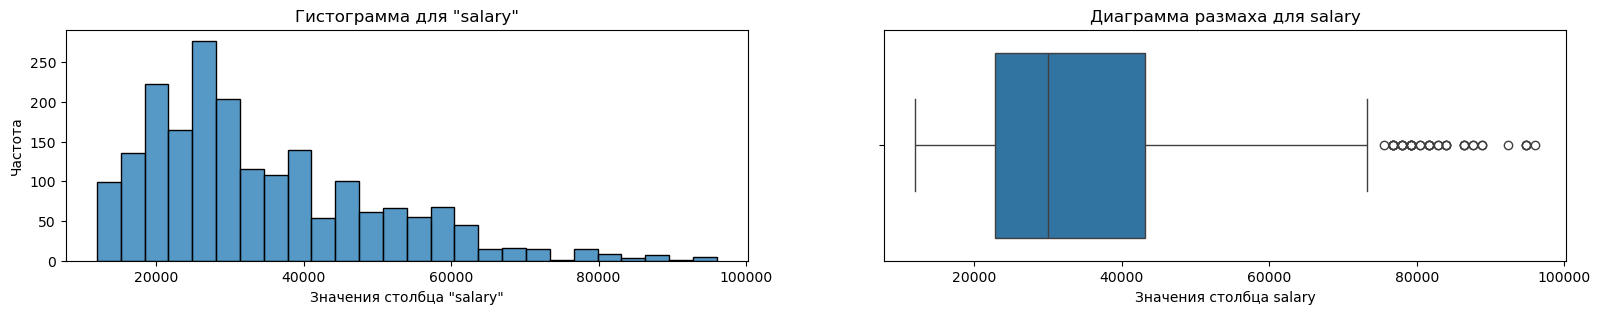

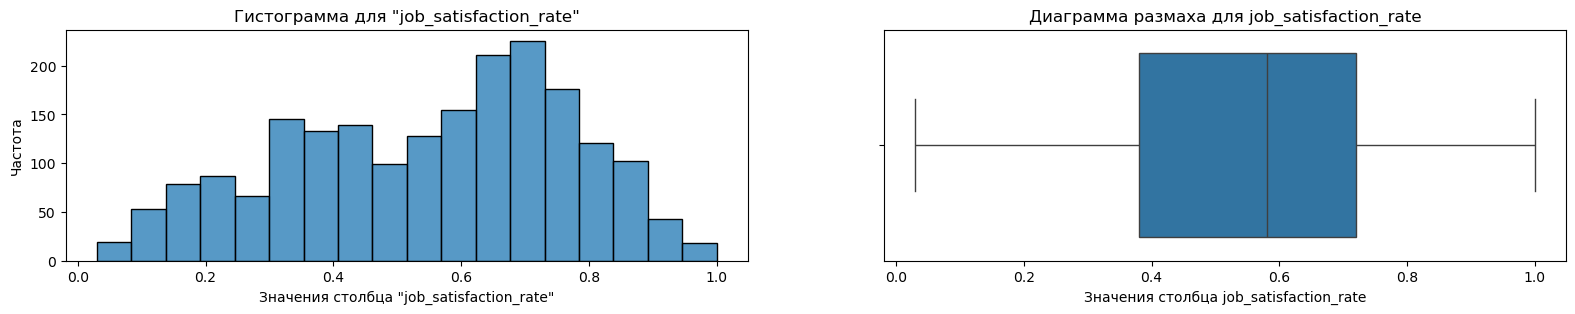

In [66]:
# вызовим функцию для построения гистрорамм и диаграмм размаха для количественных признаков
for name in ['salary', 'job_satisfaction_rate']:
    hist_box(test_df, name)
    plt.show()

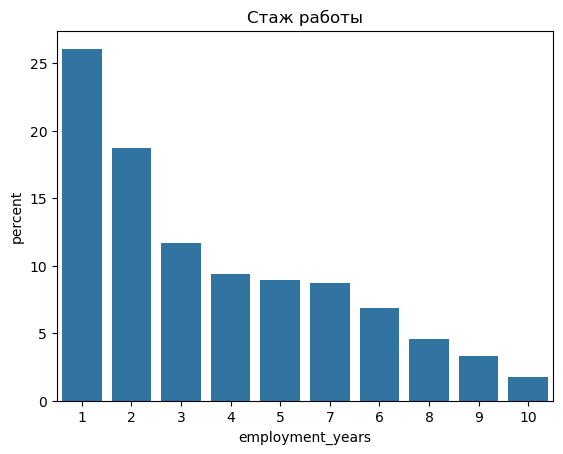

In [67]:
plt.title('Cтаж работы')
sns.countplot(test_df, x="employment_years",  stat="percent",  order=train_job['employment_years'].value_counts(ascending=False).index)
plt.show()

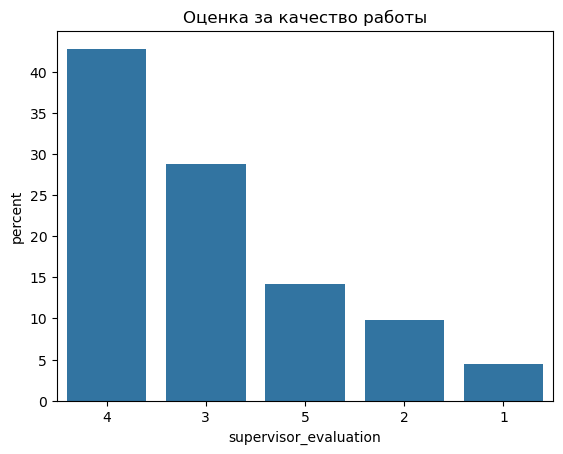

In [68]:
plt.title('Оценка за качество работы')
sns.countplot(test_df, x="supervisor_evaluation", stat="percent", order=test_df['supervisor_evaluation'].value_counts(ascending=False).index)
plt.show()

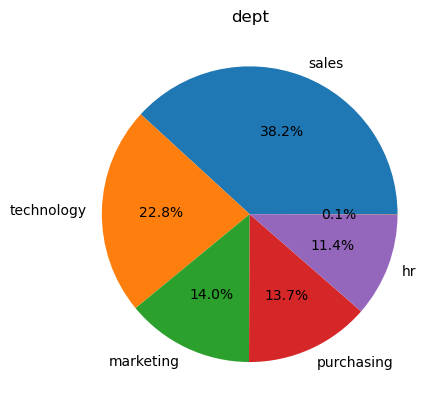

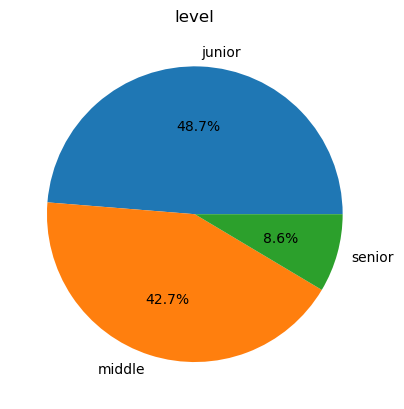

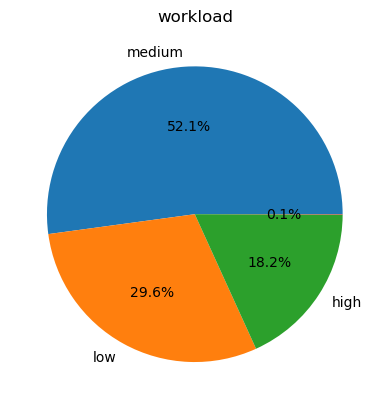

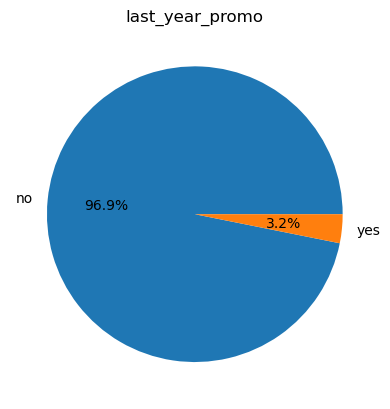

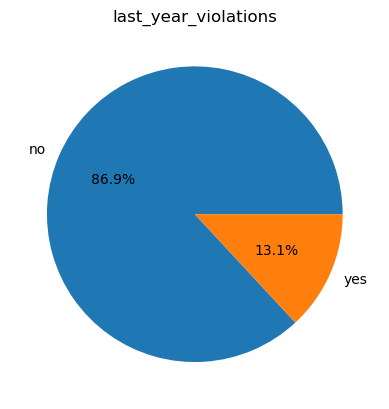

In [69]:
# вызовим функцию для построения круговых диграмм для категориальных признаков
for name in test_df.select_dtypes(exclude = 'number').columns.to_list():
    build_pie(test_df, name)
    plt.show()

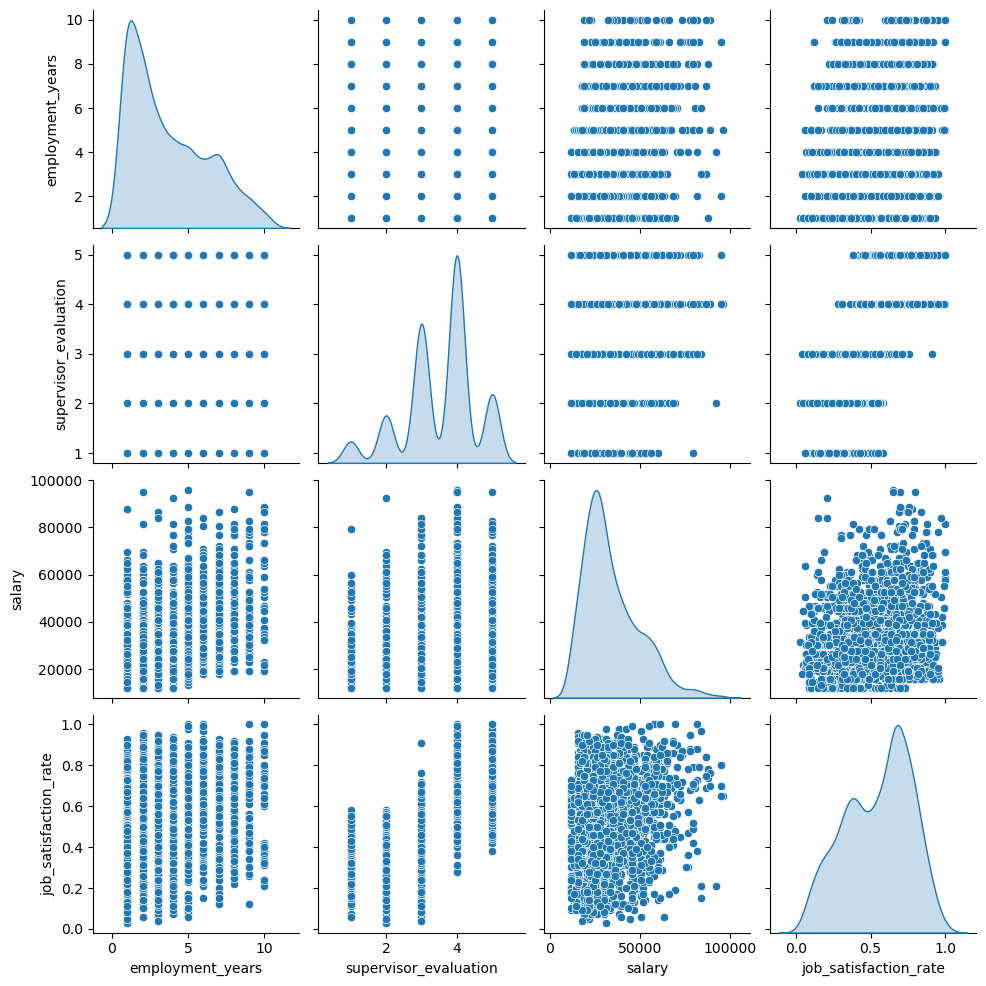

In [70]:
# построим матрицу диаграмм рассиения и оценим связь между признаками
sns.pairplot(test_df[['employment_years', 'supervisor_evaluation', 'salary','job_satisfaction_rate']],diag_kind = 'kde')
plt.show()

In [71]:
# воспользуемся методом phik_matrix для определения корреляции количественных и категориальных признаков
phik_overview_test = phik_matrix(test_df.drop(columns = 'id'), 
                            interval_cols= list(test_df.select_dtypes(include = 'number').columns)
                           )

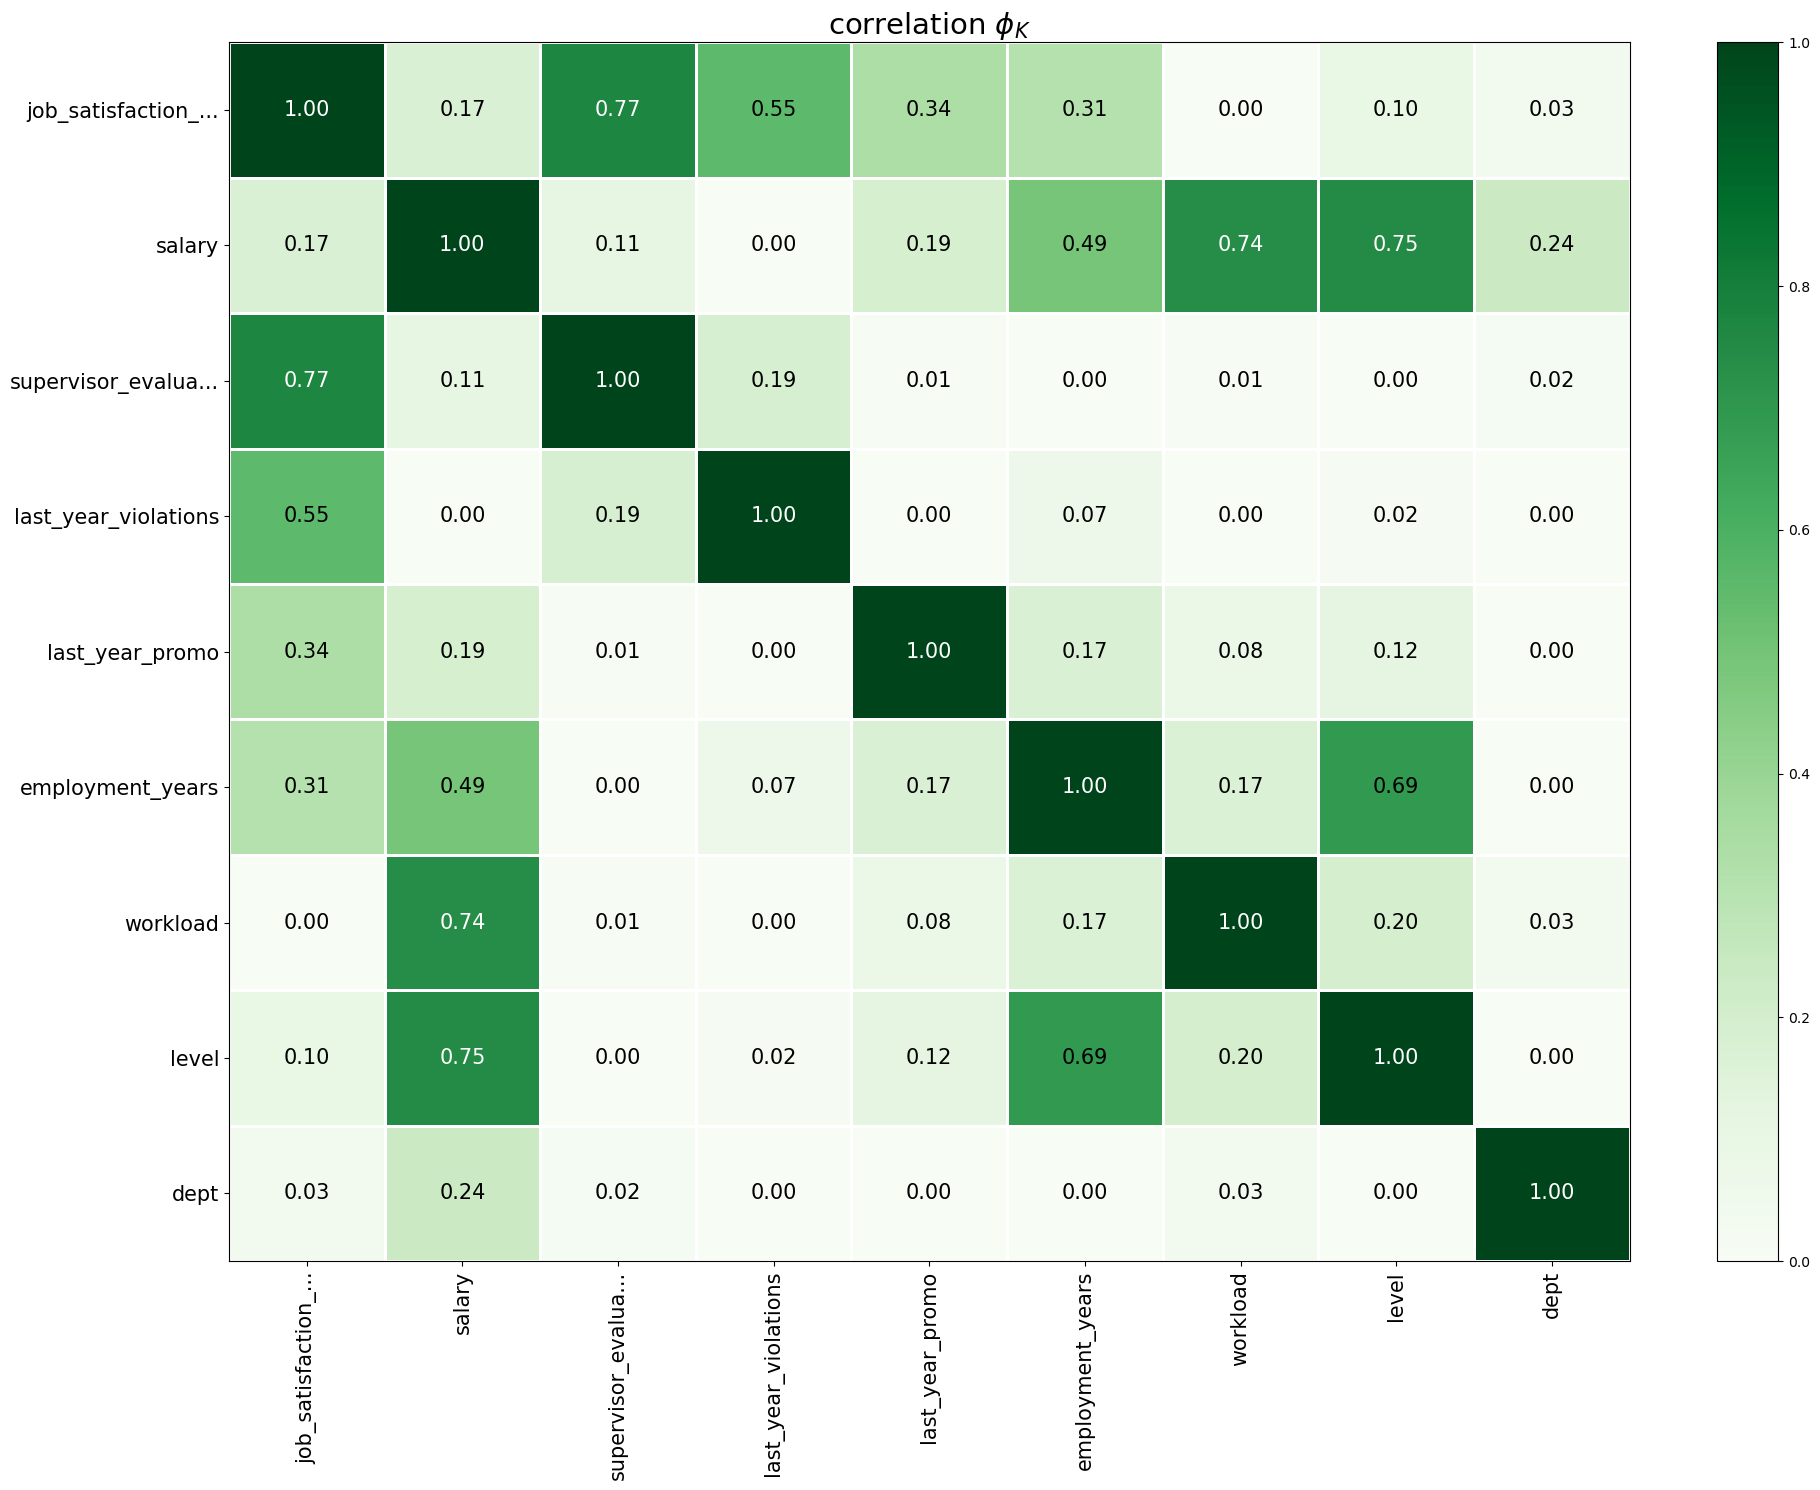

In [72]:
# построим матрицу корреляци между всеми признаками
plot_correlation_matrix(
    phik_overview_test.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

In [73]:
# сравним характеристики тествовых и тренировочных данных
test_df.describe(include = 'all')

id   dept   level workload  employment_years  \
count     2000.000000   1998    1999     2000       2000.000000   
unique            NaN      6       3        4               NaN   
top               NaN  sales  junior   medium               NaN   
freq              NaN    763     974     1043               NaN   
mean    552765.213500    NaN     NaN      NaN          3.666500   
std     253851.326129    NaN     NaN      NaN          2.537222   
min     100298.000000    NaN     NaN      NaN          1.000000   
25%     339052.000000    NaN     NaN      NaN          1.000000   
50%     550793.000000    NaN     NaN      NaN          3.000000   
75%     765763.750000    NaN     NaN      NaN          6.000000   
max     999029.000000    NaN     NaN      NaN         10.000000   

       last_year_promo last_year_violations  supervisor_evaluation  \
count             2000                 2000            2000.000000   
unique               2                    2                    NaN   
top                 no                   no                    NaN   
freq              1937                 1738                    NaN   
mean               NaN                  NaN               3.526500   
std                NaN                  NaN               0.996892   
min                NaN                  NaN               1.000000   
25%                NaN                  NaN               3.000000   
50%                NaN                  NaN               4.000000   
75%                NaN                  NaN               4.000000   
max                NaN                  NaN               5.000000   

              salary  job_satisfaction_rate  
count    2000.000000             2000.00000  
unique           NaN                    NaN  
top              NaN                    NaN  
freq             NaN                    NaN  
mean    34066.800000                0.54878  
std     15398.436729                0.22011  
min     12000.000000                0.03000  
25%     22800.000000                0.38000  
50%     30000.000000                0.58000  
75%     43200.000000                0.72000  
max     96000.000000                1.00000

In [74]:
train_job.describe(include = 'all')

id   dept   level workload  employment_years  \
count     4000.000000   3994    3996     4000       4000.000000   
unique            NaN      5       3        3               NaN   
top               NaN  sales  junior   medium               NaN   
freq              NaN   1512    1894     2066               NaN   
mean    544957.621000    NaN     NaN      NaN          3.718500   
std     257883.104622    NaN     NaN      NaN          2.542513   
min     100954.000000    NaN     NaN      NaN          1.000000   
25%     322836.750000    NaN     NaN      NaN          2.000000   
50%     534082.500000    NaN     NaN      NaN          3.000000   
75%     771446.000000    NaN     NaN      NaN          6.000000   
max     999521.000000    NaN     NaN      NaN         10.000000   

       last_year_promo last_year_violations  supervisor_evaluation  \
count             4000                 4000            4000.000000   
unique               2                    2                    NaN   
top                 no                   no                    NaN   
freq              3880                 3441                    NaN   
mean               NaN                  NaN               3.476500   
std                NaN                  NaN               1.008812   
min                NaN                  NaN               1.000000   
25%                NaN                  NaN               3.000000   
50%                NaN                  NaN               4.000000   
75%                NaN                  NaN               4.000000   
max                NaN                  NaN               5.000000   

              salary  job_satisfaction_rate  
count    4000.000000            4000.000000  
unique           NaN                    NaN  
top              NaN                    NaN  
freq             NaN                    NaN  
mean    33926.700000               0.533995  
std     14900.703838               0.225327  
min     12000.000000               0.030000  
25%     22800.000000               0.360000  
50%     30000.000000               0.560000  
75%     43200.000000               0.710000  
max     98400.000000               1.000000

В целом нет каких то существенных различий между тренировочными и тестовыми данными.

Единственное в тестовых данных в столбцах `dept` и `workload` больше уникальных значение на 1 из-за пустых значений и пропусков,но данную проблему решим в пайплайне.

In [76]:
# создадим новые переменные для тестовых и тренировочных данных
data_1 = train_job.copy()
data_2 = test_df.copy()

In [77]:
SVR()
data_1['label'] = 'datatrain'
data_2['label'] = 'datatest'

In [78]:
# обединим два датасета
combined_data = pd.concat([data_1, data_2])

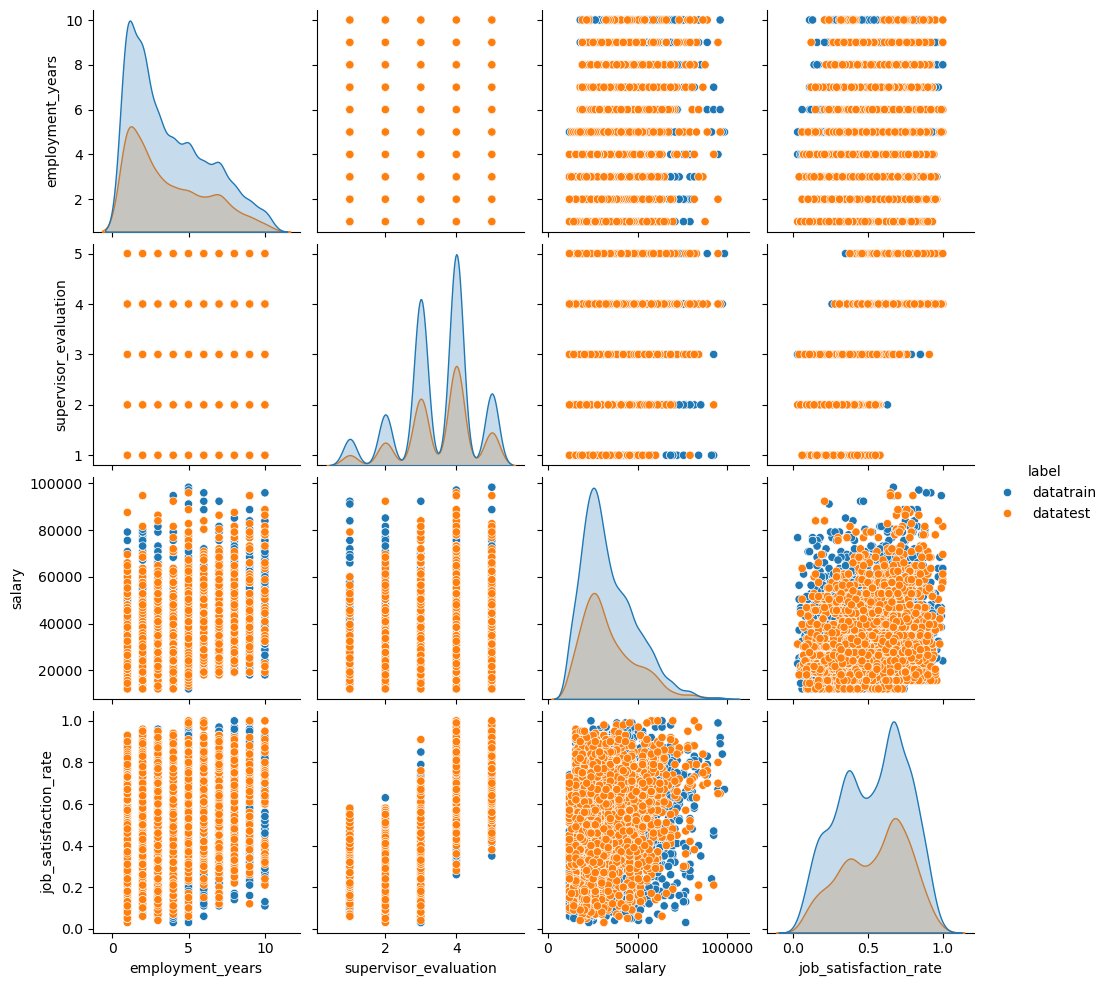

In [79]:
# сравним распределения тестовых и тренировочный данных
sns.pairplot(combined_data[['employment_years', 'supervisor_evaluation', 'salary','job_satisfaction_rate', 'label']], hue = 'label')
plt.show()

In [80]:
# создадим функцию для построения круговой диаграммы для разных датасетов
def contrast_data_pie(data, name_column):
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(f'Признак {name_column}', y=0.98, x = 1)
    plt.subplots_adjust(wspace=0.5, hspace=0.5, right = 2)
    
    ax1.set_title('datatrain')
    ax1.pie(data.query('label == "datatrain"')[name_column].value_counts(), 
            labels = data.query('label == "datatrain"')[name_column].value_counts().index,
            autopct='%1.1f%%'
           )
    
    
    ax2.set_title('datatest')
    ax2.pie(data.query('label == "datatest"')[name_column].value_counts(), 
            labels = data.query('label == "datatest"')[name_column].value_counts().index,
            autopct='%1.1f%%'
           )
    
    
    plt.show()

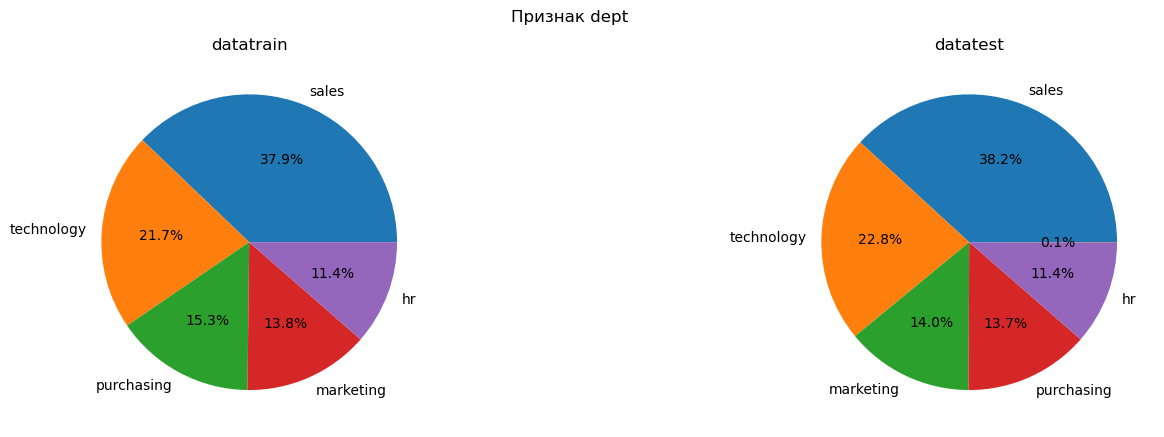

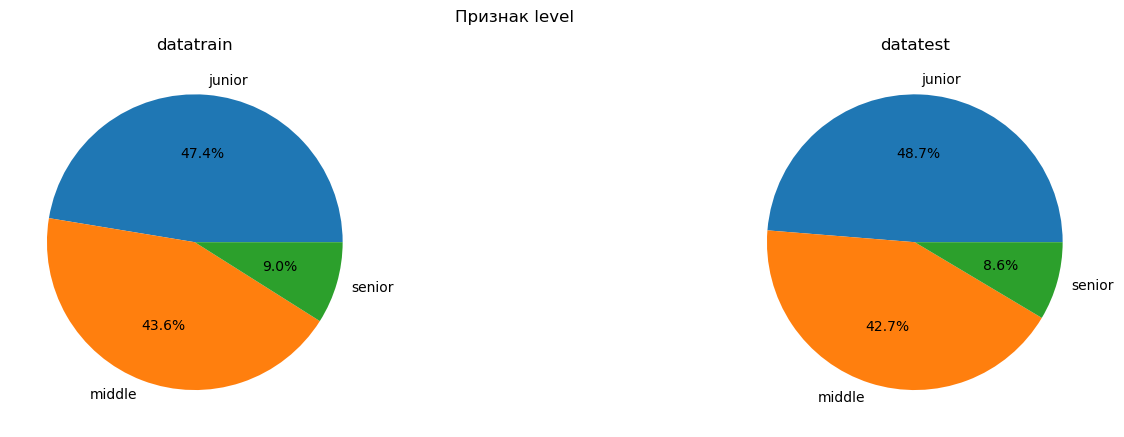

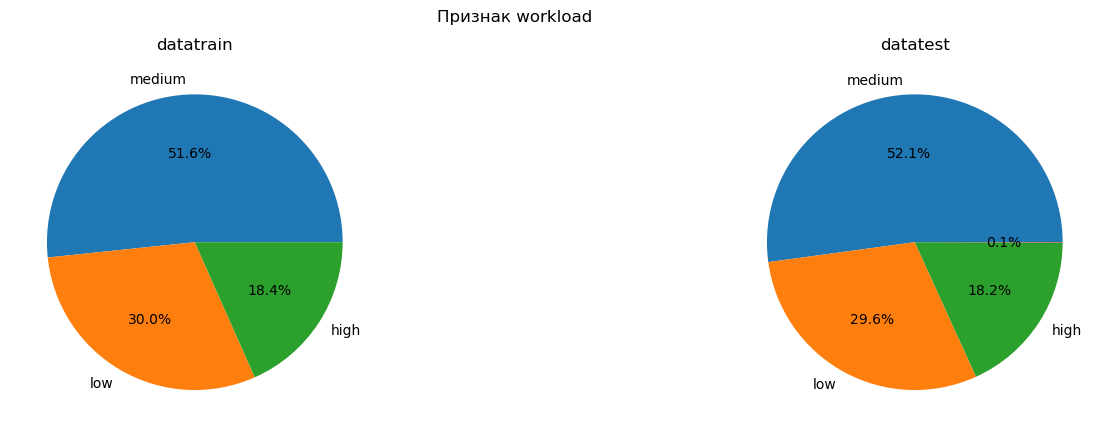

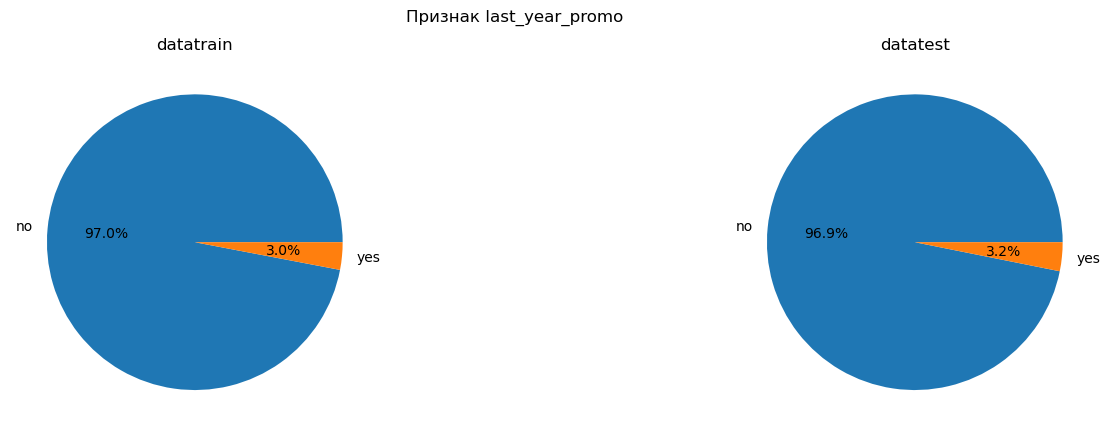

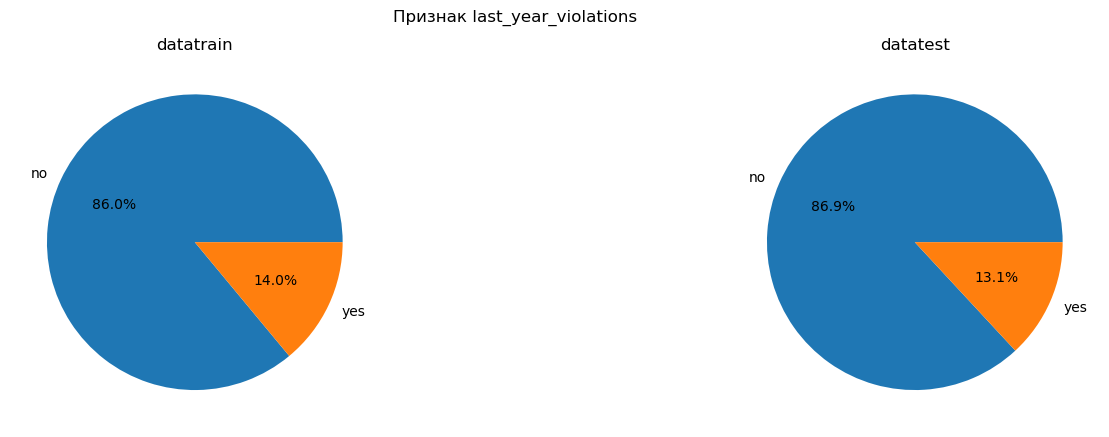

In [81]:
# вызовем функцию для построение круговых диаграм категориальных признаков для разных датасетов
for name in ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations']:
    contrast_data_pie(combined_data, name)

## Подготовка данных

Подготовим тренировочные и тестовые данные. 

Обработаем пропуски и пустые значения.

Закодируем количественные  и категориальные данные. 



In [84]:

X_train = train_job.copy().set_index('id').drop_duplicates().drop(['job_satisfaction_rate'], axis = 1)
y_train = train_job.copy().set_index('id').drop_duplicates()['job_satisfaction_rate']
X_test = test_df.copy().set_index('id').drop_duplicates().drop(['job_satisfaction_rate'], axis = 1)
y_test = test_df.copy().set_index('id').drop_duplicates()['job_satisfaction_rate']

# создаём списки с названиями признаков
ohe_columns = ['dept', 'last_year_violations', 'last_year_promo']
ord_columns = ['level', 'workload',]
num_columns = ['employment_years', 'salary', 'supervisor_evaluation']

# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
    )

# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    #['hr','marketing', 'purchasing', 'technology', 'sales']
                    ['junior', 'middle', 'senior'], 
                    ['low', 'medium', 'high']
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

data_preprocessor_tree = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
    ], 
    remainder='passthrough'
)


In [85]:
# посторим какие тренировочные данные получились
pd.DataFrame(
    data_preprocessor.fit_transform(X_train),
    columns=data_preprocessor.get_feature_names_out()
).head()

ohe__dept_marketing  ohe__dept_purchasing  ohe__dept_sales  \
0                  0.0                   0.0              1.0   
1                  0.0                   0.0              0.0   
2                  0.0                   0.0              1.0   
3                  0.0                   0.0              0.0   
4                  0.0                   0.0              0.0   

   ohe__dept_technology  ohe__last_year_violations_yes  \
0                   0.0                            0.0   
1                   0.0                            0.0   
2                   0.0                            0.0   
3                   1.0                            0.0   
4                   0.0                            0.0   

   ohe__last_year_promo_yes  ord__level  ord__workload  num__employment_years  \
0                       0.0         0.0            1.0              -0.710671   
1                       0.0         0.0            2.0              -0.710671   
2                       0.0         0.0            0.0              -1.101784   
3                       0.0         0.0            0.0               0.071557   
4                       0.0         0.0            1.0              -1.101784   

   num__salary  num__supervisor_evaluation  
0    -0.694908                   -2.400916  
1     0.261989                    1.497231  
2    -1.492322                   -1.426379  
3    -1.093615                   -1.426379  
4    -0.774649                   -0.451843

In [86]:
# посторим какие тестовые данные получились
pd.DataFrame(
    data_preprocessor.transform(X_test),
    columns=data_preprocessor.get_feature_names_out()
).head()

C:\Users\кц\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


ohe__dept_marketing  ohe__dept_purchasing  ohe__dept_sales  \
0                  1.0                   0.0              0.0   
1                  0.0                   0.0              0.0   
2                  0.0                   0.0              1.0   
3                  0.0                   0.0              1.0   
4                  0.0                   0.0              0.0   

   ohe__dept_technology  ohe__last_year_violations_yes  \
0                   0.0                            0.0   
1                   0.0                            0.0   
2                   0.0                            0.0   
3                   0.0                            0.0   
4                   0.0                            0.0   

   ohe__last_year_promo_yes  ord__level  ord__workload  num__employment_years  \
0                       0.0         0.0            1.0              -0.710671   
1                       0.0         0.0            1.0              -1.101784   
2                       0.0         1.0            0.0               0.462670   
3                       0.0         1.0            0.0               0.853784   
4                       0.0         1.0            1.0               0.462670   

   num__salary  num__supervisor_evaluation  
0    -0.375942                    1.497231  
1    -0.296201                    0.522694  
2    -1.013873                    0.522694  
3    -1.013873                    0.522694  
4     0.421472                    1.497231

Тренировочные и тествоые данные сохранили в переменные X_train, x_test, y_train, y_test. 

Пропуски и пустые значения обработали с помощью SimpleImputer(missing_values=np.nan, strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore'), OrdinalEncoder(handle_unknown='use_encoded_value')

## Обучение моделей

Обучим как минимум две модели. Возьмем одну линейную модель, а в качестве второй — дерево решений. Подберем гиперпараметры как минимум для одной модели. Выберим лучшую модель и проверим её качество. Выбор сделайем на основе новой метрики — SMAPE (англ. symmetric mean absolute percentage error, «симметричное среднее абсолютное процентное отклонение»). 

SMAPE = 100/n * ∑((|y_true - y_pred|)/(|y_true| + |y_pred|)/2)

Критерий успеха: SMAPE ≤15 на тестовой выборке.

In [90]:
# создаем фукцию для расчета метрики SMAPE
def smape(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred)))

smape_scorer = make_scorer(score_func=smape, greater_is_better=False)

In [91]:
%%time
# обучаем модель LinearRegression()
pipe_linearreg = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LinearRegression())
])

param_linearreg= [
    # словарь для модели LinearRegression()
    {
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
]

randomized_linearreg = RandomizedSearchCV(
    pipe_linearreg, 
    param_linearreg, 
    cv=5,
    n_iter=20,
    verbose = 3,
    scoring= {'smape': smape_scorer, 'mae': 'neg_mean_absolute_error', 'mse': 'neg_mean_squared_error', 'r2': 'r2'},
    refit = 'smape',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_linearreg.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_linearreg.best_estimator_)
print ('Среднее значение метрики SMAPE кроссвалидационной проверки для лучшей обученной модели:', randomized_linearreg.best_score_)


C:\Users\кц\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=20. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept',
                                                   'last_year_violations',
                                              

In [92]:
%%time
# обучаем модель SVR()
pipe_svr = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', SVR(epsilon = 0.05))
])

param_svr= [
    
    # словарь для модели SVR()
    {
        'models__C': range(1,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
]

randomized_svr = RandomizedSearchCV(
    pipe_svr, 
    param_svr, 
    cv=5,
    n_iter=20,
    verbose = 3,
    scoring= {'smape': smape_scorer, 'mae': 'neg_mean_absolute_error', 'mse': 'neg_mean_squared_error', 'r2': 'r2'},
    refit = 'smape',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_svr.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_svr.best_estimator_)
print ('Среднее значение метрики SMAPE кроссвалидационной проверки для лучшей обученной модели:', randomized_svr.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\кц\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 12 is smaller than n_iter=20. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept',
                                                   'last_year_violations',
                                                   'last_year_promo']),
                                  

In [93]:
%%time
# обучаем модель DecisionTreeRegressor()
pipe_treeclass = Pipeline([
    ('preprocessor', data_preprocessor_tree),
    ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
])

param_treeclass= [
    
    # словарь для модели DecisionTreeRegressor()
        {
        'models__max_depth': range(2, 11),
        'models__min_samples_split': range(2, 11),
        'models__min_samples_leaf': range(2, 11),
        #'models__max_features': range(2, 15),  
    }
]

randomized_treeclass = RandomizedSearchCV(
    pipe_treeclass, 
    param_treeclass, 
    cv=5,
    n_iter=20,
    verbose = 3,
    scoring= {'smape': smape_scorer, 'mae': 'neg_mean_absolute_error', 'mse': 'neg_mean_squared_error', 'r2': 'r2'},
    refit = 'smape',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_treeclass.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_treeclass.best_estimator_)
print ('Среднее значение метрики SMAPE кроссвалидационной проверки для лучшей обученной модели:', randomized_treeclass.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept',
                                                   'last_year_violations',
                                            

In [94]:
# оценка лучшей модели на тестовых данных
y_test_pred = randomized_treeclass.predict(X_test)
print('Результат метрики SMAPE на тестовых данных', smape(y_test, y_test_pred))

Результат метрики SMAPE на тестовых данных 14.822414729998796


C:\Users\кц\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [95]:
# для отображения таблицы во всю ширину
pd.set_option('display.max_columns', None)

In [96]:
# посмотрим топ 5 моделей с лучшими результатами метрик
pd.DataFrame(randomized_svr.cv_results_).sort_values(by = 'rank_test_smape').head(5)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
3        1.518913      0.025758         0.320825        0.013732   
6        1.675924      0.023174         0.331225        0.023678   
0        1.223089      0.085340         0.334026        0.025980   
9        1.923741      0.009688         0.333225        0.031943   
10       1.337899      0.088648         0.401230        0.021518   

   param_preprocessor__num  param_models__C  \
3         StandardScaler()                2   
6         StandardScaler()                3   
0         StandardScaler()                1   
9         StandardScaler()                4   
10          MinMaxScaler()                4   

                                               params  split0_test_smape  \
3   {'preprocessor__num': StandardScaler(), 'model...         -14.228044   
6   {'preprocessor__num': StandardScaler(), 'model...         -14.226353   
0   {'preprocessor__num': StandardScaler(), 'model...         -14.317041   
9   {'preprocessor__num': StandardScaler(), 'model...         -14.263373   
10  {'preprocessor__num': MinMaxScaler(), 'models_...         -18.937254   

    split1_test_smape  split2_test_smape  split3_test_smape  \
3          -13.597185         -14.246747         -14.504191   
6          -13.751991         -14.350993         -14.384590   
0          -13.768599         -14.166058         -14.906688   
9          -13.992217         -14.514207         -14.349148   
10         -18.646429         -17.782620         -19.779632   

    split4_test_smape  mean_test_smape  std_test_smape  rank_test_smape  \
3          -14.184760       -14.152185        0.299229                1   
6          -14.131784       -14.169142        0.227232                2   
0          -13.998497       -14.231376        0.383678                3   
9          -14.155707       -14.254930        0.176089                4   
10         -19.049327       -18.839052        0.646792                5   

    split0_test_mae  split1_test_mae  split2_test_mae  split3_test_mae  \
3         -0.058759        -0.054922        -0.056470        -0.058287   
6         -0.058351        -0.055077        -0.056471        -0.058051   
0         -0.059281        -0.055853        -0.057237        -0.059453   
9         -0.058020        -0.055580        -0.056698        -0.057985   
10        -0.076521        -0.076847        -0.074661        -0.078456   

    split4_test_mae  mean_test_mae  std_test_mae  rank_test_mae  \
3         -0.058616      -0.057411      0.001491              3   
6         -0.058243      -0.057239      0.001278              1   
0         -0.058865      -0.058138      0.001385              4   
9         -0.058049      -0.057266      0.000986              2   
10        -0.076079      -0.076513      0.001225              5   

    split0_test_mse  split1_test_mse  split2_test_mse  split3_test_mse  \
3         -0.005343        -0.004885        -0.005164        -0.005454   
6         -0.005285        -0.004951        -0.005175        -0.005427   
0         -0.005458        -0.005001        -0.005218        -0.005599   
9         -0.005259        -0.005045        -0.005226        -0.005424   
10        -0.009134        -0.009227        -0.008827        -0.009749   

    split4_test_mse  mean_test_mse  std_test_mse  rank_test_mse  \
3         -0.005363      -0.005242      0.000202              2   
6         -0.005329      -0.005233      0.000163              1   
0         -0.005401      -0.005335      0.000207              4   
9         -0.005320      -0.005255      0.000125              3   
10        -0.008929      -0.009173      0.000321              5   

    split0_test_r2  split1_test_r2  split2_test_r2  split3_test_r2  \
3         0.893764        0.901211        0.904785        0.895089   
6         0.894916        0.899874        0.904582        0.895614   
0         0.891463        0.898863        0.903796        0.892305   
9         0.895420        0.897959        0.90364

In [97]:
# посмотрим топ 5 моделей с лучшими результатами метрик
pd.DataFrame(randomized_treeclass.cv_results_).sort_values(by = 'rank_test_smape').head(5)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
19       0.056602      0.008547         0.028003        0.008075   
3        0.064205      0.008659         0.033403        0.006772   
7        0.054004      0.004776         0.033204        0.005778   
12       0.057005      0.005020         0.034602        0.007285   
4        0.055402      0.005920         0.029004        0.004099   

    param_models__min_samples_split  param_models__min_samples_leaf  \
19                                6                               2   
3                                 3                               5   
7                                 6                               3   
12                                9                               4   
4                                 4                               5   

    param_models__max_depth  \
19                       10   
3                        10   
7                         9   
12                        9   
4                         9   

                                               params  split0_test_smape  \
19  {'models__min_samples_split': 6, 'models__min_...         -16.143144   
3   {'models__min_samples_split': 3, 'models__min_...         -15.912096   
7   {'models__min_samples_split': 6, 'models__min_...         -16.223357   
12  {'models__min_samples_split': 9, 'models__min_...         -16.368705   
4   {'models__min_samples_split': 4, 'models__min_...         -16.365239   

    split1_test_smape  split2_test_smape  split3_test_smape  \
19         -14.708331         -16.802227         -17.134475   
3          -15.406973         -16.835506         -17.045427   
7          -15.401153         -17.224547         -17.587043   
12         -15.694633         -17.272303         -17.822590   
4          -15.816556         -17.349984         -17.528354   

    split4_test_smape  mean_test_smape  std_test_smape  rank_test_smape  \
19         -15.835991       -16.124834        0.844806                1   
3          -16.258057       -16.291612        0.598632                2   
7          -16.727376       -16.632695        0.768673                3   
12         -16.751303       -16.781907        0.731758                4   
4          -16.957780       -16.803583        0.634664                5   

    split0_test_mae  split1_test_mae  split2_test_mae  split3_test_mae  \
19        -0.067217        -0.059900        -0.067099        -0.068806   
3         -0.065967        -0.062663        -0.066880        -0.067907   
7         -0.068418        -0.063895        -0.069615        -0.071409   
12        -0.068938        -0.064490        -0.069428        -0.071611   
4         -0.068966        -0.064949        -0.070099        -0.070562   

    split4_test_mae  mean_test_mae  std_test_mae  rank_test_mae  \
19        -0.064887      -0.065582      0.003103              1   
3         -0.065878      -0.065859      0.001758              2   
7         -0.069008      -0.068469      0.002497              3   
12        -0.069274      -0.068748      0.002328              4   
4         -0.069839      -0.068883      0.002035              5   

    split0_test_mse  split1_test_mse  split2_test_mse  split3_test_mse  \
19        -0.007932        -0.006226        -0.008077        -0.008024   
3         -0.007347        -0.006722        -0.007917        -0.007705   
7         -0.007898        -0.006908        -0.008048        -0.008441   
12        -0.007922        -0.007007        -0.007921        -0.008479   
4         -0.007860        -0.007065        -0.008204        -0.008269   

    split4_test_mse  mean_test_mse  std_test_mse  rank_test_mse  \
19        -0.007595      -0.007571      0.000693              2   
3         -0.007528      -0.007444      0.000408              1   
7         -0.007956      -0.007850      0.000508              3   
12        -0.008043      -0.007875      0.000480              4   
4         -0.008185      -0.007916      0.000449              5   

In [98]:
# создание и обучение модели DummyRegressor
dummy_model = DummyRegressor(strategy = 'median')
dummy_model.fit(X_train, y_train)
dummy_model_preds = dummy_model.predict(X_test)

In [99]:

# оценка качества модели по метрикам
dummy_smape= smape(y_test, dummy_model_preds)
dummy_r2= r2_score(y_test, dummy_model_preds)
dummy_mae = mean_absolute_error(y_test, dummy_model_preds)
dummy_rmse = mean_squared_error(y_test, dummy_model_preds)

print('treeclass smape =', round(smape(y_test, y_test_pred),2))
print('treeclass r2 =', round(r2_score(y_test, y_test_pred), 2)) 
print('treeclass mae =', round(mean_absolute_error(y_test, y_test_pred), 2))
print('treeclass rmse =', round(math.sqrt(mean_squared_error(y_test, y_test_pred)), 2)) 

print('-------')

print('dummy smape =', round(dummy_smape, 2)) 
print('dummy r2 =', round(dummy_r2, 2)) 
print('dummy mae =', round(dummy_mae, 2)) 
print('dummy rmse =', round(math.sqrt(dummy_rmse), 2)) 

treeclass smape = 14.82
treeclass r2 = 0.86
treeclass mae = 0.06
treeclass rmse = 0.08
-------
dummy smape = 38.04
dummy r2 = -0.0
dummy mae = 0.19
dummy rmse = 0.22


В итоге лучшая модель: DecisionTreeRegressor() с параметрамами preprocessor__num': MinMaxScaler(), 'models__min_samples_split': 13, 'models__min_samples_leaf': 5, 'models__max_depth': 12.

Лучшая метрика на тренировочных данных SMAPE = 16.1, на тестовых данных SMAPE = 14.7

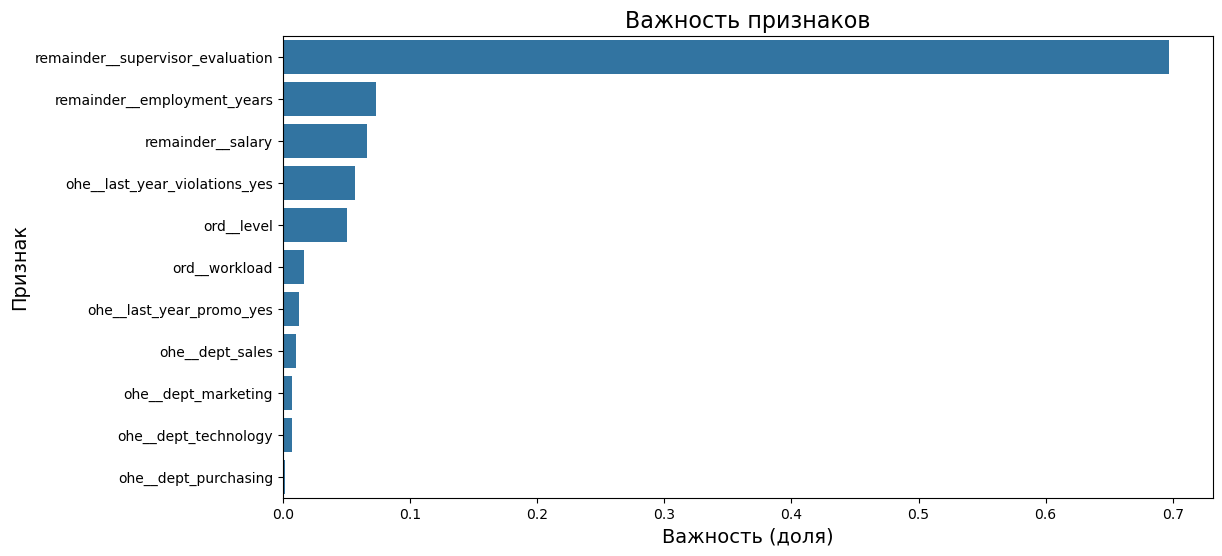

In [101]:
# формируем таблицу важности признаков и сортируем её
feature_importances = pd.DataFrame(
    {
        'Feature': randomized_treeclass.best_estimator_[:-1].get_feature_names_out(),
        'Importance': randomized_treeclass.best_estimator_['models'].feature_importances_
    }).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 6))

# Построим столбчатый график:
# по оси x — важность признака;
# по оси y - его наименование.
ax = sns.barplot(data=feature_importances, x='Importance', y='Feature')

# добавляем названия графика и осей
ax.set_title('Важность признаков', fontsize=16)
ax.set_xlabel('Важность (доля)', fontsize=14)
ax.set_ylabel('Признак', fontsize=14)

# отображаем график
plt.show()

In [102]:
text_representation = export_text(
    randomized_treeclass.best_estimator_['models'],
    feature_names=list(data_preprocessor.get_feature_names_out()),
)
print(text_representation) 

|--- num__salary <= 3.50
|   |--- ohe__last_year_violations_yes <= 0.50
|   |   |--- num__employment_years <= 1.50
|   |   |   |--- num__supervisor_evaluation <= 16200.00
|   |   |   |   |--- ohe__dept_marketing <= 0.50
|   |   |   |   |   |--- num__supervisor_evaluation <= 13800.00
|   |   |   |   |   |   |--- num__salary <= 1.50
|   |   |   |   |   |   |   |--- value: [0.22]
|   |   |   |   |   |   |--- num__salary >  1.50
|   |   |   |   |   |   |   |--- num__salary <= 2.50
|   |   |   |   |   |   |   |   |--- ohe__dept_purchasing <= 0.50
|   |   |   |   |   |   |   |   |   |--- value: [0.14]
|   |   |   |   |   |   |   |   |--- ohe__dept_purchasing >  0.50
|   |   |   |   |   |   |   |   |   |--- value: [0.17]
|   |   |   |   |   |   |   |--- num__salary >  2.50
|   |   |   |   |   |   |   |   |--- ohe__dept_sales <= 0.50
|   |   |   |   |   |   |   |   |   |--- ohe__dept_purchasing <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- value: [0.18]
|   |   |   |   |   |   |   |   |

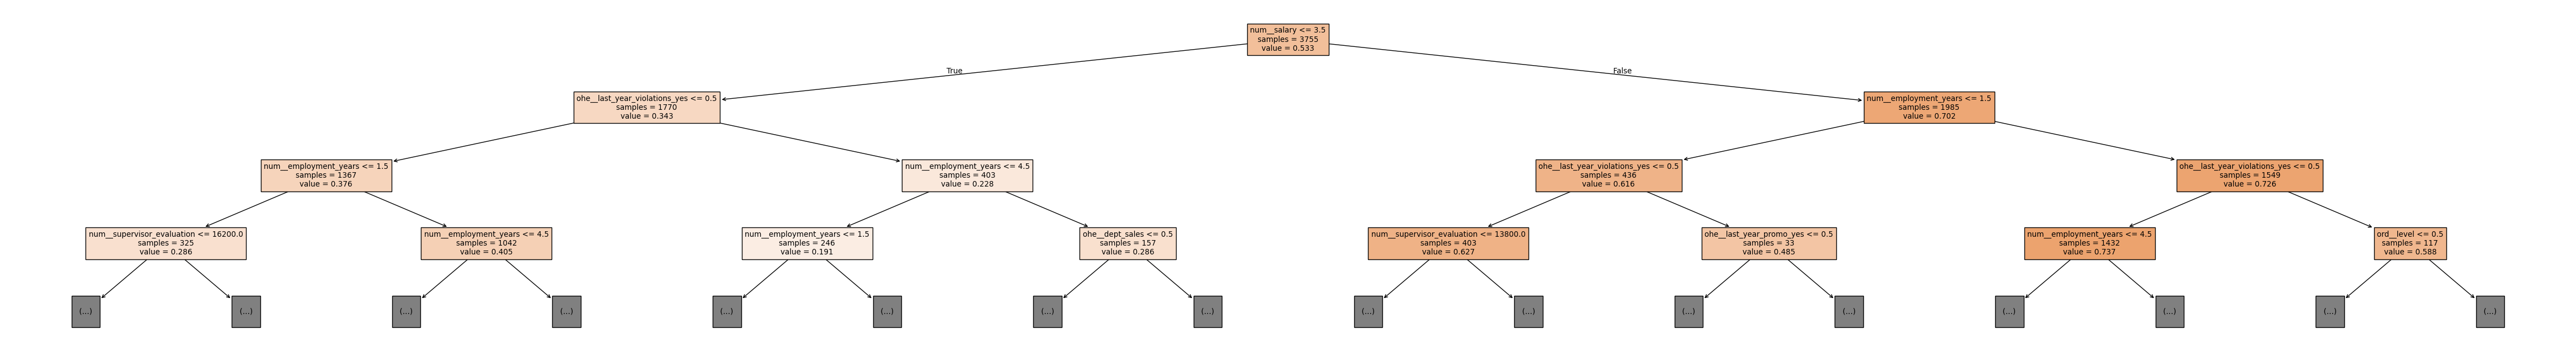

In [103]:
plt.figure(figsize=(60, 8))
plot_tree(
    randomized_treeclass.best_estimator_['models'], 
    max_depth=3, 
    filled=True, 
    impurity=False, 
    feature_names=data_preprocessor.get_feature_names_out()
)
plt.show()

Модель получилась достаточно сложной, но в целом понятно, что признак оценки качества работы сотрудника оказывает самое большое влияние на исход целевого признака. В целом модель присваевает низкую удовтеворенность у тех сотрудников, которые имеют не выскокую оценку за качество работы, небольшой стаж, зарплату, уровень занимаемой должности и имеют нарушения за трудовой договор. 

Повышения за последний год, отдел в котором работает сотрдуник, его загруженность не сильно влияет на удовлетворенность сотрудника.



### Вывод по моделям

Выше мы проводили корреляцию между целевым признаком и остальными, там видно, что связь везде не линейная, поэтому модель LinearRegression() здесь явно будет проигрывать среди других моделей.

Не могу дать однозначного ответа почему модель DecisionTreeRegressor() справилась лучше. Возможно я подобрал не совсем удачные параметры для модели SVR(), но усложнять её тоже не вариант, тогда модель может переобучиться и стать совсем сложной, также при использовании нелинейного ядра достаточно много уходит времени на обучение. Скорей всего модель SVR() было сложней провести гиперплоскость, так как выше на графиках корреляци видно, что данные сильно перемешены и нет четкого разделения на группы удовлетворенных и неудовлетворенных сотрудников. У модели DecisionTreeRegressor() другой алгоритм поиска взаимосвязей между данными и в данном случае он подошёл для наших данных лучше, чем SVR().

Также нужно ориентироваться на то, что лучше для заказчика, бизнеса. Модель SVR() больше занимает времени для расчётов и её сложней интерпретировать, нежели DecisionTreeRegressor(). 

Поэтому,  в нашем случае выберем модель DecisionTreeRegressor() с параметрамами preprocessor__num': MinMaxScaler(), 'models__min_samples_split': 13, 'models__min_samples_leaf': 5, 'models__max_depth': 12. На тренировочных данных SMAPE = 15.6, на тестовых данных SMAPE = 14.1.

# Вторая задача

## Загрузка данных

In [109]:
# загрузим данные и сохраним
try:
    train_quit = pd.read_csv('train_quit.csv')
    test_target_quit = pd.read_csv('test_target_quit.csv')
except:
    train_quit = pd.read_csv('/datasets/train_quit.csv')
    test_target_quit = pd.read_csv('/datasets/test_target_quit.csv')

In [110]:
# наглядно оценим
train_quit.head()

id        dept   level workload  employment_years last_year_promo  \
0  723290       sales  middle     high                 2              no   
1  814010       sales  junior   medium                 2              no   
2  155091  purchasing  middle   medium                 5              no   
3  257132       sales  junior   medium                 2              no   
4  910140   marketing  junior   medium                 2              no   

  last_year_violations  supervisor_evaluation  salary quit  
0                   no                      4   54000   no  
1                   no                      4   27600   no  
2                   no                      1   37200   no  
3                  yes                      3   24000  yes  
4                   no                      5   25200   no

In [111]:
test_target_quit.head()

id quit
0  999029  yes
1  372846   no
2  726767   no
3  490105   no
4  416898  yes

In [112]:
train_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


In [113]:
test_target_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [114]:
train_quit.describe(include = 'all')

id   dept   level workload  employment_years  \
count     4000.000000   4000    4000     4000       4000.000000   
unique            NaN      5       3        3               NaN   
top               NaN  sales  junior   medium               NaN   
freq              NaN   1438    1949     2118               NaN   
mean    552099.283750    NaN     NaN      NaN          3.701500   
std     260158.031387    NaN     NaN      NaN          2.541852   
min     100222.000000    NaN     NaN      NaN          1.000000   
25%     327785.750000    NaN     NaN      NaN          2.000000   
50%     546673.000000    NaN     NaN      NaN          3.000000   
75%     781497.750000    NaN     NaN      NaN          6.000000   
max     999915.000000    NaN     NaN      NaN         10.000000   

       last_year_promo last_year_violations  supervisor_evaluation  \
count             4000                 4000            4000.000000   
unique               2                    2                    NaN   
top                 no                   no                    NaN   
freq              3887                 3455                    NaN   
mean               NaN                  NaN               3.474750   
std                NaN                  NaN               1.004049   
min                NaN                  NaN               1.000000   
25%                NaN                  NaN               3.000000   
50%                NaN                  NaN               4.000000   
75%                NaN                  NaN               4.000000   
max                NaN                  NaN               5.000000   

              salary  quit  
count    4000.000000  4000  
unique           NaN     2  
top              NaN    no  
freq             NaN  2872  
mean    33805.800000   NaN  
std     15152.415163   NaN  
min     12000.000000   NaN  
25%     22800.000000   NaN  
50%     30000.000000   NaN  
75%     43200.000000   NaN  
max     96000.000000   NaN

In [115]:
test_target_quit.describe(include = 'all')

id  quit
count     2000.000000  2000
unique            NaN     2
top               NaN    no
freq              NaN  1436
mean    552765.213500   NaN
std     253851.326129   NaN
min     100298.000000   NaN
25%     339052.000000   NaN
50%     550793.000000   NaN
75%     765763.750000   NaN
max     999029.000000   NaN

- пропусков не замечано
- аномальных значений не замечено
- названия столбцов корректны
- типы данных корректны

## Предобработка данных

In [118]:
# проверим кол-во пропусков
train_quit.isna().sum()

id                       0
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
quit                     0
dtype: int64

In [119]:
test_target_quit.isna().sum()

id      0
quit    0
dtype: int64

In [120]:
# проверим кол-во явных и неявных дубликатов
train_quit.duplicated().sum()

0

In [121]:
train_quit['id'].duplicated().sum()

0

In [122]:
test_target_quit.duplicated().sum()

0

In [123]:
test_target_quit['id'].duplicated().sum()

0

In [124]:
# посмотрим как записаны значения в категориальных столбцах
for i in train_quit.select_dtypes(exclude = 'number').columns.to_list():
    print(train_quit[i].unique())

['sales' 'purchasing' 'marketing' 'technology' 'hr']
['middle' 'junior' 'sinior']
['high' 'medium' 'low']
['no' 'yes']
['no' 'yes']
['no' 'yes']


In [125]:
test_target_quit['quit'].unique()

array(['yes', 'no'], dtype=object)

Пропусков и дубликатов не обнаружено. Данные в порядке.

## Исследовательский анализ данных

Проведите общий исследовательский анализ данных.

Составим портрет «уволившегося сотрудника». 

Визуализируем и сравним распределения признака `job_satisfaction_rate` для ушедших и оставшихся сотрудников.

### Общий исследовательский анализ данных 

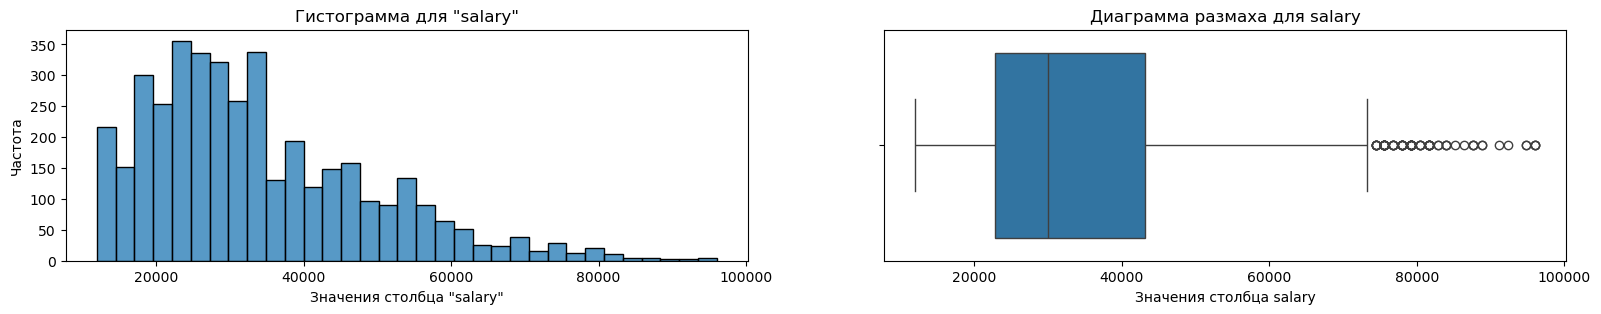

In [130]:
# вызовим функцию для построения гистрорамм и диаграмм размаха для количественных признаков
hist_box(train_quit, 'salary')
plt.show()

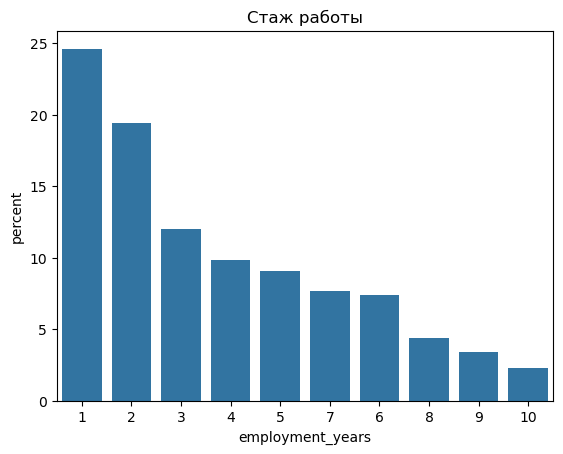

In [131]:
plt.title('Cтаж работы')
sns.countplot(train_quit, x="employment_years",  stat="percent",  order=train_quit['employment_years'].value_counts(ascending=False).index)
plt.show()

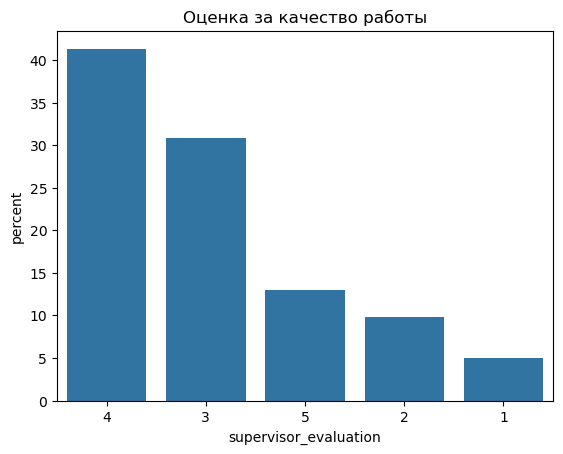

In [132]:
plt.title('Оценка за качество работы')
sns.countplot(train_quit, x="supervisor_evaluation", stat="percent", order=train_quit['supervisor_evaluation'].value_counts(ascending=False).index)
plt.show()

In [133]:
# вызовим функцию для построения круговой диграммы
# посмотрим какую долю занимают сотрудники с разной длительностью работы в компании
#build_pie(train_quit, 'employment_years')

In [134]:
# вызовим функцию для построения круговой диграммы
# посмотрим какую долю занимают работники с разной оценкой качества работы
#build_pie(train_quit, 'supervisor_evaluation')

- 75% сотрудников работают в компании не больше 6 лет, половина работников трудятся 1-3 года;
- в среднем на одного человека оценка за качество работы выходит 4, есть выбросы со значением = 1, но такое событие реально, оставим как есть;
- в среднем на одного сотрудника ежемесячная зарпалата = 30000 рублей, попадается много выбросов, но значения вполне реальны, скорей всего повышенной зарплатой обладают болле опытные сотрудники

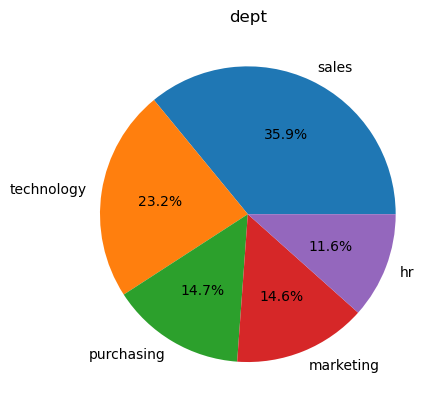

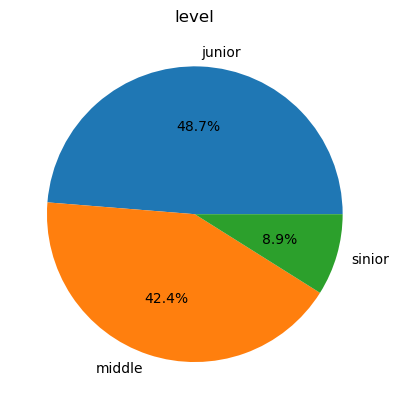

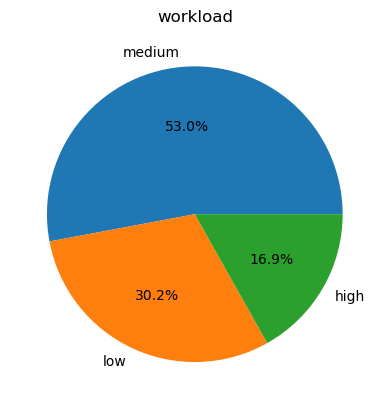

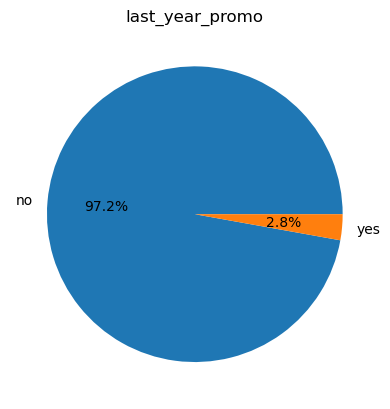

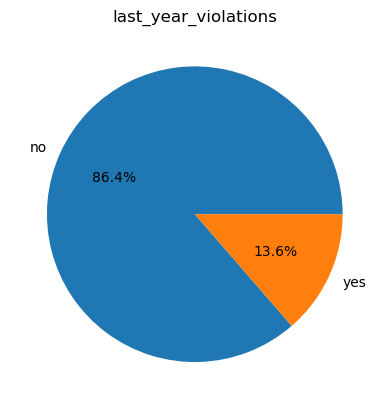

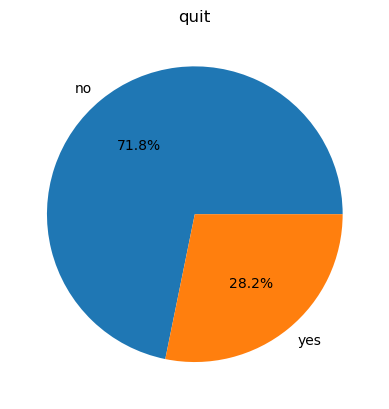

In [136]:
# вызовим функцию для построения круговых диграмм для категориальных признаков
for name in train_quit.select_dtypes(exclude = 'number').columns.to_list():
    build_pie(train_quit, name)
    plt.show()

- 59.1% сотрудников приходится на технологический отдел(23.2) и отдел продаж(35.9%).
- самых опытных специалистов 8.9%, остальная часть приходится по ровну на junior и middle;
- нагрузка распределна не равномерно, половина сотрудников имеет средную нагрузку, 30.2% среднюю, 16.9% выскокую;
- повышение за последний год было у 2.8%;
- 13.6% сотрудников нарушают трудовой договор.

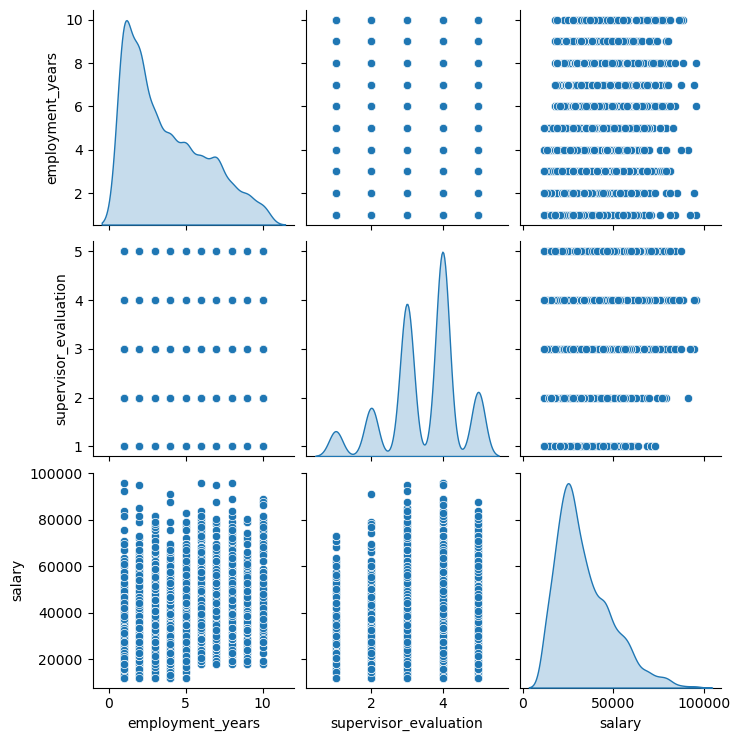

In [138]:
# построим матрицу диаграмм рассиения и оценим связь между признаками
sns.pairplot(train_quit[['employment_years', 'supervisor_evaluation', 'salary']],diag_kind = 'kde')
plt.show()

- зависисимость между входными признакми не линейна;
- более опытные сотрудники(больше 6 лет в компании) имеют минимальную зарплату выше, чем те кто в компании не долго

In [140]:
# воспользуемся методом phik_matrix для определения корреляции количественных и категориальных признаков
phik_overview_3 = phik_matrix(train_quit.drop(columns = 'id'), 
                            interval_cols= list(train_quit.select_dtypes(include = 'number').columns)
                           )

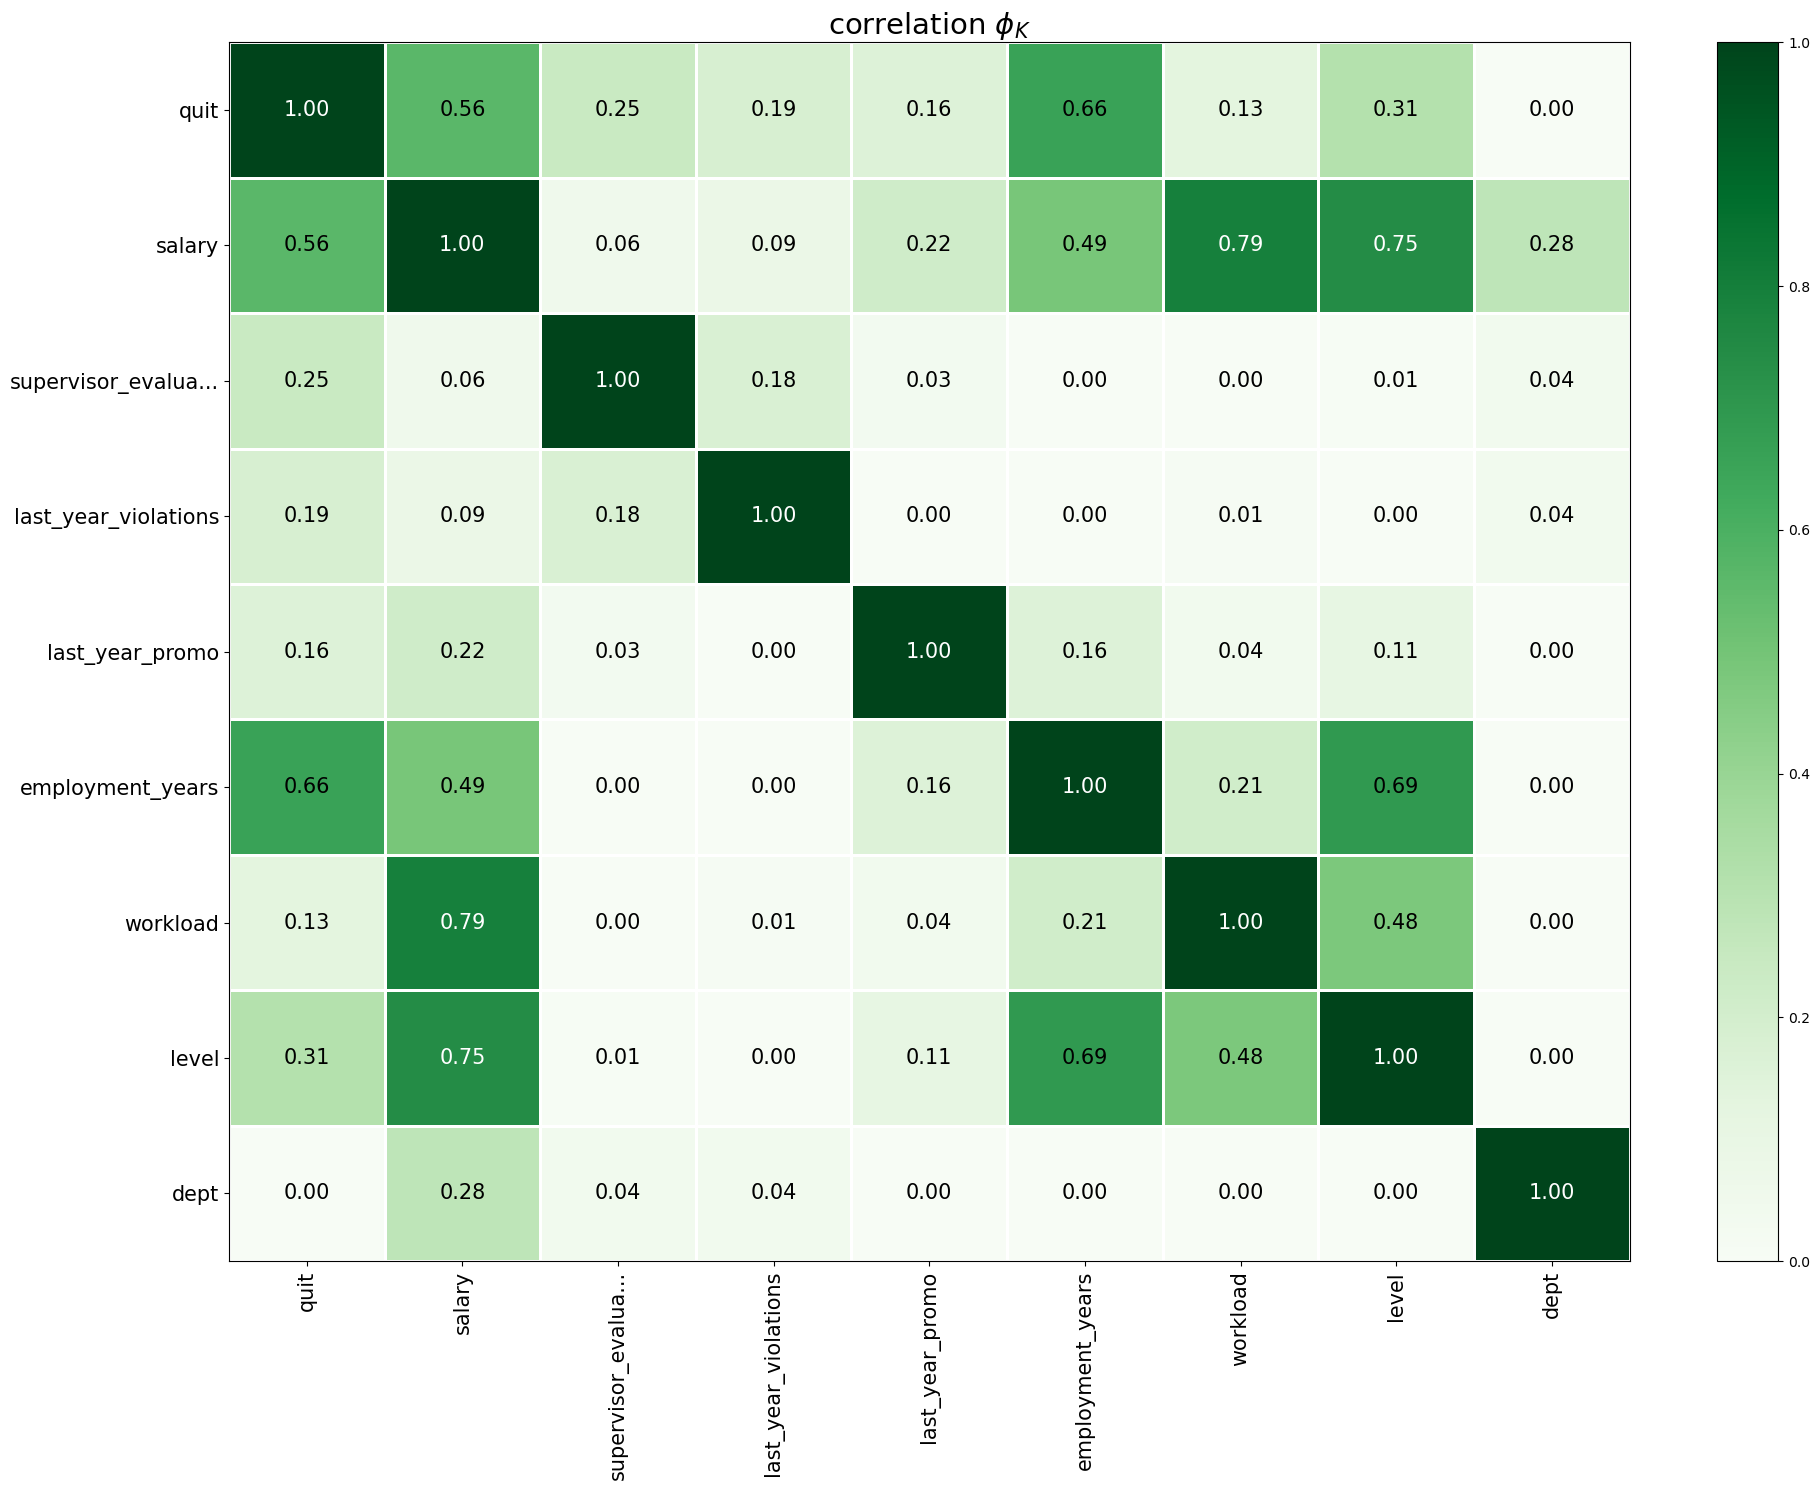

In [141]:
# построим матрицу корреляци между всеми признаками
plot_correlation_matrix(
    phik_overview_3.values,
    x_labels=phik_overview_3.columns,
    y_labels=phik_overview_3.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
)

- мультиколлинеарности не наблюдается;
- чем больше уровень занимаемой должности и больше нагрузка, тем зарпалата выше;
- чем больше уровень занимаемой должности тем длительность работы в компании выше;
- на целевой признак больше всех влиюят признаки `salary` и `employment_years`

### Портрет "уволившегося сотрудника"

In [144]:
# воспользуемся готовой функций для построения гистрограмм и диаграмм размаха для разных групп 
def build_histogram_boxplot_3(dataset, column):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    plt.title(f'Гистограмма для "{column}"')
    sns.histplot(data=dataset, x=column, hue='quit')
    plt.xlabel(f'Значение параметра "{column}"')
    plt.ylabel('Частота')
    
    plt.subplot(1, 2, 2)
    plt.title(f'Диаграмма размаха для "{column}"')
    sns.boxplot(x='quit', y=column, data=dataset);
    plt.ylabel(f'Значение параметра "{column}"')

In [145]:
# создадим функцию для построения круговой диаграммы с учётом 2 групп
def build_pie_3(data, name_column):
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(f'Признак {name_column}', y=0.98, x = 1)
    plt.subplots_adjust(wspace=0.5, hspace=0.5, right = 2)
    
    ax1.set_title('не уволился')
    ax1.pie(data.query('quit == "no"')[name_column].value_counts(), 
            labels = data[name_column].value_counts().index,
            autopct='%1.1f%%'
           )
    
    
    ax2.set_title('уволился')
    ax2.pie(data.query('quit == "yes"')[name_column].value_counts(), 
            labels = data[name_column].value_counts().index,
            autopct='%1.1f%%'
           )
    
    
    plt.show()

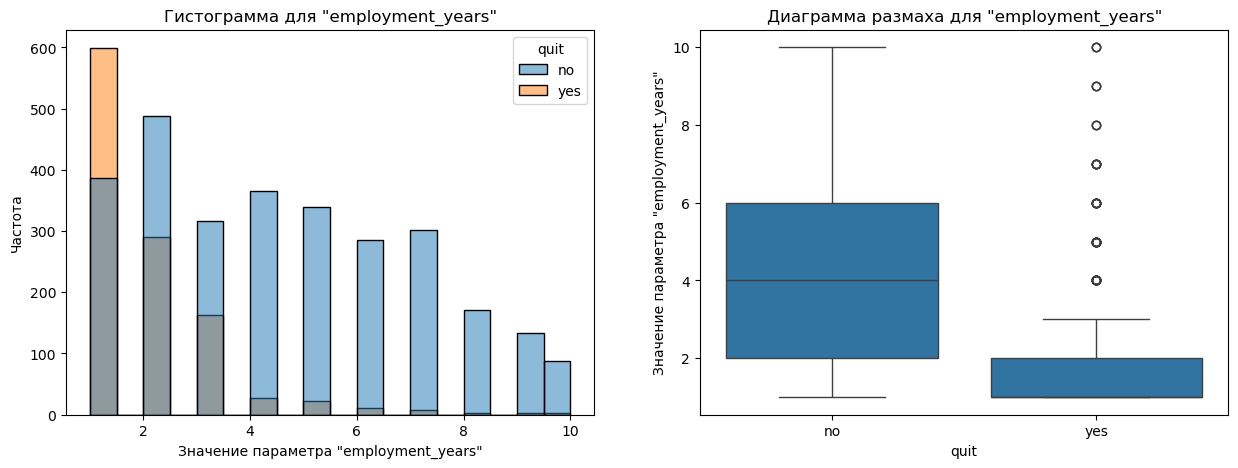

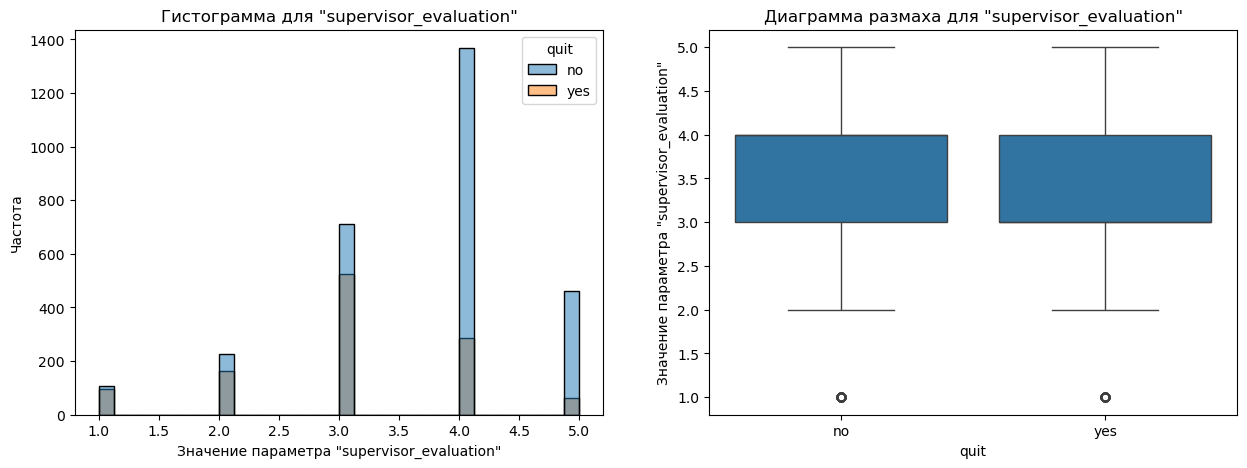

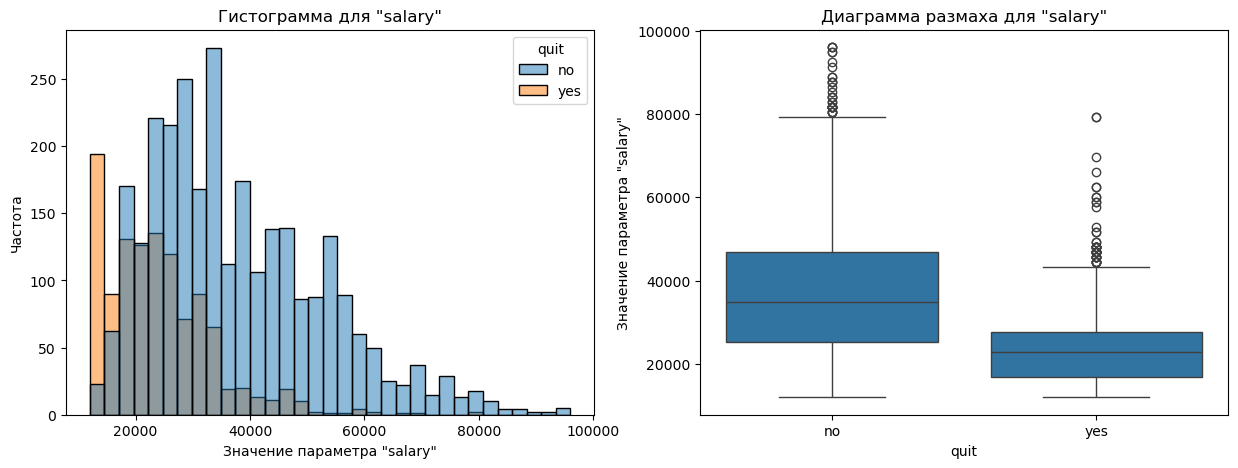

In [146]:
# вывозовим функции для построения графиков с количественными признаками 
for name in ['employment_years', 'supervisor_evaluation', 'salary']:
    build_histogram_boxplot_3(train_quit, name)
    plt.show()

- уволившиеся сотрудники в среднем на одного человека проработали всего лишь 1 год;
- по значению оценки за качество работы нет каких то особых различий у тех кто уволился и остался;
- кто остался работать, у них ежемесячная зарплата в среднем на одного человека выше (34800 рублей), а кто уволился у них зарплата в среднем = 22800 рублей. 

In [148]:
# создадим новую переменную и сохраним в ней кол-во уволенных и неуволенных сотрудников с разной загруженностью
workload_count_quit = (
    train_quit.pivot_table(index = 'workload', values = 'quit', aggfunc = 'count').\
    join(train_quit.query('quit == "no"').pivot_table(index = 'workload', values = 'quit', aggfunc = 'count'), rsuffix='_no').\
    join(train_quit.query('quit == "yes"').pivot_table(index = 'workload', values = 'quit', aggfunc = 'count'), rsuffix='_yes')
)

In [149]:
# создадим новую переменную и сохраним в ней кол-во уволенных и неуволенных сотрудников с разным уровнем должностей
level_count_quit = (
    train_quit.pivot_table(index = 'level', values = 'quit', aggfunc = 'count').\
    join(train_quit.query('quit == "no"').pivot_table(index = 'level', values = 'quit', aggfunc = 'count'), rsuffix='_no').\
    join(train_quit.query('quit == "yes"').pivot_table(index = 'level', values = 'quit', aggfunc = 'count'), rsuffix='_yes')
)


In [150]:
# создадим новую переменную и сохраним в ней кол-во уволенных и неуволенных сотрудников в разных отделах
dept_count_quit = (
    train_quit.pivot_table(index = 'dept', values = 'quit', aggfunc = 'count').\
    join(train_quit.query('quit == "no"').pivot_table(index = 'dept', values = 'quit', aggfunc = 'count'), rsuffix='_no').\
    join(train_quit.query('quit == "yes"').pivot_table(index = 'dept', values = 'quit', aggfunc = 'count'), rsuffix='_yes')
)


In [151]:
# создадим новую переменную и сохраним в ней кол-во уволенных и неуволенных сотрудников в разных отделах
violations_count_quit = (
    train_quit.pivot_table(index = 'last_year_violations', values = 'quit', aggfunc = 'count').\
    join(train_quit.query('quit == "no"').pivot_table(index = 'last_year_violations', values = 'quit', aggfunc = 'count'), rsuffix='_no').\
    join(train_quit.query('quit == "yes"').pivot_table(index = 'last_year_violations', values = 'quit', aggfunc = 'count'), rsuffix='_yes')
)


In [152]:
# создадим новую переменную и сохраним в ней кол-во уволенных и неуволенных сотрудников с повышением и без него
promo_count_quit = (
    train_quit.pivot_table(index = 'last_year_promo', values = 'quit', aggfunc = 'count').\
    join(train_quit.query('quit == "no"').pivot_table(index = 'last_year_promo', values = 'quit', aggfunc = 'count'), rsuffix='_no').\
    join(train_quit.query('quit == "yes"').pivot_table(index = 'last_year_promo', values = 'quit', aggfunc = 'count'), rsuffix='_yes')
)

In [153]:
# создадим новый столбец, который покажет процент ушедших работников с повышением и без него
promo_count_quit['fraction_dismiss'] = round((promo_count_quit['quit_yes'] / promo_count_quit['quit'])*100, 2)
promo_count_quit['fraction_no_dismiss'] = round((promo_count_quit['quit_no'] / promo_count_quit['quit'])*100, 2)

In [154]:
# создадим новый столбец, который покажет процент ушедших работников c нарушением трудового договора
violations_count_quit['fraction_dismiss'] = round((violations_count_quit['quit_yes'] / violations_count_quit['quit'])*100, 2)
violations_count_quit['fraction_no_dismiss'] = round((violations_count_quit['quit_no'] / violations_count_quit['quit'])*100, 2)

In [155]:
# создадим новый столбец, который покажет процент ушедших работников с разным уровнем должностей
level_count_quit['fraction_dismiss'] = round((level_count_quit['quit_yes'] / level_count_quit['quit'])*100, 2)

In [156]:
# создадим новый столбец, который покажет процент ушедших работников с разной загруженностью
workload_count_quit['fraction_dismiss'] = round((workload_count_quit['quit_yes'] / workload_count_quit['quit'])*100, 2)
workload_count_quit['fraction_no_dismiss'] = round((workload_count_quit['quit_no'] / workload_count_quit['quit'])*100, 2)

In [157]:
# создадим новый столбец, который покажет процент ушедших работников из разных отделов
dept_count_quit['fraction_dismiss'] = round((dept_count_quit['quit_yes'] / dept_count_quit['quit'])*100, 2)

In [158]:
promo_count_quit

quit  quit_no  quit_yes  fraction_dismiss  \
last_year_promo                                              
no               3887     2760      1127             28.99   
yes               113      112         1              0.88   

                 fraction_no_dismiss  
last_year_promo                       
no                             71.01  
yes                            99.12

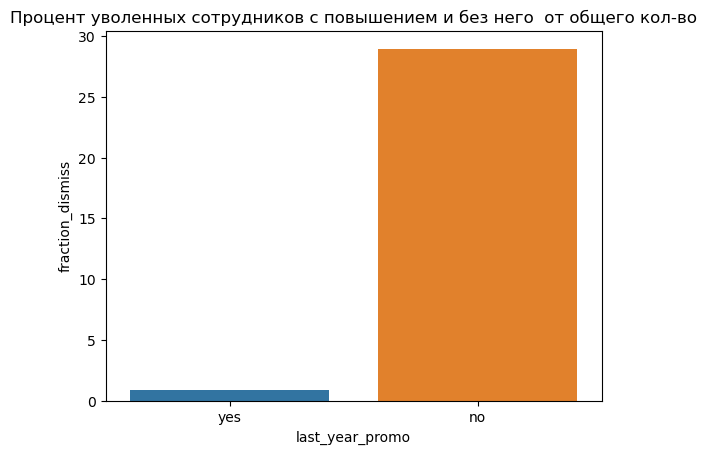

In [159]:
# отобразим на столбчатой диаграмме процент уволенных сотрудников с разнымыми занимаемыми должностями
sns.barplot(promo_count_quit.reset_index().sort_values(by = 'fraction_dismiss'), 
            x = 'last_year_promo', 
            y = 'fraction_dismiss', 
            hue = 'last_year_promo'
           )
plt.title('Процент уволенных сотрудников с повышением и без него  от общего кол-во')
plt.show()

Из всех сотрудников которых повышали за последний год, уволился только 1 человек.

Из сотрдуников которые не имели повышения, уволилось 28.99%.

В целом видно тенденцию, что сотрудник с повышеним с большей вероятностью останется в компании.


In [161]:
violations_count_quit

quit  quit_no  quit_yes  fraction_dismiss  \
last_year_violations                                              
no                    3455     2555       900             26.05   
yes                    545      317       228             41.83   

                      fraction_no_dismiss  
last_year_violations                       
no                                  73.95  
yes                                 58.17

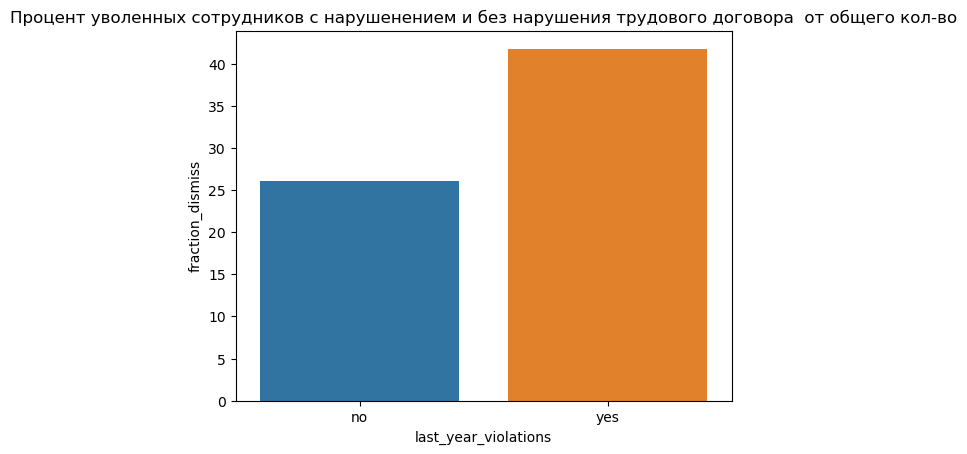

In [162]:
# отобразим на столбчатой диаграмме процент уволенных сотрудников с разнымыми занимаемыми должностями
sns.barplot(violations_count_quit.reset_index().sort_values(by = 'fraction_dismiss'), 
            x = 'last_year_violations', 
            y = 'fraction_dismiss', 
            hue = 'last_year_violations'
           )
plt.title('Процент уволенных сотрудников с нарушенением и без нарушения трудового договора  от общего кол-во')
plt.show()

Из тех кто нарушал трудовой договор практически половина(41.83%) уволилась.

Из тех кто не нарушал трудовой договор уволилось лишь 26.05%.

То есть все-таки есть склонность к уволнению у тех кто нарушает трудвой договор.

In [164]:
level_count_quit

quit  quit_no  quit_yes  fraction_dismiss
level                                            
junior  1949      946      1003             51.46
middle  1694     1586       108              6.38
sinior   357      340        17              4.76

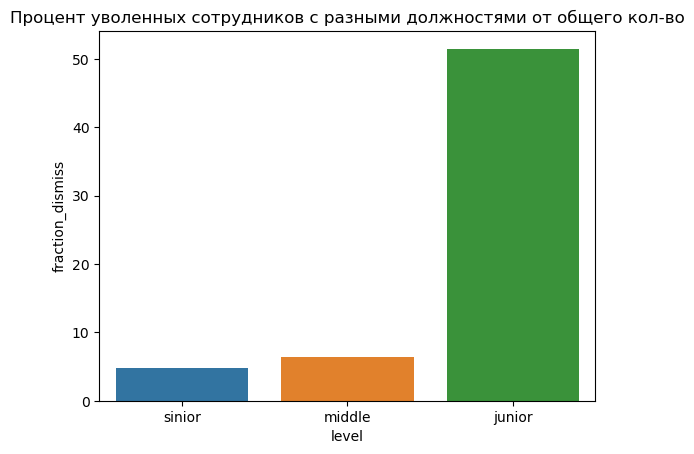

In [165]:
# отобразим на столбчатой диаграмме процент уволенных сотрудников с разнымыми занимаемыми должностями
sns.barplot(level_count_quit.reset_index().sort_values(by = 'fraction_dismiss'), x = 'level', y = 'fraction_dismiss', hue = 'level')
plt.title('Процент уволенных сотрудников c разными должностями от общего кол-во')
plt.show()

Больше всех уволили джунов, от них может быть не так много пользы, а вот почему уволились более опытные специалисты это интересно. 

Посмторим, что было по зарпалате  у уволенных sinior.

In [167]:
train_quit.query('(quit == "no") and (level == "sinior")').pivot_table(index = 'dept', values = 'salary', aggfunc = ['median', 'count'])

median  count
             salary salary
dept                      
hr          61200.0     40
marketing   68400.0     49
purchasing  56400.0     58
sales       56400.0    115
technology  64800.0     78

In [168]:
train_quit.query('(quit == "yes") and (level == "sinior")').pivot_table(index = 'dept', values = 'salary', aggfunc = ['median', 'count'])

median  count
             salary salary
dept                      
hr          60000.0      1
marketing   26400.0      1
purchasing  32400.0      6
sales       42600.0      4
technology  69600.0      5

Зарплата практически у всех уволенных sinior была меньше, кроме отдела technology. Здесь нужно гороздо больше информации, чтобы понять почему так получилось. Оставим это дело.

In [170]:
workload_count_quit

quit  quit_no  quit_yes  fraction_dismiss  fraction_no_dismiss
workload                                                                
high       674      553       121             17.95                82.05
low       1208      689       519             42.96                57.04
medium    2118     1630       488             23.04                76.96

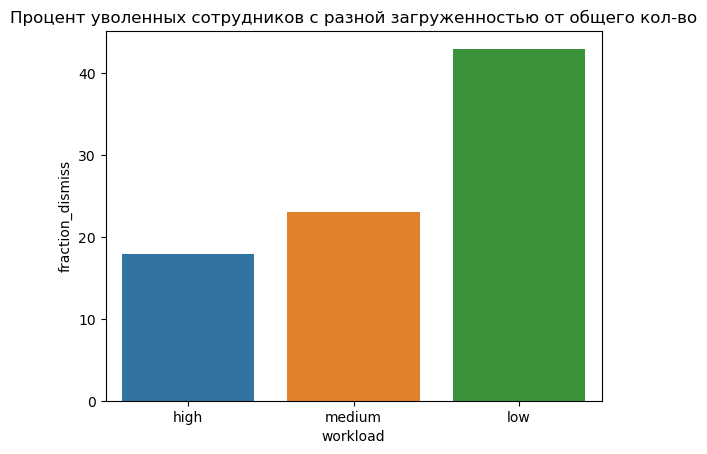

In [171]:
# отобразим на столбчатой диаграмме процент уволенных сотрудников с разной загруженностью
sns.barplot(workload_count_quit.reset_index().sort_values(by = 'fraction_dismiss'), x = 'workload', y = 'fraction_dismiss', hue = 'workload')
plt.title('Процент уволенных сотрудников с разной загруженностью от общего кол-во')
plt.show()

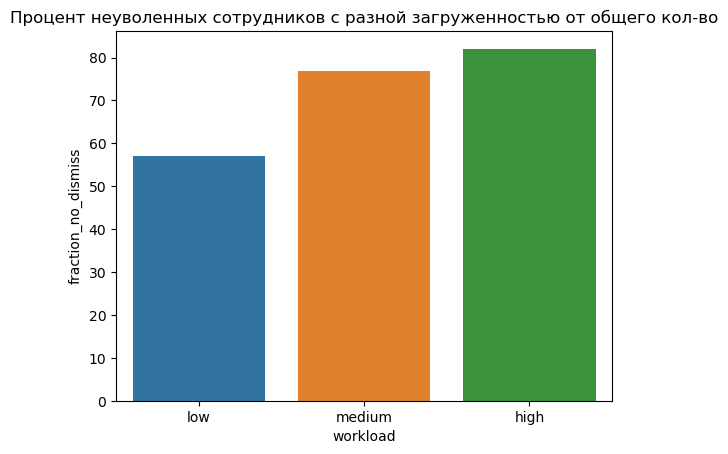

In [172]:
# отобразим на столбчатой диаграмме процент неуволенных сотрудников с разной загруженностью
sns.barplot(workload_count_quit.reset_index().sort_values(by = 'fraction_no_dismiss'), x = 'workload', y = 'fraction_no_dismiss', hue = 'workload')
plt.title('Процент неуволенных сотрудников с разной загруженностью от общего кол-во')
plt.show()

Больше всех уходит сотрудников с низкой загруженностью. 

Возможно это связано с тем, что сотрудник недавно устроился и занимал низкую должность, соответственно ему меньше давали трудной работы, и наверное меньше платили, что в совокупности повлияло на увольнение.

С высокой загружностью, возможно по-другому. Сотрудник уставал от интенсивной работы, "выгорел", зарплата не устраивала, мало личного времени, все в совокупности могло сказаться на психическом здоровье или просто здоровье, из за чего человек уволился. 

У тех кто продолжает работать ситуция обратная. По графику видно, что доля сотрудникой с низкой загруженностью самая маленькая, самая большая доля с высокой загружностью.

In [174]:
dept_count_quit

quit  quit_no  quit_yes  fraction_dismiss
dept                                                 
hr           464      348       116             25.00
marketing    582      419       163             28.01
purchasing   588      422       166             28.23
sales       1438     1031       407             28.30
technology   928      652       276             29.74

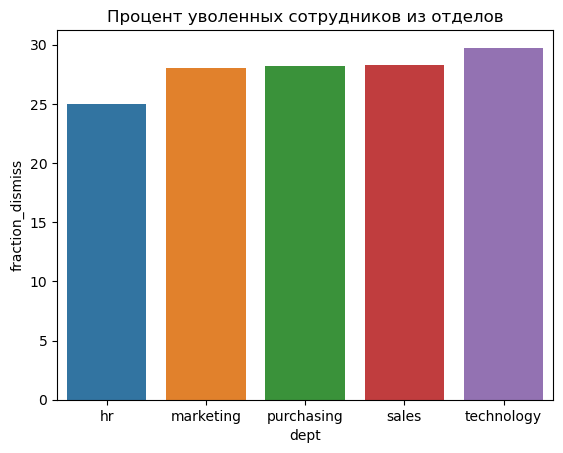

In [175]:
# отобразим на столбчатой диаграмме процент уволенных сотрудников из отделов
sns.barplot(dept_count_quit.reset_index().sort_values(by = 'fraction_dismiss'), x = 'dept', y = 'fraction_dismiss', hue = 'dept')
plt.title('Процент уволенных сотрудников из отделов')
plt.show()

В целом из всех отделов доля уволившихся примерно равна и здесь нет какой-то выделяющийся тенденции самого популярного отдела по увольнениям. Но обратить внимание на отдела hr и technology все-таки стоит.

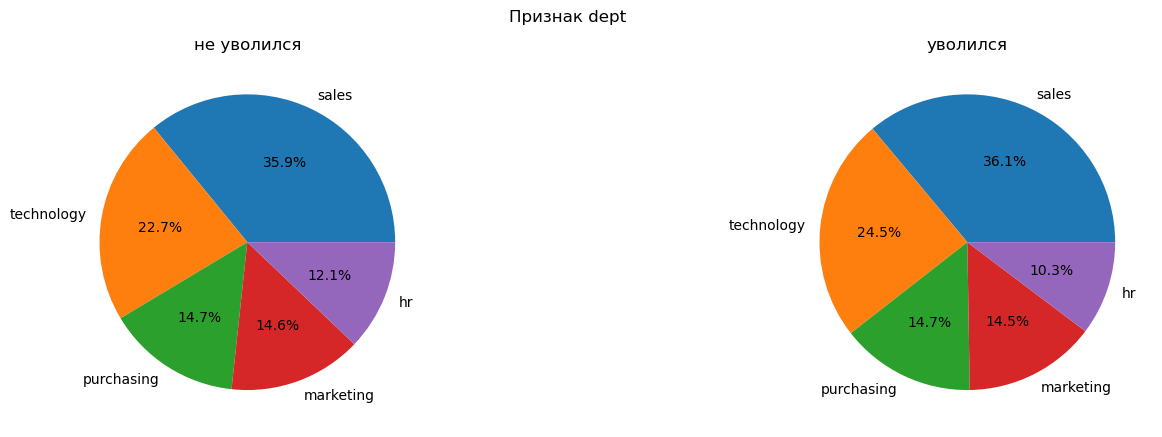

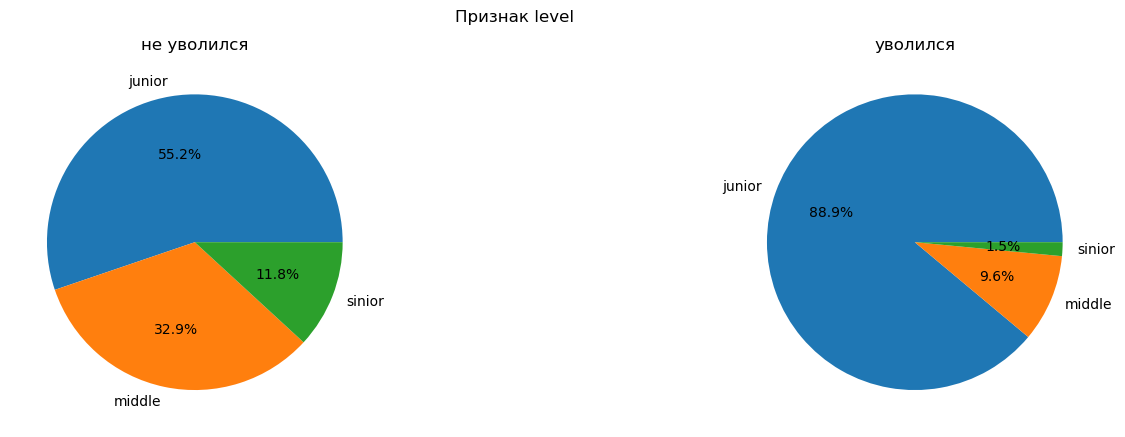

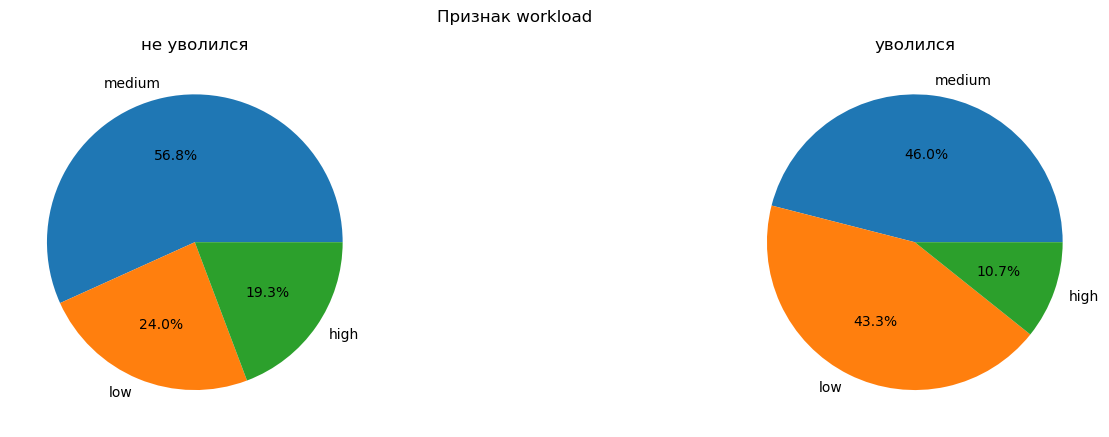

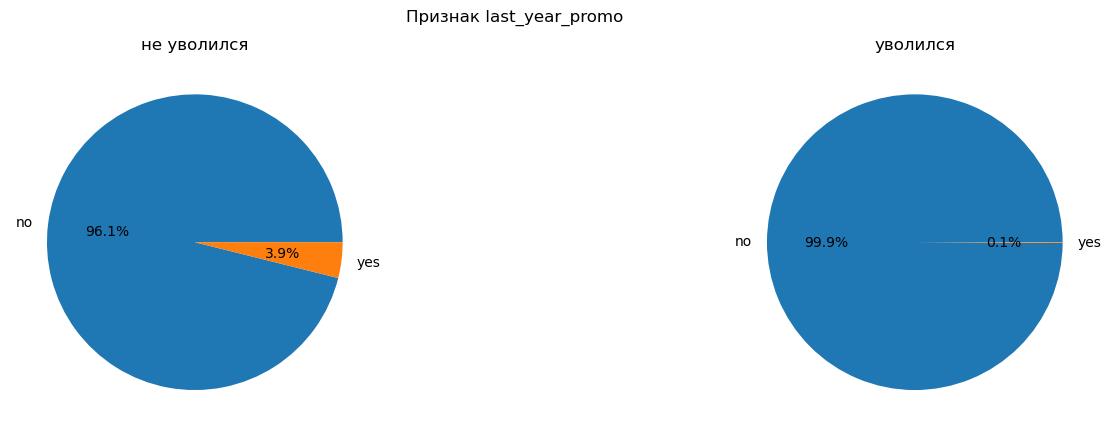

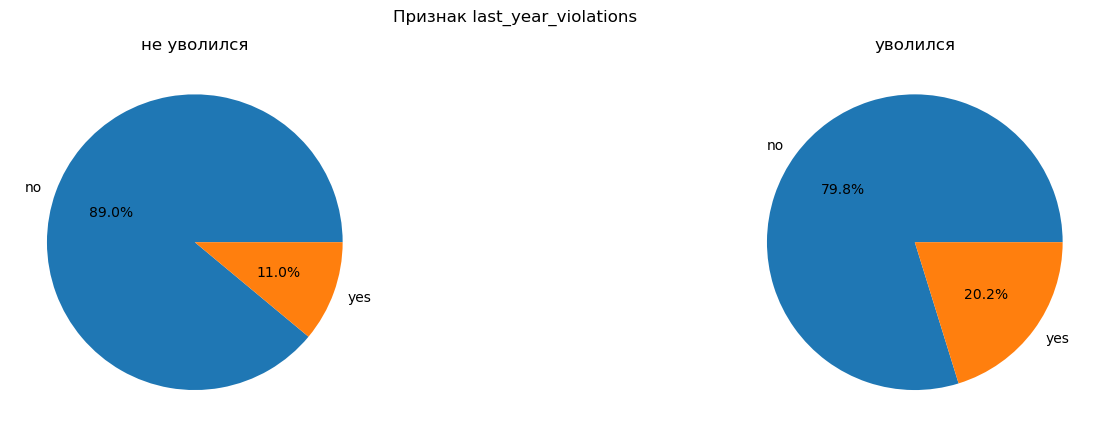

In [177]:
# вызовем функцию для построение круговых диаграм категориальных признаков 2 групп
for name in ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations']:
    build_pie_3(train_quit, name)

- по отделам нет особой разницы;
- среди уволившихся 88.9% джунов;
- по нагрузке примерно одинаково;
- повышения за последний год у уволившихся практически нет;
- среди уволившихся больше нарушителй трудового договора.

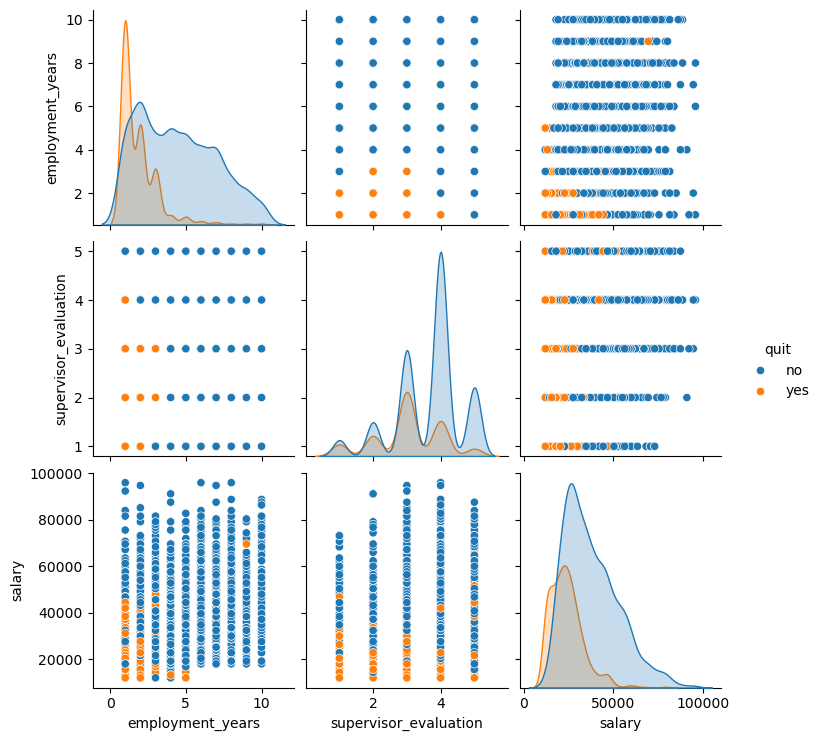

In [179]:
# построим матрицу диаграмм рассиения и оценим связь между признаками для двух групп
sns.pairplot(train_quit[['employment_years', 'supervisor_evaluation', 'salary', 'quit']], hue='quit')
plt.show()

В итоге у нас получилось картина уволившегося сотрудника:
- в среднем проработал всего лишь 1 год;
- ежемесячная зарплата в среднем на 12000 рублей меньше;
- в основои имел низкий уровень загруженности;
- 88.9% из них это джуны, 9.6% - middle, 1.5% - sinior;
- больше всех уволилось из отдела technology, меньше всех из отдела hr.
- у уволенных sinior зарплата по всем отделам меньше чем у неуволенных, кроме отдела technology;
- из сотрудников которые нарушали трудовой договор 41.83% уволились.
- сотрудник с повышеним с большей вероятностью останется в компании.

### Влияние уровня удовлетворенности на увольнение сотрудника

In [182]:
test_satisfaction_quit = test_df.copy()

In [183]:
test_satisfaction_quit = test_satisfaction_quit.merge(test_target_quit, on = 'id', how = 'left')

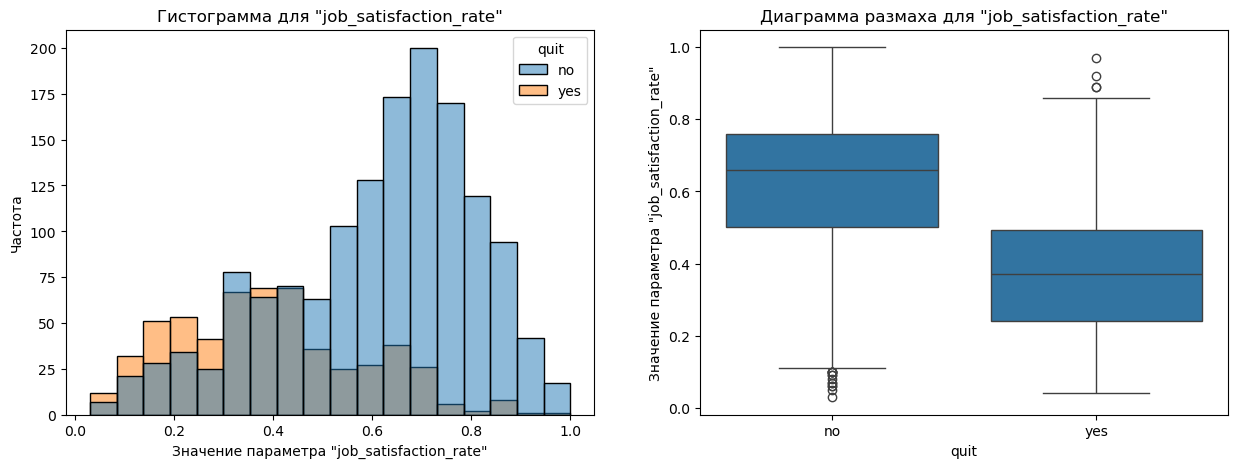

In [184]:
build_histogram_boxplot_3(test_satisfaction_quit, 'job_satisfaction_rate')

По графику видно, что медианное значение `job_satisfaction_rate` равное 0.66 выше у сотрудников,которые не уволилсь. 

У уволившихся сотрудников медианное значение `job_satisfaction_rate` равно 0.37.

В целом можно сказать, что чем выше удовлетворенность, тем сотрудник выроятней не уволится, но попадаются исключения. Так как модель не совершенна, то вполне вероятно, что выбросы образовались как раз из недостаточно точного предсказания моделью удовлетвореннотси сотрдуника.

Проверим гипотезу:

Нулевая гипотеза: Не существует статистически значимой разницы в среднем уровне удовлетворенности работой (job_satisfaction_rate) между генеральными совокупностями уволившихся и оставшихся сотрудников”

Альтеранативная гипотеза: Средние значение признака `job_satisfaction_rate` группы 'не уволен' больше среднего значения группы'уволен'


In [186]:
# задаём уровень значимости
alpha = 0.01

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(test_satisfaction_quit.query('quit == "no"')['job_satisfaction_rate'], 
                       test_satisfaction_quit.query('quit == "yes"')['job_satisfaction_rate'], 
                       alternative='greater'
                      )

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 6.155610332585965e-105
Отвергаем нулевую гипотезу


In [187]:
test_satisfaction_quit.query('(job_satisfaction_rate < 0.2) and (quit == "no")').head()

id        dept   level workload  employment_years last_year_promo  \
13   252146   marketing  middle      low                 7              no   
81   540012  technology  middle   medium                 4              no   
84   572293  technology  middle   medium                 2              no   
115  793330       sales  middle   medium                 1              no   
158  985048       sales  middle     high                 7              no   

    last_year_violations  supervisor_evaluation  salary  \
13                   yes                      1   19200   
81                   yes                      2   38400   
84                    no                      2   38400   
115                  yes                      2   31200   
158                  yes                      3   50400   

     job_satisfaction_rate quit  
13                    0.12   no  
81                    0.07   no  
84                    0.19   no  
115                   0.03   no  
158                   0.17   no

Подозрительные сотрудники, не совсем понятно что с ними делать, впринципе их не так много, можно удалить. Возможно сотрудники и вправду не довольны своей работой, но уволиться они не могут из-за отсутсвия запасной работы, либо весит кредит, может ждут отпуска и потом уволяться или из за погрешности модели, она предсказала не верную удовлетворенность. Такие случаи возомжны, оставим как есть, если модель предскажет плохие рельтаты попробуем их удалить.

In [189]:
test_satisfaction_quit.query('(job_satisfaction_rate > 0.8) and (quit == "yes")')

id        dept   level workload  employment_years last_year_promo  \
304   175114  technology  senior   medium                 9              no   
371   445909  technology  middle   medium                 6             yes   
626   555220          hr  middle   medium                 7              no   
954   638382       sales  junior   medium                 2              no   
1007  736957       sales  senior   medium                10              no   
1193  287085       sales  junior      low                 2              no   
1308  914306  technology  middle   medium                 7              no   
1363  144290       sales  senior      low                 9              no   
1415  390686       sales  middle     high                 9              no   
1681  836952       sales  senior     high                 8             yes   
1805  948968   marketing  junior   medium                 2              no   

     last_year_violations  supervisor_evaluation  salary  \
304                    no                      5   72000   
371                    no                      5   50400   
626                    no                      4   40800   
954                    no                      5   27600   
1007                   no                      5   54000   
1193                   no                      5   15600   
1308                   no                      4   46800   
1363                   no                      4   32400   
1415                   no                      5   57600   
1681                   no                      4   64800   
1805                   no                      4   32400   

      job_satisfaction_rate quit  
304                    0.86  yes  
371                    0.97  yes  
626                    0.84  yes  
954                    0.85  yes  
1007                   0.89  yes  
1193                   0.92  yes  
1308                   0.82  yes  
1363                   0.84  yes  
1415                   0.84  yes  
1681                   0.86  yes  
1805                   0.89  yes

Странная  ситуация, данные сотрдуники в освновном долго работают, у всех высокая оценка за качесто работы, некотрые даже имели повышения, никто из них не нарушал трудовой договор. Если не учитывать признак `job_satisfaction_rate`,вероятней их не устроила зарплата, так как по остальным признакам они не походят на тех кто хочет уволиться. 

В данном случае модель предсказала высокую удовлетворенность из-за того что у них высокая оценка за качество работы, а у модели из первой задачи как раз самый важный признак из всех это оценка за качество работы. Данные оставим, но если модель будет давать плохие результаты, удалим выбросы.

## Добавление нового входного признака

Добавим  `job_satisfaction_rate`, предсказанный лучшей моделью первой задачи, к входным признакам второй задачи.

In [193]:
# сохраним в новую переменную тренировочные данные для добавления нового признака
train_quit_satisfaction = train_quit.copy()

In [194]:
# с помощью лучшей обученной модели из первой задачи добавим признак job_satisfaction_rate' в новые тренировочные данные
train_quit_satisfaction['job_satisfaction_rate'] = randomized_treeclass.best_estimator_.predict(train_quit_satisfaction)

In [195]:
train_quit_satisfaction.head()

id        dept   level workload  employment_years last_year_promo  \
0  723290       sales  middle     high                 2              no   
1  814010       sales  junior   medium                 2              no   
2  155091  purchasing  middle   medium                 5              no   
3  257132       sales  junior   medium                 2              no   
4  910140   marketing  junior   medium                 2              no   

  last_year_violations  supervisor_evaluation  salary quit  \
0                   no                      4   54000   no   
1                   no                      4   27600   no   
2                   no                      1   37200   no   
3                  yes                      3   24000  yes   
4                   no                      5   25200   no   

   job_satisfaction_rate  
0               0.602105  
1               0.837297  
2               0.402143  
3               0.333750  
4               0.813636

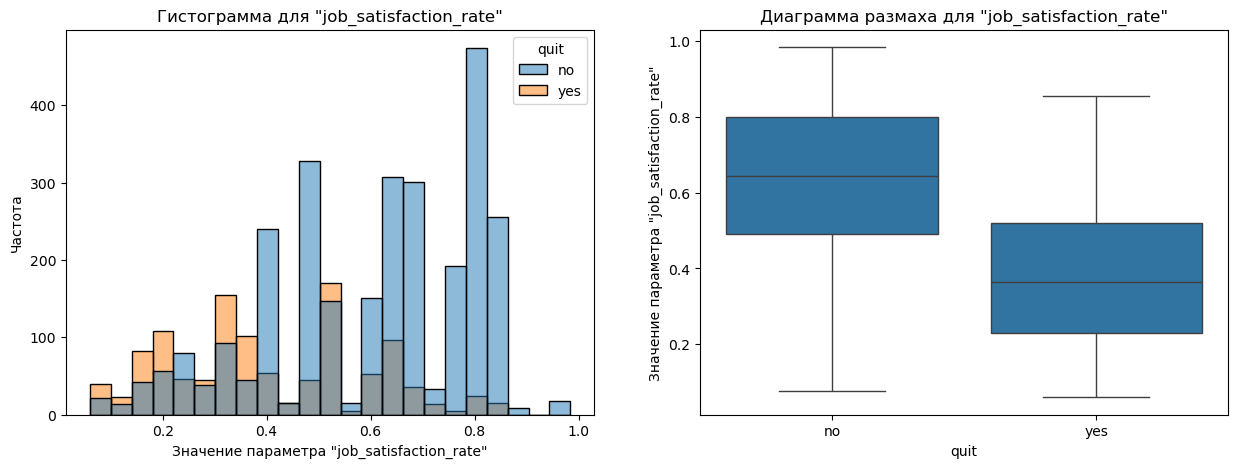

In [196]:
build_histogram_boxplot_3(train_quit_satisfaction, 'job_satisfaction_rate')

In [197]:
# воспользуемся методом phik_matrix для определения корреляции количественных и категориальных признаков
phik_overview_4 = phik_matrix(train_quit_satisfaction.drop(columns = 'id'), 
                            interval_cols= list(train_quit_satisfaction.select_dtypes(include = 'number').columns)
                           )

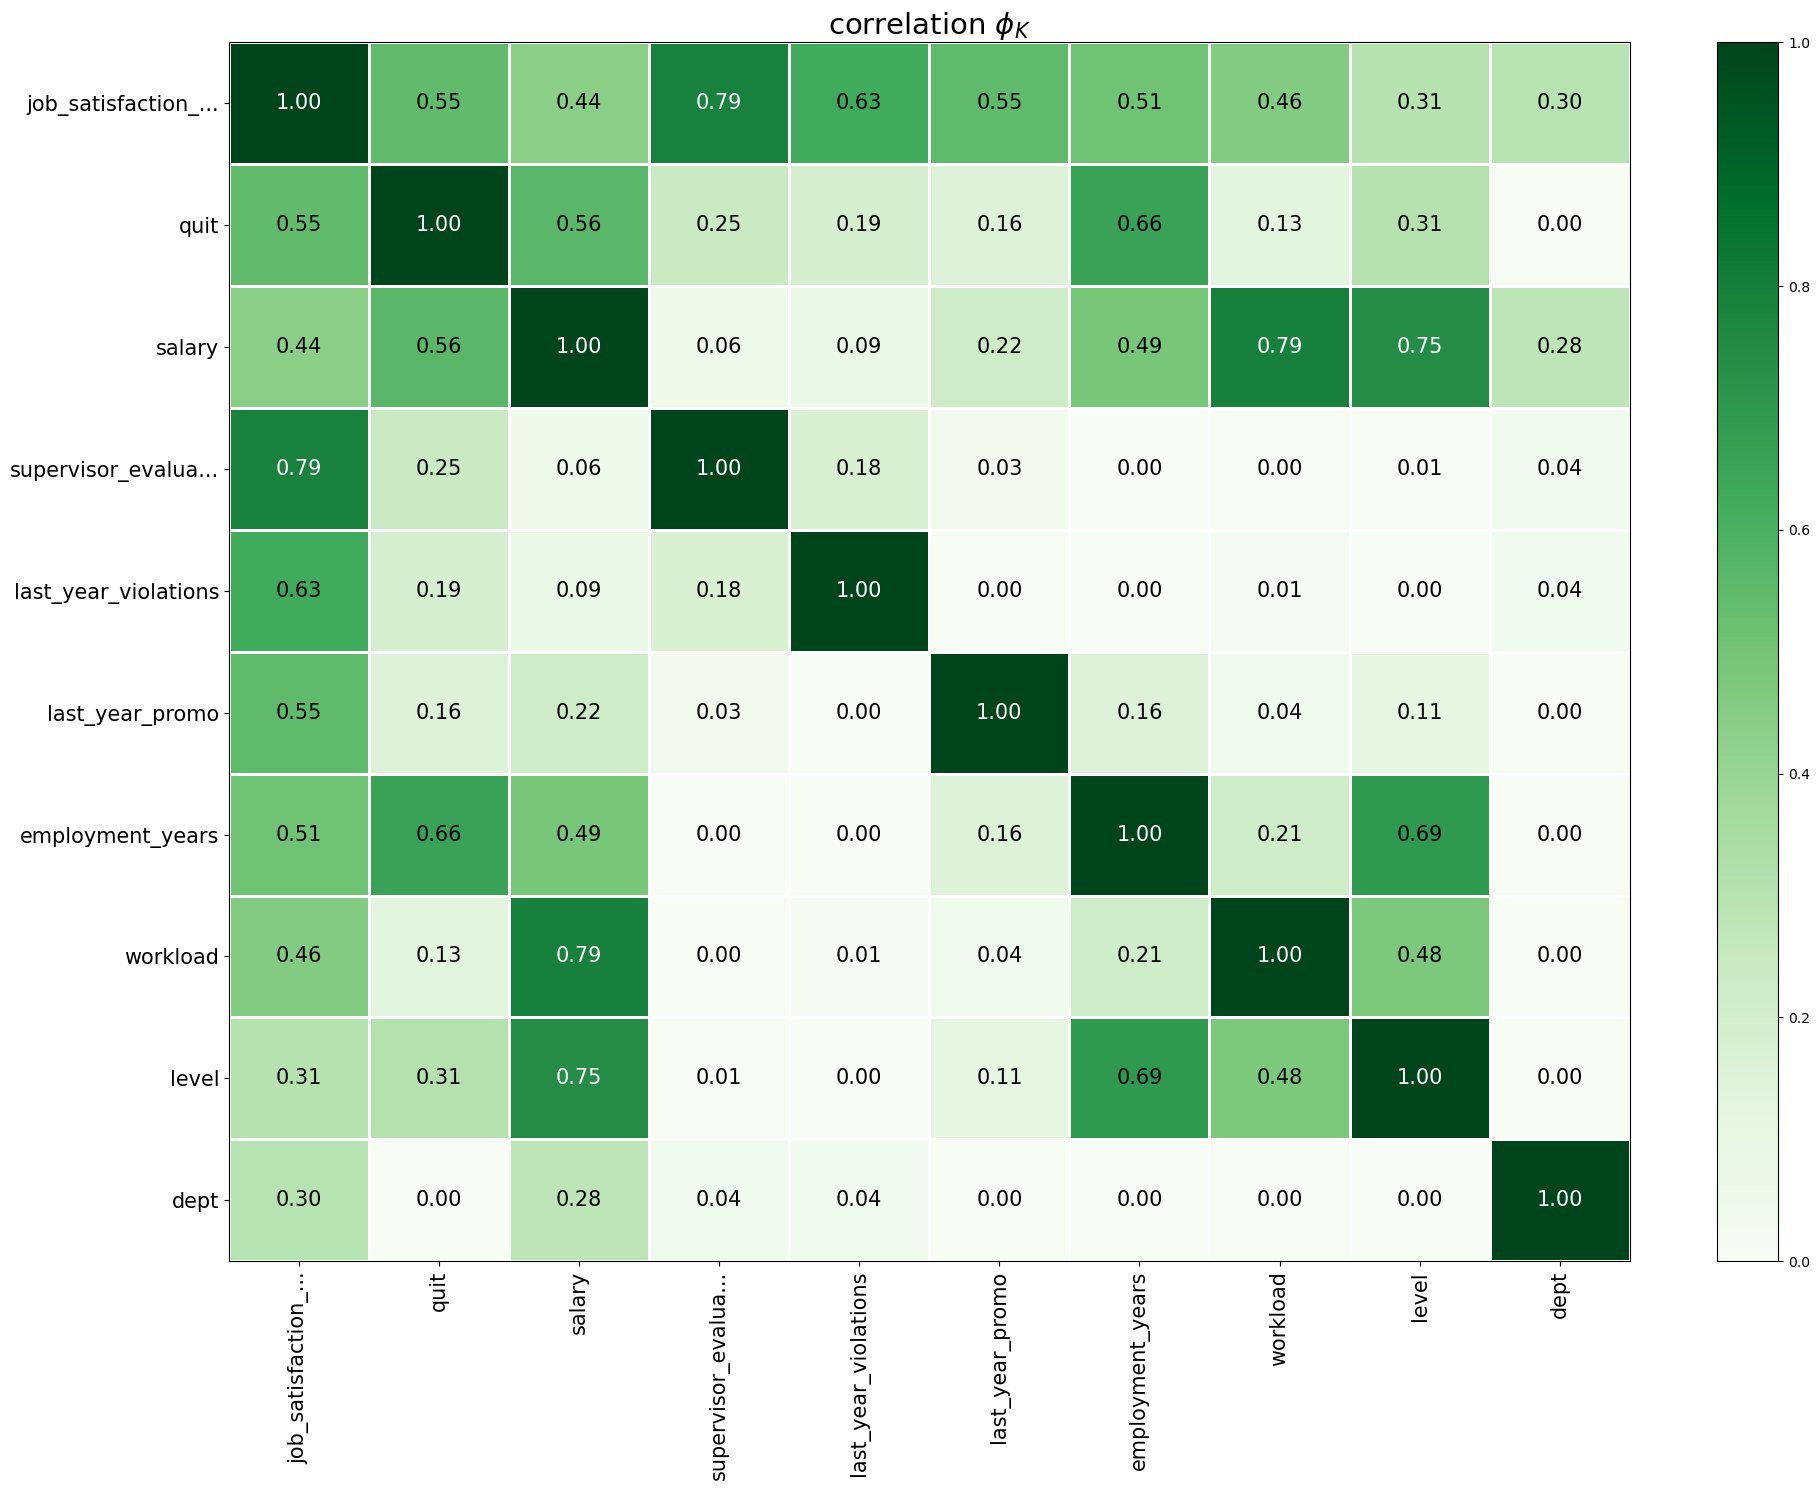

In [198]:
# построим матрицу корреляци между всеми признаками
plot_correlation_matrix(
    phik_overview_4.values,
    x_labels=phik_overview_4.columns,
    y_labels=phik_overview_4.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
)

Выбросов не обнаружено, по мединному значению те кто уволился имеют удовлетворенность 0.36, кто не уволился 0.64. В целом наблюадется закономерность как и на тествоых данных.

Мультиколлинеарнотсь не наблюдается.

## Подготовка данных

Подготовим признаки так же, как и в первой задаче: выполним подготовку в пайплайне. При кодировании будем использовать как минимум два кодировщика.

In [202]:
# сохраним тренировочные и тестовые данные в новые переменные
X_train_2 = train_quit_satisfaction.copy().set_index('id').drop_duplicates().drop(['quit'], axis = 1)
y_train_2 = train_quit_satisfaction.copy().set_index('id').drop_duplicates()['quit']
X_test_2 = test_satisfaction_quit.copy().set_index('id').drop_duplicates().drop(['quit'], axis = 1)
y_test_2 = test_satisfaction_quit.copy().set_index('id').drop_duplicates()['quit']

label_encoder = LabelEncoder()

# обучим модель и трансформируем тренировочную выборку 
y_train_2 = label_encoder.fit_transform(y_train_2)

# трансформируем тестовую выборку
y_test_2 = label_encoder.transform(y_test_2)

# создадим экземпляр класса RandomOverSampler с фиксированным random_state
sampler = RandomOverSampler(random_state=RANDOM_STATE)

# создаём списки с названиями признаков
ohe_columns_2 = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns_2 = ['level', 'workload']
num_columns_2 = ['employment_years', 'salary', 'job_satisfaction_rate', 'supervisor_evaluation']


# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe_2 = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop = 'first', handle_unknown='ignore', sparse_output=False))
    ]
    )

# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe_2 = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'senior'],
                    ['low', 'medium', 'high'], 
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

# создаём общий пайплайн для подготовки данных
data_preprocessor_2 = ColumnTransformer(
    [('ohe', ohe_pipe_2, ohe_columns_2),
     ('ord', ord_pipe_2, ord_columns_2),
     ('num', StandardScaler(), num_columns_2),
    ], 
    remainder='passthrough'
)

In [203]:
X_train_p = pd.DataFrame(
    data_preprocessor_2.fit_transform(X_train_2),
    columns=data_preprocessor_2.get_feature_names_out()
)

In [204]:
X_train_p.head()

ohe__dept_marketing  ohe__dept_purchasing  ohe__dept_sales  \
0                  0.0                   0.0              1.0   
1                  0.0                   0.0              1.0   
2                  0.0                   1.0              0.0   
3                  0.0                   0.0              1.0   
4                  1.0                   0.0              0.0   

   ohe__dept_technology  ohe__last_year_promo_yes  \
0                   0.0                       0.0   
1                   0.0                       0.0   
2                   0.0                       0.0   
3                   0.0                       0.0   
4                   0.0                       0.0   

   ohe__last_year_violations_yes  ord__level  ord__workload  \
0                            0.0         1.0            2.0   
1                            0.0         0.0            1.0   
2                            0.0         1.0            1.0   
3                            1.0         0.0            1.0   
4                            0.0         0.0            1.0   

   num__employment_years  num__salary  num__job_satisfaction_rate  \
0              -0.851101     1.038618                    0.325430   
1              -0.851101    -0.584578                    1.407054   
2               0.302478     0.005676                   -0.594177   
3              -0.851101    -0.805922                   -0.908709   
4              -0.851101    -0.732141                    1.298240   

   num__supervisor_evaluation  
0                    0.585172  
1                    0.585172  
2                   -2.192517  
3                   -0.340724  
4                    1.511068

In [205]:
y_train_2.shape

(2587,)

In [206]:
X_test_p = pd.DataFrame(
    data_preprocessor_2.fit_transform(X_test_2),
    columns=data_preprocessor_2.get_feature_names_out()
)

In [207]:
X_test_p.head()

ohe__dept_hr  ohe__dept_marketing  ohe__dept_purchasing  ohe__dept_sales  \
0           0.0                  1.0                   0.0              0.0   
1           1.0                  0.0                   0.0              0.0   
2           0.0                  0.0                   0.0              1.0   
3           0.0                  0.0                   0.0              1.0   
4           1.0                  0.0                   0.0              0.0   

   ohe__dept_technology  ohe__last_year_promo_yes  \
0                   0.0                       0.0   
1                   0.0                       0.0   
2                   0.0                       0.0   
3                   0.0                       0.0   
4                   0.0                       0.0   

   ohe__last_year_violations_yes  ord__level  ord__workload  \
0                            0.0         0.0            1.0   
1                            0.0         0.0            1.0   
2                            0.0         1.0            0.0   
3                            0.0         1.0            0.0   
4                            0.0         1.0            1.0   

   num__employment_years  num__salary  num__job_satisfaction_rate  \
0              -0.681269    -0.363449                    1.095328   
1              -1.074710    -0.286023                    0.778462   
2               0.499053    -0.982851                    0.416330   
3               0.892493    -0.982851                    0.235264   
4               0.499053     0.410804                    0.914262   

   num__supervisor_evaluation  
0                    1.477648  
1                    0.482561  
2                    0.482561  
3                    0.482561  
4                    1.477648

In [208]:
y_test_2.shape

(1926,)

Тренировочные и тествоые данные сохранили в переменные X_train, x_test, y_train, y_test. 

Данные закодировали и отмасштабировали методами OneHotEncoder(), OrdinalEncoder(), StandardScaler().

Пропуски и пустые значения обработали с помощью SimpleImputer(missing_values=np.nan, strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore'), OrdinalEncoder(handle_unknown='use_encoded_value')

## Обучение моделей

Обучим как минимум три модели. Как минимум для двух из них подберем гиперпараметры. Проверим качество лучшей модели. Критерий успеха: ROC-AUC ≥0.91 на тестовой выборке.

In [212]:
%%time
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final_2 = ImbPipeline([
    ('preprocessor', data_preprocessor),
    #('oversampling', sampler),  # Добавляем оверсэмплинг в pipeline
    ('feature_selection', SelectKBest(f_classif)),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])


param_grid_2 = [
    # словарь для модели RandomForestClassifier()
    {
        'models': [RandomForestClassifier(random_state=RANDOM_STATE, class_weight = 'balanced')],
        'models__max_depth': range(2, 7),
        'models__min_samples_split': range(2, 7),
        'models__min_samples_leaf': range(2, 7),
        'feature_selection__k': range(2, 10)
        #'models__max_features': range(2,6), 
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2,6),
        'feature_selection__k': range(2, 10)
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1,6),
        'feature_selection__k': range(2, 10)  
    }
]

randomized_search_2 = RandomizedSearchCV(
    pipe_final_2, 
    param_grid_2, 
    cv=5,
    n_iter = 20,
    scoring=['accuracy', 'roc_auc', 'f1'],
    refit = 'roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbose = 3
)
randomized_search_2.fit(X_train_2, y_train_2)

print('Лучшая модель и её параметры:\n\n', randomized_search_2.best_estimator_)
print ('Метрика roc_auc для лучшей обученной модели:', randomized_search_2.best_score_)

y_test_pred_2 = randomized_search_2.predict(X_test_2)
y_test_proba_2 = randomized_search_2.predict_proba(X_test_2)

print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test_2, y_test_proba_2[:,1])}')
print(f'Метрика accuracy на тестовой выборке: {accuracy_score(y_test_2, y_test_pred_2)}')
print('Метрика f1 на тестовой выборке', f1_score(y_test_2, y_test_pred_2))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept',
                                                   'last_year_violations',
                                            

C:\Users\кц\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\кц\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [213]:
# посмотрим топ 5 моделей с лучшими результатами метрик
pd.DataFrame(randomized_search_2.cv_results_).sort_values(by = 'rank_test_roc_auc').head(5)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
4        0.573842      0.047763         0.136011        0.025259   
16       0.650248      0.088392         0.143012        0.019668   
12       0.546440      0.034900         0.131210        0.017223   
1        0.513637      0.026190         0.123810        0.014663   
7        0.595644      0.059430         0.130610        0.021079   

    param_models__min_samples_split  param_models__min_samples_leaf  \
4                               5.0                             4.0   
16                              3.0                             5.0   
12                              4.0                             6.0   
1                               3.0                             4.0   
7                               2.0                             6.0   

    param_models__max_depth  \
4                       5.0   
16                      3.0   
12                      3.0   
1                       4.0   
7                       5.0   

                                         param_models  \
4   RandomForestClassifier(class_weight='balanced'...   
16  RandomForestClassifier(class_weight='balanced'...   
12  RandomForestClassifier(class_weight='balanced'...   
1   RandomForestClassifier(class_weight='balanced'...   
7   RandomForestClassifier(class_weight='balanced'...   

    param_feature_selection__k  param_models__n_neighbors  param_models__C  \
4                            7                        NaN              NaN   
16                           7                        NaN              NaN   
12                           6                        NaN              NaN   
1                            5                        NaN              NaN   
7                            5                        NaN              NaN   

                                               params  split0_test_accuracy  \
4   {'models__min_samples_split': 5, 'models__min_...              0.845560   
16  {'models__min_samples_split': 3, 'models__min_...              0.774131   
12  {'models__min_samples_split': 4, 'models__min_...              0.770270   
1   {'models__min_samples_split': 3, 'models__min_...              0.835907   
7   {'models__min_samples_split': 2, 'models__min_...              0.843629   

    split1_test_accuracy  split2_test_accuracy  split3_test_accuracy  \
4               0.864865              0.880077              0.895551   
16              0.820463              0.866538              0.883946   
12              0.805019              0.854932              0.866538   
1               0.845560              0.880077              0.882012   
7               0.857143              0.876209              0.887814   

    split4_test_accuracy  mean_test_accuracy  std_test_accuracy  \
4               0.885880            0.874387           0.017516   
16              0.880077            0.845031           0.042037   
12              0.864603            0.832273           0.038262   
1               0.882012            0.865114           0.020151   
7               0.876209            0.868201           0.015742   

    rank_test_accuracy  split0_test_roc_auc  split1_test_roc_auc  \
4                    1             0.918851             0.911947   
16                  10             0.916445             0.909837   
12                  11             0.915370             0.910823   
1                    8             0.916780             0.906572   
7                    4             0.917441             0.903426   

    split2_test_roc_auc  split3_test_roc_auc  split4_test_roc_auc  \
4              0.926235             0.907804             0.927323   
16             0.921627             0.900823             0.921350   
12             0.918117             0.905183             0.919323   
1              0.918423             0.901742             0.921924   
7              0.919096             0.900318             0.923199   

    mean_test_roc_auc  std_test_ro

Получили лучшую модель RandomForestClassifier(class_weight='balanced', max_depth=5,
                                        min_samples_leaf=4, min_samples_split=5,
                                        random_state=30)0)

Метрика лучшей модели на тренировочной выборке:20.90.

Метрика ROC-AUC на тестовой выборке:20.92.

Критерий успеха ROC-=>C <= 0.91 достигнут.

Посморим на важность признаков.

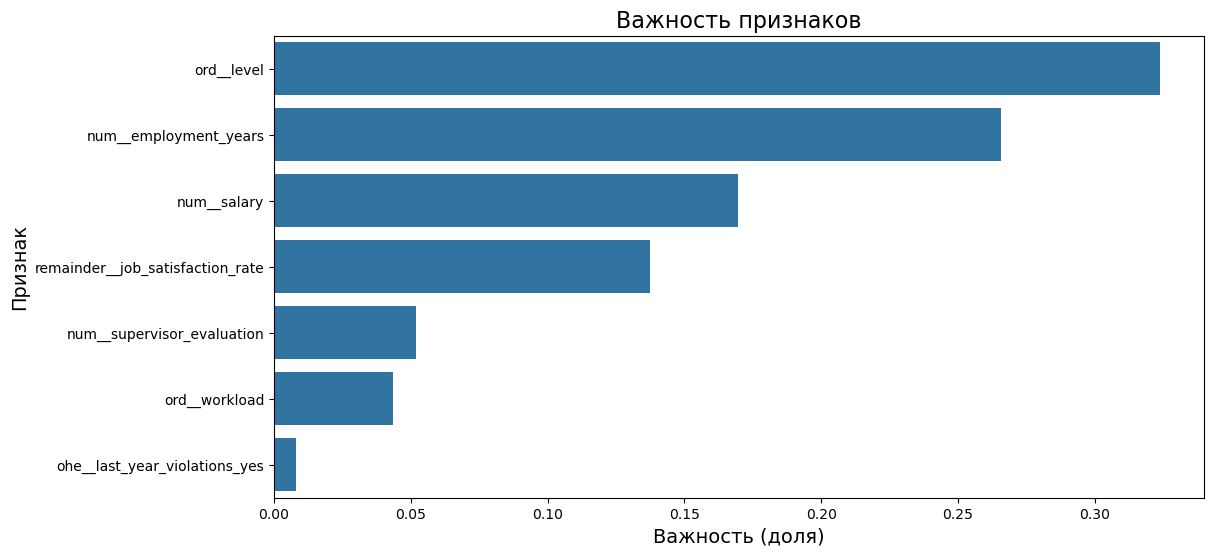

In [215]:
# формируем таблицу важности признаков и сортируем её
feature_importances_2 = pd.DataFrame(
    {
        'Feature': randomized_search_2.best_estimator_[:-1].get_feature_names_out(),
        'Importance':  randomized_search_2.best_estimator_['models'].feature_importances_
    }).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 6))

# Построим столбчатый график:
# по оси x — важность признака;
# по оси y - его наименование.
ax = sns.barplot(data=feature_importances_2, x='Importance', y='Feature')

# добавляем названия графика и осей
ax.set_title('Важность признаков', fontsize=16)
ax.set_xlabel('Важность (доля)', fontsize=14)
ax.set_ylabel('Признак', fontsize=14)

# отображаем график
plt.show()

В принципе по исследоватльскому анализу и вправду уволнялось очень много джунов, модель уловила эту связь и видимо она стала решающей. Остальные признаки меньше по важности, но также суммарно внесли свой вклад, выше мы опредяляли, что среди уволенных сотрудников много тех у кого малый стаж работы, низкая нагруженность, небольшая зарпалата, что кстати характерно как раз для джунов.

# Вывод

Цель нашего проекта дать рекомендации бизнесу для повышения удовлетворенности сотрудников и уменьшения их оттока из компании. Для достижения данной цели нам нужно выполнить анализ предоставленных данных и построить 2 модели, которые смогут предсказать уровень удовлетворённости сотрудника и его увольнение.

**Этапы работы:**

**По первой задаче:**
1) Загрузили данные
2) Провели преобработку данных:
- пропуски и дубликаты не обнаружены.
- обнаружены пропуски и пустые значения в столбцах 'level', 'dept' в тестовых данных.

3) Провели исследовательский анализ данных:

Анализ по тренировочным данным:
- 75% сотрудников работают не больше 6 лет, половина из сотрудников работакют 1 - 3 года;
- в основном руководитель ставит оценку за качество работы 3 или 4;
- ежемесячная зарплата сотрудника в среднем на одного человека = 30000 рублей;
- попадается много выбросов в ежемесячной зарплате, но значения не аномальны, скорей всего повышенная зарплата у более опытных сотрудников;
- уровень удовлетворенности сотрудника в среднем на одного человка равен 0.56.
- 60% сотрудников приходится на отдел продаж и технологический. Больше всех сотрудников в отделе продаж(37.9%).
- Практически поровну должностей  junior и middle. Остальная часть(9%) приходится на sinior.
- Половина сотрудников имеет среднюю загруженность, 30% низкую и 18% высокую.
- 3% сотрудников получили повышение за последний год.
- В основном сотрудники не нарушали трудовой договор за последний год, но есть исключения.

Анализ по сравнению двух групп `удовлетворен` и `не удоволетворен`:
- В среднем на одного работника группа 'не удовлетворен' получает оценку за качество работы = 3, а группа 'удовлетворен' 4
- В группе 'не удовлетворен' доля нарушителей трудового договора больше(25.3%).
- У неудовлетворенных сотрудников ежесячная зарплата по мединному значению меньше на 2400 рублей.

Анализ по тестовым данным:
- Каких - то особых различий между тестовыми и тренировочными данными нет

4) Провели подготовку данных:
- Тренировочные и тествоые данные сохранили в переменные X_train, x_test, y_train, y_test.
- Закодировали и масштабировали категориальные и количественные признаки с помощью пайпалайна.
- Обработали пропуски и пустые значения в пайплайне.

5) Обучили модель.
- Лучшая модель: DecisionTreeRegressor() с параметрамами preprocessor__num': MinMaxScaler(), 'models__min_samples_split': 13, 'models__min_samples_leaf': 5, 'models__max_depth': 12. 
Лучшая метрика на тренировочных данных SMAPE = 16.1, на тестовых данных SMAPE = 14.
- В целом модель присваевает низкую удовтеворенность у тех сотрудников, которые имеют не выскокую оценку за качество работы, небольшой стаж, зарплату, уровень занимаемой должности и имеют нарушения за трудовой договор.
- Повышения за последний год, отдел в котором работает сотрдуник, его загруженность не сильно влияет на удовлетворенность сотрудника.

**Вторая задача**
1) Загрузили данные
2) Провели преобработку данных:
- пропуски и дубликаты не обнаружены.

3) Провели исследовательский анализ данных:

Анализ по тренировочным данным:
 75% сотрудников работают в компании не больше 6 лет, половина работников трудятся 1-3 года;
- в среднем на одного человека оценка за качество работы выходит 4, есть выбросы со значением = 1, но такое событие реально, оставим как есть;
- в среднем на одного сотрудника ежемесячная зарпалата = 30000 рублей, попадается много выбросов, но значения вполне реальны, скорей всего повышенной зарплатой обладают болле опытные сотрудники.
- 59.1% сотрудников приходится на технологический отдел(23.2) и отдел продаж(35.9%).
- самых опытных специалистов 8.9%, остальная часть приходится по ровну на junior и middle;
- нагрузка распределна не равномерно, половина сотрудников имеет средную нагрузку, 30.2% среднюю, 16.9% выскокую;
- повышение за последний год было у 2.8%;
- 13.6% сотрудников нарушают трудовой договор.

Анализ по портрету уволенного сотрудника:
- в среднем проработал всего лишь 1 год;
- ежемесячная зарплата в среднем на 12000 рублей меньше;
- в основои имел низкий уровень загруженности;
- 88.9% из них это джуны, 9.6% - middle, 1.5% - sinior;
- больше всех уволилось из отдела technology, меньше всех из отдела hr.
- у уволенных sinior зарплата по всем отделам меньше чем у неуволенных, кроме отдела technology;
- из сотрудников которые нарушали трудовой договор 41.83% уволились.
- сотрудник с повышеним с большей вероятностью останется в компании.

Анализ по влиянию уровня удовлетворенности на увольнение сотрудника:
- медианное значение `job_satisfaction_rate` равное 0.66 выше у сотрудников,которые не уволилсь.
- у уволившихся сотрудников медианное значение `job_satisfaction_rate` равно 0.37.
- провели статистический тест, среднее значение `job_satisfaction_rate` группы `не уволился` больше, среднего значения группы `уволился`
  
4) Добавили `job_satisfaction_rate` в тренировочные данные:
- Выбросов не обнаружено, по мединному значению те кто уволился имеют удовлетворенность 0.36, кто не уволился 0.64.
- В целом наблюадется закономерность как и на тествоых данных.
- Мультиколлинеарнотсь не наблюдается.

5) Провели подготовку данных:
- Тренировочные и тествоые данные сохранили в переменные X_train_2, x_test_2, y_train_2, y_test_2.
- Целовой признак закодировали с помощью LabelEncoder()
- Закодировали и масштабировали категориальные и количественные признаки с помощью пайпалайна.
- Обработали пропуски и пустые значения в пайплайне.
- Избавились от дисбаланса классов методом oversampling.

6) Обучили модель.
- Получили лучшую модель DecisionTreeClassifier(random_state=30) с параметрами 'preprocessor__num': 'passthrough', 'models__min_samples_split': 2, 'models__min_samples_leaf': 3, 'models__max_depth': 5
- Метрика roc_auc на тренировчной выборке: 0.92.
- Метрика roc_auc на тествой выборке: 0.93..
- В принципе по исследоватльскому анализу и вправду уволнялось очень много джунов, модель уловила эту связь и видимо она стала решающей. По диаграмме размаха было видно что удовлетворенность сотрдуников в среднем выше у тех кто не уволися, и модель также придала этому немалое значение. Остальные признаки меньше по важности, но также суммарно внесли свой вклад, выше мы опредяляли, что среди уволенных сотрудников много тех у кого малый стаж работы, низкая нагруженность, небольшая зарпалата, что кстати характерно как раз для джунов.
- Признаки `dept`, `last_year_promo`, `last_year_violations` практически не влияют на предсказание целевого признака. Посмотрим как изменится метрика после удаление данных признаковт

**Рекомендации для бизнеса**:
В большинстве случаев недовальный и уволенный сотрудник это человек который занимал низкую должность, проработал недолго, имел не очень высокие оценки за качество работы, его нагруженность была низкая как и зарплата, короче под это описание больше всех подоходят джуны.

Возможная стратегия для удержания джунов:
1) Обеспечить поддержку и наставничество
- Опытный коллега, который будет молодому адаптироваться, отвечать на сложные вопросы

2) Создать возможность для обучения:
- доступ к курсам, вебинарам или конференциям, для развития навыков
- Помогть ему видеть свои сильные стороны и зоны роста, чтобы он понимал, как развиваться.

3) Поставить четкие цели и задачи:
- Определить измеримые цели, чтобы junior понимал, чего от него ожидают.

4) Показать перспективу роста:
- Объяснить, какие шаги нужно сделать для роста внутри компании.
- Пересматривать зарплату и должность в зависимости от прогресса.

5) Обеспечьте баланс между работой и личной жизнью:
- Предложить возможность удаленной работы или гибкого графика.

Главное — показать junior-специалисту, что он важен для компании, и создать условия для его роста. Когда человек видит перспективы, чувствует поддержку и понимает, что его труд ценится, он с большей вероятностью останется в компании надолго.
8

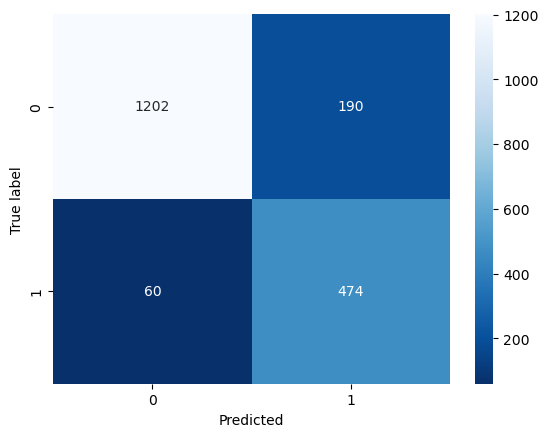

In [219]:
cm = confusion_matrix(y_test_2, y_test_pred_2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

По TP: здорово когда мы можем предвидеть, что человек хочет уволиться. Можно заранее ему предложить повышение зарпалаты, должности, вообщем всё то что может его заставить остаться. Здесь потенциально придется компании понести какие-то расходы, если это ценный сотрудник с большим опытом, крутыми навыками, с высоким kpi, то явно это того стоит. Если у комнании все отлично, дела идут в гору, большие доходы, и все это связано с трудом человека, а TP очень большой, а ТN низкий, то нужно срочно проводить какую-то стратегию для удержания сотрудников, потому что если люди начнут массово уходить, то бизнес может очень сильно пострадать.

По ТN: компания уверена что определенные сотрдуники точно не уволяться, это здорово, к этому надо стремиться. Здесь либо работники довольны своей работой, их всё устраивает, либо какие-то другие факторы заставляют остаться в компании. Важно повышать TN, но если это действительно необходимо, может у компании все стабильно и доход бизнеса уже зависит не от сотрудников.

По FN: здесь мы думали, что сотрудник не уволится, но он взял и ушел. Нужно понижать FN. Допустим у компании есть свободные денежные запасы, они хотят потратить их на сотрудников, но видят, что все хорошо, никто не собирается увольнятся, а через месяц не хватает работников, и компания уже теряет больше средств на привлечение нового сотрудника, нежели на уже рабоющего.

По FP: здесь мы думали,  что сотрудник близок к увольнению, но по факту он не собирался покидать компанию. Нужно понижать FP, так как компания может потратить много денег не на того сотрудника, а могла вложить деньги в потенциально уходящего ценного работника и повысить тем самым TP/TN.

True Positive (результат 474): Модель правильно предсказала уход 474 сотрудников. Это дает возможность предпринять меры для их удержания и минимизировать потери прибыли.

True Negative (результат 1202): 1202 сотрудников, которые остаются, правильно определены моделью. Это экономит ресурсы, так как нет необходимости предпринимать ненужные действия.

False Positive (результат 190): 190 сотрудников ошибочно предсказаны как собирающиеся уйти. Это приводит к лишним расходам на меры удержания.

False Negative (результат 60): 60 сотрудников, которые действительно ушли, модель не смогла выявить. Это упущенная прибыль, так как эти сотрудники могли быть удеражны.

В итоге если не предпринимать действия для удержания сотрудников мы можем потециально потерять 470 человек + 64 человека, которых модель не смогла опеределить, если компания теряет 1 одного сотрудника, то она к примеру теряет 1 млн. рублей, в итоге выходит, что комнпания может потерять 534 млн.рублей, если ничего не делать для удержания. В случае, если компания выделит для удеражния сотрудника 100 000 рублей, то она потяряет всего 47 млн. рублей на удеражания работников и 64 млн. рублей из-за ошибки предсказания, в итоге если предпринять действия для удержания сотрудников, грубо говоря потратим 111 млн.рублей, а в противном случае  543 млн.рублей, разница очевидна.)
